<h1>1. Import</h1>

In [1]:
#import des librairies
%pylab inline
import numpy as np 
import pandas as pd 
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from textblob import Word
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
from nltk.stem.snowball import FrenchStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import FrenchStemmer
from spellchecker import SpellChecker
from textblob import TextBlob
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.svm import SVC
import sklearn.naive_bayes as nb
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from xgboost import plot_importance, to_graphviz
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, auc, precision_score, recall_score
from sklearn import feature_extraction, model_selection, svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
from gensim.utils import tokenize
from gensim.models import word2vec
from nltk.tokenize import sent_tokenize


Populating the interactive namespace from numpy and matplotlib


In [2]:
#ignore les warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#chargement des données
#remplacement de None par NaN
#décimal avec un point plutôt qu'une virgule dans le dataframe afin que les variables soient de type float
df = pd.read_csv(r"C:\Users\utilisateur\Documents\Projet\ProjetNLP\booking.csv", na_values=['None'], decimal=',')

In [4]:
#affichage des 5 premières lignes du dataframe
df.head()

nom      pays favorite                 date         titre  \
0      Caroline  Belgique      1.0  2018-07-30 00:00:00  Exceptionnel   
1     Olivier51    France      0.0  2020-03-16 00:00:00     Fabuleux    
2          Marc    France      0.0  2020-03-11 00:00:00  Exceptionnel   
3  Marie-claire    France      0.0  2020-03-08 00:00:00  Exceptionnel   
4        Pierre    France      0.0  2020-03-06 00:00:00     Fabuleux    

                                         bons_points  \
0  Établissement recent, propre, soigne, chouette...   
1  Accueil très chaleureux, chambre calme...tout ...   
2  Tout bié sauf le wifi catastrophiquement lent!...   
3                                                NaN   
4  Excellent rapport qualité prix. Personnel très...   

                   mauvais_points  note type_etablissement   lieu  \
0                            Rien  10.0              Hôtel  Paris   
1                             NaN   9.0              Hôtel  Paris   
2                             NaN   9.6              Hôtel  Paris   
3  Hôtel parfait. Quartier sympa.  10.0              Hôtel  Paris   
4                             NaN   9.0              Hôtel  Paris   

   note_etablissement  
0                 8.5  
1                 8.5  
2                 8.5  
3                 8.5  
4                 8.5

<h1>2. Exploration et nettoyage des données</h1>

In [5]:
#dimensions du dataframe
print('Le dataset a {} lignes et {} colonnes.'.format(df.shape[0], df.shape[1]))

Le dataset a 30946 lignes et 11 colonnes.


In [6]:
#affichage des variables
print('Les différents variables sont : {}.'.format(df.columns.tolist()))

Les différents variables sont : ['nom', 'pays', 'favorite', 'date', 'titre', 'bons_points', 'mauvais_points', 'note', 'type_etablissement', 'lieu', 'note_etablissement'].


In [7]:
#Existe-t-il des variables non renseignées?
df.isnull().values.any()

True

In [8]:
#affichage du nombre de valeurs manquantes selon chaque variable
df.isnull().sum()

nom                    395
pays                   452
favorite                15
date                   410
titre                  432
bons_points           2359
mauvais_points        8540
note                   410
type_etablissement      15
lieu                    15
note_etablissement      15
dtype: int64

In [9]:
#type de chaque variable
df.dtypes

nom                    object
pays                   object
favorite               object
date                   object
titre                  object
bons_points            object
mauvais_points         object
note                  float64
type_etablissement     object
lieu                   object
note_etablissement    float64
dtype: object

In [10]:
#statistiques descriptives du dataset
df.describe(include='all')

nom    pays favorite                 date  titre  \
count     30551   30494    30931                30536  30514   
unique     5838     127        2                 1246   9611   
top     Anonyme  France      0.0  2020-02-16 00:00:00  Bien    
freq        650   25991    30211                  205   4763   
mean        NaN     NaN      NaN                  NaN    NaN   
std         NaN     NaN      NaN                  NaN    NaN   
min         NaN     NaN      NaN                  NaN    NaN   
25%         NaN     NaN      NaN                  NaN    NaN   
50%         NaN     NaN      NaN                  NaN    NaN   
75%         NaN     NaN      NaN                  NaN    NaN   
max         NaN     NaN      NaN                  NaN    NaN   

                                     bons_points mauvais_points          note  \
count                                      28587          22406  30536.000000   
unique                                     22578          18151           NaN   
top     Ce client n'a pas laissé de commentaire.           Rien           NaN   
freq                                        1502            833           NaN   
mean                                         NaN            NaN      7.977607   
std                                          NaN            NaN      1.396143   
min                                          NaN            NaN      1.000000   
25%                                          NaN            NaN      7.100000   
50%                                          NaN            NaN      8.000000   
75%                                          NaN            NaN      9.000000   
max                                          NaN            NaN     10.000000   

       type_etablissement   lieu  note_etablissement  
count               30931  30931        30931.000000  
unique                 11     18                 NaN  
top                 Hôtel  Paris                 NaN  
freq                25927  12888                 NaN  
mean                  NaN    NaN            7.903485  
std                   NaN    NaN            0.701262  
min                   NaN    NaN            5.300000  
25%                   NaN    NaN            7.300000  
50%                   NaN    NaN            8.000000  
75%                   NaN    NaN            8.400000  
max                   NaN    NaN            9.800000

In [11]:
#suppression des accents
#cols = df.select_dtypes(include=[np.object]).columns
#df[cols] = df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
#df

In [12]:
#fonction pour générer un nuage de mots
def wcloud(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df.drop(['nom', 'pays', 'favorite', 'date', 'note', 'type_etablissement', 'lieu', 'note_etablissement'],1,inplace=True)
df.head()

titre                                        bons_points  \
0  Exceptionnel  Établissement recent, propre, soigne, chouette...   
1     Fabuleux   Accueil très chaleureux, chambre calme...tout ...   
2  Exceptionnel  Tout bié sauf le wifi catastrophiquement lent!...   
3  Exceptionnel                                                NaN   
4     Fabuleux   Excellent rapport qualité prix. Personnel très...   

                   mauvais_points  
0                            Rien  
1                             NaN  
2                             NaN  
3  Hôtel parfait. Quartier sympa.  
4                             NaN

In [15]:
#suppression des Nan
df = df.fillna('')
#suppression de deux phrases récurrentes dans les données
df = df[df.bons_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
df = df[df.bons_points != "Ce client n'a pas laissé de commentaire."]

df = df[df.mauvais_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
df = df[df.mauvais_points != "Ce client n'a pas laissé de commentaire."]

In [16]:
#itération sur l'ensemble des lignes du dataframe, affichache de l'index et son commentaire associé
for index, row in df.iterrows():
    print('index: ', index, 'col sentences:', row['titre'])

index:  0 col sentences: Exceptionnel
index:  1 col sentences: Fabuleux 
index:  2 col sentences: Exceptionnel
index:  3 col sentences: Exceptionnel
index:  4 col sentences: Fabuleux 
index:  5 col sentences: Bien 
index:  6 col sentences: Superbe
index:  7 col sentences: Très bien
index:  8 col sentences: Très bien
index:  9 col sentences: Très bien
index:  10 col sentences: sympathique
index:  11 col sentences: Très bien
index:  12 col sentences: Fabuleux 
index:  13 col sentences: Très bien
index:  14 col sentences: Nous avons adoré visiter Paris
index:  15 col sentences: Bon séjour, nuits au calme, fenêtre ouverte sur Paris!
index:  16 col sentences: Parfait
index:  17 col sentences: super agreable
index:  18 col sentences: Bien 
index:  19 col sentences: Exceptionnel
index:  20 col sentences: Fabuleux 
index:  21 col sentences: Proche université Paris Panthéon Assas
index:  22 col sentences: Exceptionnel
index:  23 col sentences: Un petit bout de paradis en plein cœur de Paris
ind

index:  221 col sentences: Bien 
index:  222 col sentences: Etablissement propre, très bien situé, calme. Excellent petit déjeuner.
index:  223 col sentences: Bien 
index:  224 col sentences: bien
index:  225 col sentences: agréable
index:  226 col sentences: Agréable
index:  227 col sentences: Bien
index:  228 col sentences: Séjour satisfaisant.
index:  229 col sentences: Très bien
index:  230 col sentences: Très bien
index:  231 col sentences: Très bien
index:  232 col sentences: notre séjour c'est bien passé
index:  233 col sentences: Très bien
index:  234 col sentences: Bon rapport qualite prix
index:  235 col sentences: Banale
index:  236 col sentences: Très bien
index:  237 col sentences: satisfaisant dans l'ensemble
index:  238 col sentences: Agreable
index:  239 col sentences: Bon hôtel pour déplacement professionnel à faibles coûts
index:  240 col sentences: Très bien
index:  241 col sentences: Bon séjour
index:  242 col sentences: Très bien
index:  243 col sentences: Très bie

index:  467 col sentences: Nuit parfaite !
index:  468 col sentences: Exceptionnel
index:  469 col sentences: Bon Séjour
index:  470 col sentences: Exceptionnel
index:  471 col sentences: Merci et bravo
index:  472 col sentences: Une bonne adresse à avoir à Paris!
index:  473 col sentences: Excellent rapport qualité prix
index:  474 col sentences: Nous avons bien aimé votre décoration intérieure, chargée mais nous faisant sentir comme à la maison
index:  475 col sentences: hotel très sympathique
index:  476 col sentences: Une découverte...
index:  477 col sentences: Exceptionnel
index:  478 col sentences: Hôtel bien situé, dans un quartier calme, proche de la station de metro Sébastopol.
index:  479 col sentences: Très bien
index:  480 col sentences: Fabuleux 
index:  481 col sentences: Une bonne adresse
index:  482 col sentences: Très bien
index:  483 col sentences: Un excellent rapport qualité prix
index:  484 col sentences: Très satisfait
index:  485 col sentences: Une très bonne ad

index:  652 col sentences: Une bonne adresse à Paris
index:  653 col sentences: Bien
index:  654 col sentences: Exceptionnel
index:  655 col sentences: Exceptionnel
index:  656 col sentences: Je reviendrai !
index:  657 col sentences: Rapport qualité prix intéressant, emplacement excellent
index:  658 col sentences: Cet hôtel est génial : un petit cocon au coeur de Paris : une adresse à recommander sans aucun doute
index:  659 col sentences: Je m'y rend pour le travail ; Que du bonheur, je joins l'utile à l'agréable dans cet établissement
index:  660 col sentences: Exceptionnel
index:  661 col sentences: Fabuleux 
index:  662 col sentences: excellent sejour
index:  663 col sentences: Très bien
index:  664 col sentences: Appréciation
index:  665 col sentences: Très bien
index:  666 col sentences: Fabuleux 
index:  667 col sentences: séjour très agréable
index:  668 col sentences: Fabuleux 
index:  669 col sentences: Très bien
index:  670 col sentences: Bien 
index:  671 col sentences: F

index:  911 col sentences: Court mais intéressant!
index:  912 col sentences: Très bien
index:  913 col sentences: simple
index:  914 col sentences: Très bon séjour !
index:  915 col sentences: Hôtel propre et calme pour un petit prix
index:  916 col sentences: Agréable
index:  917 col sentences: Bon rapport Q/P, mais l'hôtel pourait remédier à quelques améliorations faciles à mettre en place.
index:  918 col sentences: Cool
index:  919 col sentences: Bien 
index:  920 col sentences: Agréable
index:  921 col sentences: Séjour court et efficace
index:  922 col sentences: très bon séjour
index:  923 col sentences: Bien
index:  924 col sentences: Très bien
index:  925 col sentences: Correct.
index:  926 col sentences: Passer un aspirateur bruyant à 16h pas du tout agréable
index:  927 col sentences: Séjour agréable
index:  928 col sentences: Agréable
index:  929 col sentences: Très bien pour 2 ou 3 nuits.
index:  930 col sentences: Tres bon choix si l'on veut être près de l'Opéra Bastille

index:  1122 col sentences: Très satisfait, à tel point que je suis un habitué maintenant
index:  1123 col sentences: Très bien
index:  1124 col sentences: Bien 
index:  1125 col sentences: Satisfait !
index:  1126 col sentences: Très bien
index:  1127 col sentences: Bien 
index:  1128 col sentences: j'ai apprécié mon séjour dans cet hôtel. Je le recommande volontier.
index:  1129 col sentences: Fabuleux 
index:  1130 col sentences: Très bien Merci
index:  1131 col sentences: Séjour parfait.je recommanderai cet établissement de haute qualité et prestations de service excelle
index:  1132 col sentences: Bien 
index:  1133 col sentences: Séjour parfait. J'y retournerais.
index:  1134 col sentences: Bien
index:  1135 col sentences: Bien 
index:  1136 col sentences: Bien 
index:  1137 col sentences: Une ambiance et décoration agréable.
index:  1138 col sentences: Très bien
index:  1139 col sentences: Très bien
index:  1140 col sentences: Surprenant de rencontres.
index:  1141 col sentences

index:  1413 col sentences: Superbe
index:  1414 col sentences: Fabuleux 
index:  1415 col sentences: Séjour très agréable
index:  1416 col sentences: Superbe
index:  1417 col sentences: Bien 
index:  1418 col sentences: Excellent rapport qualité/prix !
index:  1419 col sentences: Excellent pour week-end à Paris
index:  1420 col sentences: Très bien
index:  1421 col sentences: Très belle adresse à 2 pas des Champs Elysées!
index:  1422 col sentences: Bien 
index:  1423 col sentences: Exceptionnel
index:  1424 col sentences: Très bien qualité prix
index:  1425 col sentences: Idéalement situé, avec un bon confort.
index:  1426 col sentences: Exceptionnel
index:  1427 col sentences: Nous y retournerons...
index:  1428 col sentences: Très belle découverte.
index:  1429 col sentences: Exceptionnel
index:  1430 col sentences: Bien 
index:  1431 col sentences: Exceptionnel
index:  1432 col sentences: correct
index:  1433 col sentences: Très bien
index:  1434 col sentences: Hôtel à découvrir a

index:  1699 col sentences: Bien 
index:  1700 col sentences: Bien 
index:  1701 col sentences: Superbe
index:  1702 col sentences: Exceptionnel
index:  1703 col sentences: Décevant
index:  1705 col sentences: Mauvais.
index:  1769 col sentences: Exceptionnel
index:  1770 col sentences: Exceptionnel
index:  1771 col sentences: Excellent
index:  1772 col sentences: remarquablement bien place, propre et confortable
index:  1773 col sentences: Super hôtel
index:  1774 col sentences: Très bien
index:  1775 col sentences: Fabuleux 
index:  1776 col sentences: Exceptionnel
index:  1777 col sentences: Excellent point de chute pour Noel
index:  1778 col sentences: Grâce à la situation très centrale, on a été très peu gêné par la grève des transports.
index:  1779 col sentences: Exceptionnel
index:  1780 col sentences: Bon moment
index:  1781 col sentences: Bien 
index:  1782 col sentences: Un excellent sejour
index:  1783 col sentences: Excellent séjour
index:  1784 col sentences: Bon hôtel
in

index:  2040 col sentences: Exceptionnel
index:  2041 col sentences: Très bon séjour
index:  2042 col sentences: Exceptionnel
index:  2043 col sentences: Une nuit paisible un soir de victoire en demi-finale de Coupe du monde
index:  2044 col sentences: Exceptionnel
index:  2045 col sentences: Un écrin de verdure, de calme et de bienveillance. Rare, donc précieux.
index:  2046 col sentences: Très bien
index:  2047 col sentences: Si j'ai l'occasion, je reviendrai avec plaisir.
index:  2048 col sentences: à découvrir
index:  2049 col sentences: Bien 
index:  2050 col sentences: Agréable
index:  2051 col sentences: Logement bien
index:  2052 col sentences: Très bien.
index:  2053 col sentences: dans l ensemble , trés bien
index:  2054 col sentences: Bien 
index:  2055 col sentences: Endroit plein de charme, calme, chambre un peu exigue
index:  2056 col sentences: Nul froid pas du tout agréable
index:  2057 col sentences: Un lieu agréable et surprenant !
index:  2058 col sentences: Agréable

index:  2368 col sentences: Excellent séjour dans cet hôtel, rapport qualité prix excellent.
index:  2369 col sentences: Bon 
index:  2370 col sentences: Agréable
index:  2371 col sentences: Bien 
index:  2372 col sentences: Bon séjour mais à améliorer
index:  2373 col sentences: Agréable
index:  2374 col sentences: orientation difficile à l'intérieur
index:  2375 col sentences: Très bien
index:  2376 col sentences: Bien 
index:  2377 col sentences: Très bien
index:  2378 col sentences: Agréable
index:  2379 col sentences: Acceptable
index:  2380 col sentences: Agréable
index:  2381 col sentences: Bien.
index:  2382 col sentences: Très bien
index:  2383 col sentences: ACCOR INNOVE
index:  2384 col sentences: Situé près du métro et du RER c'est un point pratique d'accès avec commerces et restos proches
index:  2385 col sentences: Bien 
index:  2386 col sentences: Séjour agréable pour le week end - je reviendrai volontiers en famille une nouvelle fois
index:  2387 col sentences: BIEN EN 

index:  2612 col sentences: Très bien
index:  2613 col sentences: Bon rapport qualité prix
index:  2614 col sentences: Bien 
index:  2615 col sentences: Magnifique séjour dans cet hôtel bien situé avec des lits très confortables...
index:  2616 col sentences: Parfait pour y dormir une nuit pour le boulot.
index:  2617 col sentences: Très bien
index:  2618 col sentences: Très bien!
index:  2619 col sentences: bien
index:  2620 col sentences: hôtel ancien, dans son jus mais qui a du charme
index:  2621 col sentences: Avons passé un agréable sejour entourés de gens charmants.
index:  2622 col sentences: Very nice charming hotel!
index:  2623 col sentences: Bon rapport qualité prix
index:  2624 col sentences: Petit hôtel parisien à Montmartre
index:  2625 col sentences: Agréable
index:  2626 col sentences: Agréable
index:  2627 col sentences: Agréable
index:  2628 col sentences: Très bon prix et bonne situation géographique mais manque d’insonorisation et salle de bain vétuste
index:  2629

index:  2842 col sentences: Agréable
index:  2843 col sentences: peut mieux faire pour un ibis
index:  2844 col sentences: Le séjour fut dans l'ensemble de qualité et m'a permis de réussir mon déplacement professionnel.
index:  2845 col sentences: Bien 
index:  2846 col sentences: séjour convenable, mais trop loin de la ville ; bien indiquer l'adresse exacte et l'emplacement
index:  2847 col sentences: Très bien
index:  2848 col sentences: Je recommande
index:  2849 col sentences: Bien 
index:  2850 col sentences: Très bien
index:  2851 col sentences: Sympathique week-end. Merci
index:  2852 col sentences: Bon 
index:  2853 col sentences: Assez agreable
index:  2854 col sentences: Parfait.
index:  2855 col sentences: Agréable
index:  2856 col sentences: Agréable
index:  2857 col sentences: Bien 
index:  2858 col sentences: Bien 
index:  2859 col sentences: Sympa
index:  2860 col sentences: Bien mais fort éloigné du centre
index:  2861 col sentences: A part les désagréments pour trouver

index:  3114 col sentences: Agréable
index:  3115 col sentences: Très bien
index:  3116 col sentences: Bien placé si l'on veut allez au stade France
index:  3117 col sentences: Bien pour une nuit après un événement au Stade de France
index:  3118 col sentences: Concert et visite de Paris
index:  3119 col sentences: Bien 
index:  3120 col sentences: Week end à refaire
index:  3121 col sentences: Bien 
index:  3122 col sentences: Très bien
index:  3123 col sentences: Très bien
index:  3124 col sentences: Très bien
index:  3125 col sentences: Très bien
index:  3126 col sentences: Bien 
index:  3127 col sentences: Hotel bien situé pour se rendre à un concert au stade de France (bus à proximité ou 30mn à pied)
index:  3128 col sentences: Bien 
index:  3129 col sentences: Agréable
index:  3130 col sentences: Bien 
index:  3131 col sentences: Très bien
index:  3132 col sentences: Bien 
index:  3133 col sentences: Bien pour une nuit
index:  3134 col sentences: Venir impérativement en taxi ou U

index:  3402 col sentences: satisfait
index:  3403 col sentences: Séjour appréciable
index:  3404 col sentences: Séjour agréable dans le calme et à 2 pas du métro et de 2 restaurants à conseiller.
index:  3405 col sentences: température insuportable dans la chambre
index:  3406 col sentences: Bien 
index:  3407 col sentences: Hôtel confort qualité prix
index:  3408 col sentences: nécessaire, pas inoubliable!!!
index:  3409 col sentences: satisfaisant, comme depuis des années, on reviendra.
index:  3410 col sentences: Confirme à la chaîne ibis budget
index:  3411 col sentences: Bien 
index:  3412 col sentences: Très cher pour les prestations plutôt pauvres
index:  3413 col sentences: Agréable
index:  3414 col sentences: Il aurait été parfait sans le petit problème qu'on a eu à l'arrivée
index:  3415 col sentences: Bien 
index:  3416 col sentences: Bon
index:  3417 col sentences: Bon week-end quand même
index:  3418 col sentences: Je retiens l’hôtel pour une prochaine fois
index:  3419 c

index:  3646 col sentences: Fabuleux 
index:  3647 col sentences: Hôtel confortable, bon accueil, mon fiancé est moi sommes très heureux.
index:  3648 col sentences: Médiocre 
index:  3649 col sentences: Exceptionnel
index:  3650 col sentences: Hôtels Hipo de confort.
index:  3651 col sentences: Un réel plaisir, la situation de l'hôtel permet de rayonner à pied dans Paris.
index:  3652 col sentences: pas cher, pour une nuit c'est passable, s'il fait froid pensez à amener votre plaid
index:  3653 col sentences: Passable
index:  3654 col sentences: Trop cher pour des équipements passables et une chambre ridicule
index:  3655 col sentences: Accueil agréable j ai passé un très bon séjour
index:  3656 col sentences: Soirée et nuit insupportable.
index:  3657 col sentences: Moyen
index:  3658 col sentences: Bien pour 1 nuit mais pas plus
index:  3659 col sentences: Très bien
index:  3660 col sentences: Superbe
index:  3661 col sentences: Décevant par rapport au prix de la chambre
index:  366

index:  3924 col sentences: on reviendra volontiers
index:  3925 col sentences: Rapport qualité / prix correct, sans plus
index:  3926 col sentences: parfait pour un court séjour
index:  3927 col sentences: Bruyant et exigü
index:  3928 col sentences: Passable
index:  3929 col sentences: peut etre mieux.
index:  3930 col sentences: Bien 
index:  3931 col sentences: j'avais l'impression d'être dans la même pièce que mes voisins
index:  3932 col sentences: Pour dormir une nuit on en demande pas plus mais pour un séjour de longue durée je ne recommande pas
index:  3933 col sentences: Bon rapport qualité prix pour la situation :)
index:  3934 col sentences: Bien 
index:  3935 col sentences: Bien 
index:  3936 col sentences: bon accueil, bien placé, mais pas terrible pour le confort modeste
index:  3937 col sentences: Pratique mais hôtel qui a besoin d être rénové.
index:  3938 col sentences: Un peu déçu par ce 3 étoile
index:  3939 col sentences: Bien 
index:  3940 col sentences: Très bonn

index:  4221 col sentences: Déçu
index:  4222 col sentences: passable
index:  4223 col sentences: Emplacement géographique super pratique pour moi et prestations correspondant bien à mes besoins
index:  4224 col sentences: Bien 
index:  4225 col sentences: Très bien
index:  4226 col sentences: Bon rapport qualité/prix
index:  4227 col sentences: Agréable
index:  4228 col sentences: je ne recommande pas cet hôtel situé dans un quartier malfamé.
index:  4229 col sentences: Bidon
index:  4230 col sentences: Passable
index:  4231 col sentences: Reveil matinal
index:  4232 col sentences: Limite !!
index:  4233 col sentences: Bien 
index:  4234 col sentences: Bon sejour
index:  4235 col sentences: Passable
index:  4236 col sentences: séjour confortable, excellente étape
index:  4237 col sentences: Accueil pitoyable.
index:  4238 col sentences: A refaire
index:  4239 col sentences: Passable
index:  4240 col sentences: Agréable
index:  4241 col sentences: Pour 1 nuit
index:  4242 col sentences

index:  4463 col sentences: Bien 
index:  4464 col sentences: Séjour agréable
index:  4465 col sentences: très bon séjour
index:  4466 col sentences: Bien
index:  4467 col sentences: parfait rapport qualité prix
index:  4468 col sentences: notre 4e pasage ds cet hôtel, tjs satisfaits
index:  4469 col sentences: Propre et Agréable
index:  4470 col sentences: Séjour rapide, mais tout à fait conforme à ce qui était annoncé. Rapport qualité/prix parfait.
index:  4471 col sentences: Superbe
index:  4472 col sentences: Bien 
index:  4473 col sentences: Tres bon accueil... Situation géographique proche commodité metro resto.
index:  4474 col sentences: Hôtel très bien situé, personnel au top ! Idéal pour court séjour
index:  4475 col sentences: Agréable
index:  4476 col sentences: Hotel calme et bien placé
index:  4477 col sentences: Fabuleux 
index:  4478 col sentences: Bien 
index:  4479 col sentences: Superbe
index:  4480 col sentences: Dans l'ensemble le séjour a été très agréable. J'y re

index:  4730 col sentences: Bien 
index:  4731 col sentences: Bien 
index:  4732 col sentences: Bien
index:  4733 col sentences: Bon hôtel mais murs trop fins
index:  4734 col sentences: Personnel à la hauteur!
index:  4735 col sentences: Bien 
index:  4736 col sentences: Bien 
index:  4737 col sentences: Bien 
index:  4738 col sentences: Correct
index:  4739 col sentences: Bien
index:  4740 col sentences: Bien 
index:  4741 col sentences: Bien 
index:  4742 col sentences: je ne pourrais pas y retourner
index:  4743 col sentences: bien
index:  4744 col sentences: Bon rapport qualité prix
index:  4745 col sentences: Agréable
index:  4746 col sentences: Satisfaisant
index:  4747 col sentences: Bien 
index:  4748 col sentences: Bien ,sans mauvaise surprise
index:  4749 col sentences: Agréable
index:  4750 col sentences: Agréable
index:  4751 col sentences: Bien 
index:  4752 col sentences: Agréable
index:  4753 col sentences: Bon séjour
index:  4754 col sentences: je reviendrais, c'est su

index:  4942 col sentences: Très bien
index:  4943 col sentences: Bien 
index:  4944 col sentences: Bien.
index:  4945 col sentences: Médiocre 
index:  4946 col sentences: Médiocre 
index:  4947 col sentences: Passable
index:  4985 col sentences: Exceptionnel
index:  4986 col sentences: Agréable
index:  4987 col sentences: Bonne accueil
index:  4988 col sentences: Hôtel 4etoiles
index:  4989 col sentences: Parfait pour un petit WE rapide avec un rapport qualité/prix imbattable à mon avis
index:  4990 col sentences: Bien 
index:  4991 col sentences: Agréable
index:  4992 col sentences: Ibis budget, équipements et déco budget, mais établissement calme et silencieux, bien situé.
index:  4993 col sentences: Agréable
index:  4994 col sentences: Bien 
index:  4995 col sentences: Agréable
index:  4996 col sentences: Agréable
index:  4997 col sentences: Bien 
index:  4998 col sentences: Bien 
index:  4999 col sentences: Très bien
index:  5000 col sentences: Fabuleux 
index:  5001 col sentences

index:  5251 col sentences: Bien placé mais lit inconfortable! Dommage!
index:  5252 col sentences: Séjour moyen dans un cadre qui répond aux exigences
index:  5253 col sentences: Chambre sobre agréable et propre. Se serait bien qu à la réception., qu il
index:  5254 col sentences: Bien 
index:  5255 col sentences: Un hôtel calme, un accueil attentionné, mais une ergonomie de la chambre un peu perfectible
index:  5256 col sentences: très bon séjour
index:  5257 col sentences: Pratique et accueillant. Mais besoin de rafraichir la déco et les équipements.
index:  5258 col sentences: bon rapport qualité/prix
index:  5259 col sentences: Bon 
index:  5260 col sentences: Agréable
index:  5261 col sentences: Bien pour petit séjour
index:  5262 col sentences: Agréable
index:  5263 col sentences: Séjour correct pour une nuit de passage avant de prendre un train
index:  5264 col sentences: Agréable
index:  5265 col sentences: Idéal pour le rapport qualité/prix
index:  5266 col sentences: Hotel b

index:  5492 col sentences: Bel emplacement, mais c'est tout
index:  5493 col sentences: Ne pas s'attendre à des prestations haut de gamme, c'est un hotel simple mais propre.
index:  5494 col sentences: Propre
index:  5495 col sentences: personnel très agréable moquette et plancher à rénover
index:  5496 col sentences: Agréable
index:  5497 col sentences: Mauvaise expérience
index:  5498 col sentences: Bien 
index:  5499 col sentences: Bien 
index:  5500 col sentences: Passable
index:  5501 col sentences: Pour 2 jours, et pour le tarif, ça va mais ça ne mérite pas trois étoiles
index:  5502 col sentences: Très bon rapport qualité/prix/emplacement.
index:  5503 col sentences: Il était court mais très bien.
index:  5504 col sentences: Retour de séjour
index:  5505 col sentences: Excellent emplacement et pied-à-terre parisien. Globalement, bon rapport prix. Bon séjour !
index:  5506 col sentences: Bien 
index:  5507 col sentences: Rapport qualité prix convenable
index:  5508 col sentences

index:  5742 col sentences: Agréable
index:  5743 col sentences: Séjours du 07 au 09 janvier 2020
index:  5744 col sentences: Très bien
index:  5745 col sentences: Séjour agréable par la suite
index:  5746 col sentences: Bon rapport qualité/prix
index:  5747 col sentences: Très bien
index:  5748 col sentences: Propre mais équipement sommaire
index:  5749 col sentences: Agréable
index:  5750 col sentences: hébergement qui a répondu à mon attente et qui m'a permis de me déplacer facilement en bus et métro.
index:  5751 col sentences: Passable
index:  5752 col sentences: Bien 
index:  5753 col sentences: Très bien
index:  5754 col sentences: Passé 2 nuits. Très bien situé et très propre
index:  5755 col sentences: Sympa
index:  5756 col sentences: Pour un cours séjour
index:  5757 col sentences: Bien 
index:  5758 col sentences: Très bien
index:  5759 col sentences: Beurk
index:  5760 col sentences: Bien 
index:  5761 col sentences: Déçu
index:  5762 col sentences: passable
index:  5763 c

index:  5968 col sentences: Superbe
index:  5969 col sentences: Chambre simple et confortable, de plus propre
index:  5970 col sentences: Bien 
index:  5971 col sentences: Sejour touristique très agréable. A refaire.
index:  5972 col sentences: Super séjour au calme à l'Ibis Av d'Italie
index:  5973 col sentences: Bien 
index:  5974 col sentences: Ok
index:  5975 col sentences: Bien 
index:  5976 col sentences: hotel tres calme
index:  5977 col sentences: Très bien.
index:  5978 col sentences: Déçu alors que de petites améliorations rendraient le séjour très agréable
index:  5979 col sentences: Bien 
index:  5980 col sentences: Excellente situation et bon confort.
index:  5981 col sentences: Très bien
index:  5982 col sentences: Fabuleux 
index:  5983 col sentences: Excellente situation et professionnalisme de l'accueil.
index:  5984 col sentences: Tout c'est bien passé, séjour agréable dans l'hotel.
index:  5985 col sentences: Bon séjour dans l’ensemble
index:  5986 col sentences: Trè

index:  6238 col sentences: Exceptionnel
index:  6239 col sentences: Exceptionnel
index:  6240 col sentences: très bonne expérience
index:  6241 col sentences: Exceptionnel
index:  6242 col sentences: Hôtel d’un très bon rapport qualité/prix. Petite étape parisienne très agréable.
index:  6243 col sentences: Exceptionnel
index:  6244 col sentences: Agréable
index:  6245 col sentences: Exceptionnel
index:  6246 col sentences: Exceptionnel
index:  6247 col sentences: Exceptionnel
index:  6248 col sentences: Exceptionnel
index:  6249 col sentences: pas digne de figurer dans votre "book"
index:  6250 col sentences: Exceptionnel
index:  6251 col sentences: Bon 
index:  6252 col sentences: Exceptionnel
index:  6253 col sentences: Passable
index:  6254 col sentences: A recommander
index:  6255 col sentences: genial
index:  6256 col sentences: Pratique et confortable
index:  6257 col sentences: perte de temps pour un changement d hôtel que nous n avions pas choisit
index:  6258 col sentences: 

index:  6530 col sentences: Correct
index:  6531 col sentences: Passable
index:  6532 col sentences: bien
index:  6533 col sentences: Bien 
index:  6534 col sentences: Réjouissant
index:  6535 col sentences: J'y reviendrai si je séjourne dans le coin.
index:  6536 col sentences: Très bien
index:  6537 col sentences: Dans l'ensemble un rapport qualité/prix qui se tient.
index:  6538 col sentences: Satisfait de ce séjour dans cette hotel
index:  6539 col sentences: Charmant, personnel au top, bien situé
index:  6540 col sentences: Bien 
index:  6541 col sentences: excellent !!!!
index:  6542 col sentences: Bien 
index:  6543 col sentences: Bien 
index:  6544 col sentences: Très bien
index:  6545 col sentences: Je recommande cet hôtel
index:  6546 col sentences: On y reviendra.
index:  6547 col sentences: Endroit calme et agréable
index:  6548 col sentences: Très bien et conforme à mes attentes
index:  6549 col sentences: Excellent séjour dans ce petit hôtel !
index:  6550 col sentences: 

index:  6795 col sentences: Agréable
index:  6796 col sentences: Agréable
index:  6797 col sentences: Agréable
index:  6798 col sentences: Agréable
index:  6799 col sentences: Très bien
index:  6800 col sentences: Bien 
index:  6801 col sentences: chambre très coquête
index:  6802 col sentences: Etablissement irréprochable sur la propreté mais il n'y a pas que ça qui compte.
index:  6803 col sentences: Bien 
index:  6804 col sentences: Pour 2 nuits ça va mais pas plus
index:  6805 col sentences: Heureusement que ce n'était que pour une seule nuit.
index:  6806 col sentences: séjour agréable
index:  6807 col sentences: Agréable
index:  6808 col sentences: Bof
index:  6809 col sentences: Très bon séjour
index:  6810 col sentences: Bien pour 1 nuit
index:  6811 col sentences: Très chouette avec un enfant de 5 ans ! et super café-pizzeria au bout de la petite rue
index:  6812 col sentences: Le sèche cheveux ne marche pas
index:  6813 col sentences: Bien 
index:  6814 col sentences: Agréabl

index:  7095 col sentences: Difficile
index:  7096 col sentences: A rénover et a rendre plus moderne
index:  7097 col sentences: Décevant
index:  7098 col sentences: Ne vaut jamais 4 étoiles, bien trop cher pour ce que c’est.
index:  7099 col sentences: Chambre vétuste, ne correspond pas au photo!
index:  7100 col sentences: Médiocre 
index:  7101 col sentences: insupportablement bruyant ! tout à l'opposé de ce que l'on peut attendre d'un hotel réputé calme !
index:  7102 col sentences: Heureusement que c est bien placé
index:  7103 col sentences: un mélange de séjour business et touristes
index:  7104 col sentences: Ne merite pas ses etoiles
index:  7105 col sentences: Passable
index:  7106 col sentences: Passable
index:  7107 col sentences: Je ne recommande pas du tout cet hotel
index:  7108 col sentences: je ne retournerais pas a l hotel bedford
index:  7109 col sentences: Agréable
index:  7110 col sentences: Décevant
index:  7111 col sentences: Agréable
index:  7112 col sentences: 

index:  7392 col sentences: Exceptionnel
index:  7393 col sentences: Exceptionnel
index:  7394 col sentences: Un sejour tres agreable , un petit dejeneur copié - fait rare en France .
index:  7395 col sentences: Hôtel très bien placé, calme et à proximité du stade Coubertin et du parc des princes.
index:  7396 col sentences: Bien 
index:  7397 col sentences: trrès bon séjour, à recommander
index:  7398 col sentences: Agréable week-end
index:  7399 col sentences: Très bien
index:  7400 col sentences: Fabuleux 
index:  7401 col sentences: Séjour au top, à recommander
index:  7402 col sentences: Séjour Magnifique
index:  7403 col sentences: Week-end Parisiens
index:  7404 col sentences: À recommander !
index:  7405 col sentences: Hôtel agréable
index:  7406 col sentences: Exceptionnel
index:  7407 col sentences: Exceptionnel
index:  7408 col sentences: Exceptionnel
index:  7409 col sentences: C'est toujours agréable de visiter Paris.
index:  7410 col sentences: Superbe
index:  7411 col se

index:  7669 col sentences: Très bien
index:  7670 col sentences: Moyen
index:  7671 col sentences: Agréable
index:  7672 col sentences: Une nuit c est bon
index:  7673 col sentences: Très bien
index:  7674 col sentences: Très bien
index:  7675 col sentences: confort et bonne situation
index:  7676 col sentences: RAS
index:  7677 col sentences: Bien 
index:  7678 col sentences: très bien et l'accueil super agréable
index:  7679 col sentences: Agréable
index:  7680 col sentences: Correct pour le prix
index:  7681 col sentences: Bon 
index:  7682 col sentences: Bien 
index:  7683 col sentences: Très bien
index:  7684 col sentences: Bien 
index:  7685 col sentences: Bon correspondance entre le prix et l'expérience.
index:  7686 col sentences: Agréable
index:  7687 col sentences: Très bien
index:  7688 col sentences: Agréable
index:  7689 col sentences: Correct
index:  7690 col sentences: Pratique pour le travail
index:  7691 col sentences: Bien 
index:  7692 col sentences: Bien 
index:  7

index:  7926 col sentences: Décevant
index:  7927 col sentences: Une vue imprenable sur Paris
index:  7928 col sentences: Passable
index:  7929 col sentences: Passable
index:  7930 col sentences: Dommage
index:  7931 col sentences: Agréable
index:  7932 col sentences: Exceptionnel
index:  7933 col sentences: Séjour parfait
index:  7934 col sentences: Chambre un peut vieille attention pas du tout comme sur la photo Booking.com
index:  7935 col sentences: Exceptionnel
index:  7936 col sentences: Ce pourrait être un bijou mais c’est sale et ordinaire
index:  7937 col sentences: Passable
index:  7938 col sentences: Agréable
index:  7939 col sentences: PARFAIT
index:  7940 col sentences: N'espérez un bon accueil ni du DIRECTEUR ni du personnel ;à éviter absolument pour apprécier PARIS.
index:  7941 col sentences: Bon 
index:  7942 col sentences: Agréable
index:  7943 col sentences: Dommage que ma réservation ne corresponde pas à l'annonce!!!
index:  7944 col sentences: parfait
index:  7945 

index:  8276 col sentences: Bien 
index:  8277 col sentences: Très bien
index:  8278 col sentences: Exceptionnel
index:  8279 col sentences: Bien 
index:  8280 col sentences: Meilleur rapport qualité prix
index:  8281 col sentences: Excellent emplacement et hôtel design
index:  8282 col sentences: Bien 
index:  8283 col sentences: Exceptionnel
index:  8284 col sentences: Excellent
index:  8285 col sentences: Idéal pour un voyage d'affaires.
index:  8286 col sentences: superbe séjour qui a beaucoup plu aux enfants et aux ados
index:  8287 col sentences: bon séjour conforme à mes attentes
index:  8288 col sentences: Très bien
index:  8289 col sentences: Superbe
index:  8290 col sentences: Original
index:  8291 col sentences: HOTEL MODERNE - CHOUETTE DECO
index:  8292 col sentences: Super hôtel
index:  8293 col sentences: Hôtel agréable
index:  8294 col sentences: Hôtel design très bien placé
index:  8295 col sentences: Bien 
index:  8296 col sentences: Fabuleux 
index:  8297 col sentence

index:  8524 col sentences: Agréable
index:  8525 col sentences: Ibis budget, équipements et déco budget, mais établissement calme et silencieux, bien situé.
index:  8526 col sentences: Agréable
index:  8527 col sentences: Bien 
index:  8528 col sentences: Agréable
index:  8529 col sentences: Agréable
index:  8530 col sentences: Bien 
index:  8531 col sentences: Bien 
index:  8532 col sentences: Très bien
index:  8533 col sentences: Fabuleux 
index:  8534 col sentences: Pratique pour un court séjour
index:  8535 col sentences: Très bien
index:  8536 col sentences: Conforme à mes attentes
index:  8537 col sentences: Très bien
index:  8538 col sentences: Agréable
index:  8539 col sentences: Très bon séjour en famille
index:  8540 col sentences: Bien 
index:  8541 col sentences: Bien 
index:  8542 col sentences: Bien 
index:  8543 col sentences: Séjour parfait
index:  8544 col sentences: bien
index:  8545 col sentences: Bien 
index:  8546 col sentences: Bien
index:  8547 col sentences: Co

index:  8811 col sentences: Bien 
index:  8812 col sentences: Dans l'ensemble j'ai apprécié l'hôtel dans son ensemble, mais pour un hôtel 4 étoiles, je m'attendai
index:  8813 col sentences: Quand même fort bien dans l'ensemble
index:  8814 col sentences: Idéal pour un séjour à Paris
index:  8815 col sentences: Bien 
index:  8816 col sentences: Hôtel dans la gare de Lyon
index:  8817 col sentences: Très bien
index:  8818 col sentences: très satisfaisant
index:  8819 col sentences: Très bien
index:  8820 col sentences: Super séjour
index:  8821 col sentences: Très bien
index:  8822 col sentences: Bien 
index:  8823 col sentences: Un hôtel en travaux et en évolution
index:  8824 col sentences: Trés bon séjour correspondant à mes attentes.
index:  8825 col sentences: Agréable
index:  8826 col sentences: Laisser son bagage devient payant !
index:  8827 col sentences: bien
index:  8828 col sentences: Bien
index:  8829 col sentences: TRES BIEN
index:  8830 col sentences: convenable, très pro

index:  9148 col sentences: Bien 
index:  9149 col sentences: Bon rapport qualité /prix
index:  9150 col sentences: Hôtel à recommander...
index:  9151 col sentences: Photo ne correspond pas a la chambre louée mais séjour plutôt agréable
index:  9152 col sentences: Bien dormi !
index:  9153 col sentences: Très bien
index:  9154 col sentences: Très bon rapport qualité - prix pour Paris
index:  9155 col sentences: très bien
index:  9156 col sentences: Bien 
index:  9157 col sentences: Bon accueil, chambre vieillissante
index:  9158 col sentences: Très bon rapport qualité/ prix
index:  9159 col sentences: Très bon séjour
index:  9160 col sentences: Très bon séjour, je recommande cet hôtel.
index:  9161 col sentences: Bien 
index:  9162 col sentences: Bien 
index:  9163 col sentences: Exceptionnel
index:  9164 col sentences: Une bonne adresse à prix correct pour Paris
index:  9165 col sentences: Très bien
index:  9166 col sentences: Très bien
index:  9167 col sentences: Nous ne cherchons p

index:  9402 col sentences: Soirees theatre bon emplacement
index:  9403 col sentences: Bien 
index:  9404 col sentences: Utile en dépannage quand tout est plein
index:  9405 col sentences: Très bien
index:  9406 col sentences: chambre calme, simple mais avec prises, tele, chaises, ce qui est utile est là !
index:  9407 col sentences: Bon 
index:  9408 col sentences: Bien 
index:  9409 col sentences: correct sans plus
index:  9410 col sentences: Bon emplacement de l’hôtel, rapport qualité prix correct.
index:  9411 col sentences: Bien 
index:  9412 col sentences: Pour un court séjour ça le fait
index:  9413 col sentences: Agréable
index:  9414 col sentences: Parfait comme pour une ou deux nuits car très bien situé proche de la gare du nord
index:  9415 col sentences: Bon 
index:  9416 col sentences: valable sans plus grâce à une offre de 30%, à prix plein à déconseiller
index:  9417 col sentences: Passable
index:  9418 col sentences: Pour un 2 étoiles c'est décevant
index:  9419 col se

index:  9665 col sentences: Exceptionnel
index:  9666 col sentences: Un tres bon compromis
index:  9667 col sentences: Presque parfait
index:  9668 col sentences: Bien 
index:  9669 col sentences: Superbe
index:  9670 col sentences: Exceptionnel
index:  9671 col sentences: Très bien
index:  9672 col sentences: Très bien
index:  9673 col sentences: Bien
index:  9674 col sentences: Très bien
index:  9675 col sentences: Séjour très agréable, hôtel très proche du métro, du Tramway et des restaurants du quartier chinois.
index:  9676 col sentences: Excellent séjour
index:  9677 col sentences: Exceptionnel
index:  9678 col sentences: Très bien
index:  9679 col sentences: agréable mais sans soleil !!
index:  9680 col sentences: excellent
index:  9681 col sentences: Bien
index:  9682 col sentences: EXCELLENT SEJOUR
index:  9683 col sentences: un peu à l’écart du centre de Paris mais c'est le prix de l'espace et du calme, je conseille
index:  9684 col sentences: Bien 
index:  9685 col sentences

index:  9926 col sentences: Améliorer la qualité de l'accueil !
index:  9927 col sentences: Bien 
index:  9928 col sentences: Endroit calme et bien situé pour se déplacer dans Paris.
index:  9929 col sentences: Agréable
index:  9930 col sentences: Agreable
index:  9931 col sentences: Un bel établissement mais des disfonctionnements ont génés notre week-end
index:  9932 col sentences: Bien 
index:  9933 col sentences: Très bien
index:  9934 col sentences: Superbe
index:  9935 col sentences: Séjour agréable globalement.
index:  9936 col sentences: Bien 
index:  9937 col sentences: Bien 
index:  9938 col sentences: Très bien
index:  9939 col sentences: Pour une étape sans souci
index:  9940 col sentences: Excellent séjour
index:  9941 col sentences: Bien 
index:  9942 col sentences: Très bien
index:  9943 col sentences: Bon séjour agréable
index:  9944 col sentences: bon séjour mais pas tout a fait à la hauteur des 3 étoiles annoncé ! UN petit effort :)
index:  9945 col sentences: correct

index:  10208 col sentences: Déçu.
index:  10209 col sentences: Exceptionnel
index:  10210 col sentences: Décevant
index:  10211 col sentences: Exceptionnel
index:  10212 col sentences: Il y a pas ou de séjour .
index:  10213 col sentences: Dommage
index:  10214 col sentences: Exceptionnel
index:  10215 col sentences: Exceptionnel
index:  10216 col sentences: Exceptionnel
index:  10217 col sentences: très déçu les photos sur le site ne reflètent pas du tout la réalité
index:  10218 col sentences: Très agréable
index:  10219 col sentences: Bon 
index:  10220 col sentences: Rien à dire, mon séjour très court c'est très bien passé.
index:  10221 col sentences: Très bon choix!
index:  10222 col sentences: un hôtel accueillant et confortable
index:  10223 col sentences: Médiocre 
index:  10224 col sentences: Exceptionnel
index:  10225 col sentences: Un séjour agréable dans cet établissement et une adresse que l'on retiendra.
index:  10226 col sentences: Exceptionnel
index:  10227 col senten

index:  10493 col sentences: séjour agréable
index:  10494 col sentences: Bien 
index:  10495 col sentences: Bon séjour pour voyageur de passage avec bon rapport qualité prix
index:  10496 col sentences: Très bien
index:  10497 col sentences: Bien 
index:  10498 col sentences: Bon séjour
index:  10499 col sentences: Bien 
index:  10500 col sentences: Très bien
index:  10501 col sentences: passage professionnel
index:  10502 col sentences: Je pense réservé de nouveau
index:  10503 col sentences: impeccable, bien situé et surtout près d'une entrée de métro... et instructif
index:  10504 col sentences: très bon séjour
index:  10505 col sentences: Agréable, bien situé
index:  10506 col sentences: Très bien
index:  10507 col sentences: hotel correct pour y passer une seule nuit
index:  10508 col sentences: Bon hôtel avec un bon rapport qualité prix!
index:  10509 col sentences: Prés de la gare et propre
index:  10510 col sentences: Agréable
index:  10511 col sentences: Très bien
index:  105

index:  10730 col sentences: Agréable
index:  10731 col sentences: Bien 
index:  10732 col sentences: De passage pour le travail
index:  10733 col sentences: hotel agréable et pratique pour un prix abordable.
index:  10734 col sentences: Agréable
index:  10735 col sentences: bon séjour
index:  10736 col sentences: Trés bien, je conseil malgrès l'insonorisation chambre vue sur ville.
index:  10737 col sentences: Bon rapport qualité prix mais effort a faire sur l'insonorisation chambres vue ville.
index:  10738 col sentences: Bien mais...
index:  10739 col sentences: Bien 
index:  10740 col sentences: Agréable
index:  10741 col sentences: Très bien
index:  10742 col sentences: Agréable
index:  10743 col sentences: Très bien
index:  10744 col sentences: Bon rapport qualité/prix, situation géographique pratique
index:  10745 col sentences: Bien 
index:  10746 col sentences: Très agréable
index:  10747 col sentences: Bien 
index:  10748 col sentences: Bien 
index:  10749 col sentences: Bien

index:  10995 col sentences: Bon séjour
index:  10996 col sentences: Très bien
index:  10997 col sentences: Bien 
index:  10998 col sentences: Fabuleux 
index:  10999 col sentences: Bien 
index:  11000 col sentences: Bien 
index:  11001 col sentences: Excellent rapport qualité prix, très bien situé
index:  11002 col sentences: Très bien pour 50€.
index:  11003 col sentences: J'y retournerais pour l'emplacement de cet hôtel
index:  11004 col sentences: Superbe
index:  11005 col sentences: Bien 
index:  11006 col sentences: très bien !
index:  11007 col sentences: parfait pour une nuit
index:  11008 col sentences: Je reviendrai
index:  11009 col sentences: Agréable
index:  11010 col sentences: Agréable
index:  11011 col sentences: Très bien
index:  11012 col sentences: Conforme aux attentes
index:  11013 col sentences: Hôtel avec confort et propreté . Situation idéale : métro à 100m: top!
index:  11014 col sentences: Bien 
index:  11015 col sentences: Correct
index:  11016 col sentences:

index:  11238 col sentences: Bien placé pour un court séjour
index:  11239 col sentences: Parfait !
index:  11240 col sentences: Excellent
index:  11241 col sentences: Adresse à retenir, excellent rapport qualité prix.
index:  11242 col sentences: Exceptionnel
index:  11243 col sentences: Idéal pour un court séjour
index:  11244 col sentences: Merveilleux séjour
index:  11245 col sentences: Hôtel très bien placé et d'un bon rapport qualité prix
index:  11246 col sentences: Beaux équipements mais chambre bruyante et petite
index:  11247 col sentences: Bien 
index:  11248 col sentences: une découverte agréable où j'espère revenir dès que possible
index:  11249 col sentences: Parfait
index:  11250 col sentences: Exceptionnel
index:  11251 col sentences: A refaire !
index:  11252 col sentences: Exceptionnel
index:  11253 col sentences: Je reviendrai.
index:  11254 col sentences: Exceptionnel
index:  11255 col sentences: Exceptionnel
index:  11256 col sentences: la gueule le
index:  11257 c

index:  11473 col sentences: Bien 
index:  11474 col sentences: Superbe
index:  11475 col sentences: Bien 
index:  11476 col sentences: Situation dans quartier trés agreable, hotel agréable dans l'ensemble, je recommande.
index:  11477 col sentences: Très bien
index:  11478 col sentences: Hotel qui serait très agréable en corrigeant les quelques points négatifs rédhibitoires!
index:  11479 col sentences: Bien 
index:  11480 col sentences: Bien 
index:  11481 col sentences: très bien
index:  11482 col sentences: Parfait
index:  11483 col sentences: Exceptionnel
index:  11484 col sentences: bien
index:  11485 col sentences: Séjour agréable.
index:  11486 col sentences: hôtel sympa dans un endroit calme quartier agréable
index:  11487 col sentences: Ravie de mon séjour !
index:  11488 col sentences: Super séjour, je recommande cet hôtel.
index:  11489 col sentences: Exceptionnel
index:  11490 col sentences: Bon séjour. Nous y reviendrions le cas échéant.
index:  11491 col sentences: Agréa

index:  11713 col sentences: Très bien
index:  11714 col sentences: Superbe
index:  11715 col sentences: Bien 
index:  11716 col sentences: Séjour correct
index:  11717 col sentences: Agréable
index:  11718 col sentences: Très bon séjour
index:  11719 col sentences: Hotel sympa
index:  11720 col sentences: Pratique et sympathique
index:  11721 col sentences: Besoin de travaux de rénovation, mas rapport qualité/prix honnête.
index:  11722 col sentences: Séjour plutôt agréable situé dans un endroit parfait
index:  11723 col sentences: Agréable
index:  11724 col sentences: Bien 
index:  11725 col sentences: Bien 
index:  11726 col sentences: Si la qualité de votre sommeil et du petit déjeuner comptent, fuyez !
index:  11727 col sentences: Superbe
index:  11728 col sentences: Sans problème.
index:  11729 col sentences: Gentillesse, cordialité et service
index:  11730 col sentences: Hotel fonctionnel dans un cadre parisien exceptionnel
index:  11731 col sentences: Bien 
index:  11732 col se

index:  11964 col sentences: Assez médiocre 
index:  11965 col sentences: Hôtel agréable proche gare
index:  11966 col sentences: Cool
index:  11967 col sentences: Petit hôtel de quartier agréable. Très bon rapport qualité/prix.
index:  11968 col sentences: Ne vaut pas le prix !
index:  11969 col sentences: Plaisant.
index:  11970 col sentences: Exceptionnel
index:  11971 col sentences: Décevant
index:  11972 col sentences: Bon rapport qualité/prix à proximité de la gare du nord
index:  11973 col sentences: Décevant
index:  11974 col sentences: Bon
index:  11975 col sentences: Très en dessous de nos attentes
index:  11976 col sentences: Décevant
index:  11977 col sentences: Passable
index:  11978 col sentences: Décevant
index:  11979 col sentences: Exceptionnel
index:  11980 col sentences: Exceptionnel
index:  11981 col sentences: Accueil très sympathique et professionnel . Hotel très bien situé et propre .
index:  11982 col sentences: Exceptionnel
index:  11983 col sentences: Passable

index:  12262 col sentences: Un lieu de séjour bien agréable avec un personnel aimable et compétent dans un chouette quartier
index:  12263 col sentences: Bien 
index:  12264 col sentences: Au coeur de Paris
index:  12265 col sentences: Bien 
index:  12266 col sentences: Bien 
index:  12267 col sentences: Très bon qualité/prix
index:  12268 col sentences: Parfait.
index:  12269 col sentences: Bien 
index:  12270 col sentences: correspond a mes besoins
index:  12271 col sentences: Bon rapport qualité prix
index:  12272 col sentences: A recommander.
index:  12273 col sentences: excellent séjour
index:  12274 col sentences: Bien 
index:  12275 col sentences: Très bien
index:  12276 col sentences: GENIAL
index:  12277 col sentences: Un séjour très agréable.
index:  12278 col sentences: Tout à fait correct.
index:  12279 col sentences: mon hôtel préféré pour venir travailler à Paris
index:  12280 col sentences: Une adresse sympathique
index:  12281 col sentences: Très bon séjour
index:  122

index:  12556 col sentences: Très bien
index:  12557 col sentences: Fabuleux 
index:  12558 col sentences: Très bien
index:  12559 col sentences: Agréable
index:  12560 col sentences: Bien 
index:  12561 col sentences: Séjour agreable, établissement calme et personnel tres a l'écoute et professionnel
index:  12562 col sentences: Très bien
index:  12563 col sentences: Bien 
index:  12564 col sentences: Fabuleux 
index:  12565 col sentences: Bon hôtel qui aurait besoin d'un rafraîchissement
index:  12566 col sentences: Très bien
index:  12567 col sentences: Petit déjeuner laborieux
index:  12568 col sentences: C’était bien.
index:  12569 col sentences: Bien placé maus à rénover
index:  12570 col sentences: Bien 
index:  12571 col sentences: Bien
index:  12572 col sentences: Fait le travail pour une nuit
index:  12573 col sentences: Bien 
index:  12574 col sentences: Très bien
index:  12575 col sentences: J'ai été très bien reçue à Paris......je dirais mieux qu'avant.....hihi
index:  1257

index:  12797 col sentences: Médiocre 
index:  12798 col sentences: Je me demande ce que font les trois étoiles sur la façade
index:  12799 col sentences: Bien situé. Minimum syndical pour le confort et équipements
index:  12800 col sentences: Passable
index:  12801 col sentences: Assez médiocre 
index:  12802 col sentences: Dommage de trouver des locaux dans cet état alors que le quartier est tres attractif.
index:  12803 col sentences: Décevant
index:  12804 col sentences: Parfait
index:  12805 col sentences: Exceptionnel
index:  12806 col sentences: Passable
index:  12807 col sentences: Déception.
index:  12808 col sentences: Pas extraordinaire !
index:  12809 col sentences: Dommage car beau quartier
index:  12810 col sentences: Fabuleux 
index:  12811 col sentences: Très pratique pour une nuit à Paris !
index:  12812 col sentences: très bien
index:  12813 col sentences: Exceptionnel
index:  12814 col sentences: Médiocre 
index:  12815 col sentences: Une fois mais pas deux.
index:  

index:  13023 col sentences: Fabuleux 
index:  13024 col sentences: Bon rapport qualité/prix
index:  13025 col sentences: Bel établissement confortable
index:  13026 col sentences: Bien 
index:  13027 col sentences: bien situer mais signaletique et accès parking a ameliorer
index:  13028 col sentences: Fabuleux 
index:  13029 col sentences: Bien 
index:  13030 col sentences: Très bien
index:  13031 col sentences: Superbe
index:  13032 col sentences: Agréable
index:  13033 col sentences: Très bien
index:  13034 col sentences: Très bien
index:  13035 col sentences: Bien
index:  13036 col sentences: Bon séjour, personnel accueillant et agréable.
index:  13037 col sentences: Bien 
index:  13038 col sentences: Bien 
index:  13039 col sentences: bien
index:  13040 col sentences: Bien 
index:  13041 col sentences: Très bien
index:  13042 col sentences: deux jours prés de l’aéroport pratique a souhait c'est super
index:  13043 col sentences: Superbe
index:  13044 col sentences: Très bien
index

index:  13312 col sentences: Superbe
index:  13313 col sentences: Très bien
index:  13314 col sentences: hotel correct
index:  13315 col sentences: j'y retounerai
index:  13316 col sentences: Très bon accueil
index:  13317 col sentences: Fabuleux 
index:  13318 col sentences: Biien, sans surrprise
index:  13319 col sentences: Un hôtel très bien placée ...
index:  13320 col sentences: Très bien
index:  13321 col sentences: Bien 
index:  13322 col sentences: BRUYANT
index:  13323 col sentences: Très bien
index:  13324 col sentences: Excellent service
index:  13325 col sentences: Superbe
index:  13326 col sentences: Bien 
index:  13327 col sentences: Bien
index:  13328 col sentences: Tres bon
index:  13329 col sentences: Hotel bien situé pour visiter Nice à pied. Proche station bus et tram
index:  13330 col sentences: sejour agreable
index:  13331 col sentences: Agréable
index:  13332 col sentences: agréable séjour
index:  13333 col sentences: pour une nuit ......
index:  13334 col senten

index:  13606 col sentences: 
index:  13607 col sentences: 
index:  13608 col sentences: 
index:  13609 col sentences: 
index:  13610 col sentences: 
index:  13611 col sentences: 
index:  13612 col sentences: 
index:  13613 col sentences: 
index:  13614 col sentences: 
index:  13615 col sentences: 
index:  13616 col sentences: 
index:  13617 col sentences: 
index:  13618 col sentences: 
index:  13619 col sentences: 
index:  13620 col sentences: 
index:  13621 col sentences: 
index:  13622 col sentences: 
index:  13623 col sentences: 
index:  13624 col sentences: 
index:  13625 col sentences: 
index:  13626 col sentences: 
index:  13627 col sentences: 
index:  13628 col sentences: 
index:  13629 col sentences: 
index:  13630 col sentences: 
index:  13631 col sentences: 
index:  13632 col sentences: 
index:  13633 col sentences: 
index:  13634 col sentences: 
index:  13635 col sentences: 
index:  13636 col sentences: 
index:  13637 col sentences: 
index:  13638 col sentences: 
index:  13

index:  13878 col sentences: Agréable
index:  13879 col sentences: 👍
index:  13880 col sentences: Bon emplacement
index:  13881 col sentences: Très bien
index:  13882 col sentences: en plein dans le coronavirus donc pas simple
index:  13883 col sentences: Très bien
index:  13884 col sentences: Fabuleux 
index:  13885 col sentences: un coût moindre pour un séjour canarvalesque niçois d'une semaine.
index:  13886 col sentences: Fabuleux 
index:  13887 col sentences: Bien 
index:  13888 col sentences: bon séjour
index:  13889 col sentences: Malgré la déception de la chambre nous avons passés un bon moment
index:  13890 col sentences: Bien 
index:  13891 col sentences: Très bien
index:  13892 col sentences: Très agréable dans une ville charmante et très bien achalandée
index:  13893 col sentences: bon séjour mais frais suppémentaire pour la voiture
index:  13894 col sentences: Bien 
index:  13895 col sentences: Superbe
index:  13896 col sentences: Bien 
index:  13897 col sentences: Bien 
i

index:  14075 col sentences: Hôtel très convenable pour un voyage d'affaires
index:  14076 col sentences: Agréable
index:  14077 col sentences: Bien 
index:  14078 col sentences: Bien 
index:  14079 col sentences: Exceptionnel
index:  14080 col sentences: Très bien
index:  14081 col sentences: Pas de regrets.
index:  14082 col sentences: Bien 
index:  14083 col sentences: Bien 
index:  14084 col sentences: Très bien
index:  14085 col sentences: Fabuleux 
index:  14086 col sentences: Superbe
index:  14087 col sentences: Bien 
index:  14088 col sentences: Je recommande tout de même cet hôtel
index:  14089 col sentences: reposant et intéressant sur la visite de la vieille ville...
index:  14090 col sentences: Très bien
index:  14091 col sentences: Bien 
index:  14092 col sentences: Très bien
index:  14093 col sentences: Très bien.
index:  14094 col sentences: Très bien
index:  14095 col sentences: Agréable
index:  14096 col sentences: Bien 
index:  14097 col sentences: emplacement idéale


index:  14326 col sentences: Fabuleux 
index:  14327 col sentences: Agréable
index:  14328 col sentences: A bientôt si je dois séjourner à nouveau à Nice
index:  14329 col sentences: Séjour de découverte fantastique !!!
index:  14330 col sentences: Agréable
index:  14331 col sentences: Très bon séjour
index:  14332 col sentences: Bien 
index:  14333 col sentences: Bien 
index:  14334 col sentences: Très bien !
index:  14335 col sentences: Très bien, qualité d’un IBIS
index:  14336 col sentences: Nuitée très calme, climatisation au top (pas de maux de gorge au réveil.
index:  14337 col sentences: Agréable
index:  14338 col sentences: Séjour Nice
index:  14339 col sentences: hotel pratique et propre
index:  14340 col sentences: Bien 
index:  14341 col sentences: C'était bien malgré la surface réduite de la chambre
index:  14342 col sentences: Agréable
index:  14343 col sentences: j'ai passé 4 jours excellents merci à tout le personnel
index:  14344 col sentences: Séjour très agréable. Le

index:  14574 col sentences: Séjour d’une nuit
index:  14575 col sentences: Belle expérience dans un appart hotel
index:  14576 col sentences: Second séjour parfait. On reviendra tant que le prix restera à ce niveau -)
index:  14577 col sentences: Établissement tout confort
index:  14578 col sentences: Parfait
index:  14579 col sentences: très bien
index:  14580 col sentences: Parfait !
index:  14581 col sentences: Hôtel cool et bien décoré, avec des extras agréables
index:  14582 col sentences: Très bien
index:  14583 col sentences: Superbe
index:  14584 col sentences: Chaleureux,confortable surtout le studio un petit chez soi c'est très agréable
index:  14585 col sentences: Très bien !
index:  14586 col sentences: Une belle découverte
index:  14587 col sentences: Exceptionnel
index:  14588 col sentences: Superbe
index:  14589 col sentences: Sejour d'une nuit avec ptit déjeuner parfait
index:  14590 col sentences: Exceptionnel
index:  14591 col sentences: Exceptionnel
index:  14592 co

index:  14862 col sentences: Hôtel intéressant pour sa situation géographique
index:  14863 col sentences: Très bien
index:  14864 col sentences: Agréable court séjour sur Nantes en famille dans un joli cadre
index:  14865 col sentences: Bien 
index:  14866 col sentences: Très Bel hôtel bien situé
index:  14867 col sentences: Superbe
index:  14868 col sentences: Parfait
index:  14869 col sentences: Joli découverte
index:  14870 col sentences: Bien
index:  14871 col sentences: Exceptionnel
index:  14872 col sentences: Exceptionnel
index:  14873 col sentences: Un must
index:  14874 col sentences: Exceptionnel
index:  14875 col sentences: Bon sejour
index:  14876 col sentences: Exceptionnel
index:  14877 col sentences: Excellent. Très agréable. L'accueil, en particulier, était parfait.
index:  14878 col sentences: Exceptionnel
index:  14879 col sentences: Hôtel bien situé et cosy.
index:  14880 col sentences: Exceptionnel
index:  14881 col sentences: Exceptionnel
index:  14882 col sentenc

index:  15116 col sentences: Excellent
index:  15117 col sentences: Bon rapport qualité/prix !
index:  15118 col sentences: Bien 
index:  15119 col sentences: Bien 
index:  15120 col sentences: Très bien
index:  15121 col sentences: très bon accueil. personnel disponible
index:  15122 col sentences: agréable séjour
index:  15123 col sentences: Tarif faible appréciable pour une nuit étape proche de la gare.
index:  15124 col sentences: Très bien
index:  15125 col sentences: Bon séjour sur Nantes
index:  15126 col sentences: Moyen
index:  15127 col sentences: très bon rapport qualité /prix
index:  15128 col sentences: Je suis satisfaite car le personnel répond toujours à nos attentes
index:  15129 col sentences: Beau séjour
index:  15130 col sentences: Agréable
index:  15131 col sentences: Bien 
index:  15132 col sentences: Très bien
index:  15133 col sentences: Déçu
index:  15134 col sentences: Superbe
index:  15135 col sentences: Très agréable. Accueil très aimable
index:  15136 col se

index:  15314 col sentences: Agréable
index:  15315 col sentences: Très bien
index:  15316 col sentences: Rapport prix prestations excellent
index:  15317 col sentences: Cela aurait pu etre mieux.
index:  15318 col sentences: Agréable, pour visiter Nantes sans voiture
index:  15319 col sentences: Très bien
index:  15320 col sentences: Bien placé et pas cher
index:  15321 col sentences: Fabuleux 
index:  15322 col sentences: Bien 
index:  15323 col sentences: Un bon rapport qualité / prix au centre de Nantes
index:  15324 col sentences: Fabuleux 
index:  15325 col sentences: Très bien
index:  15326 col sentences: Très bien
index:  15327 col sentences: Très bien
index:  15328 col sentences: Bien 
index:  15329 col sentences: Bien 
index:  15330 col sentences: Hotel idéalement situé. Prendre le parking pour être tranquille.
index:  15331 col sentences: bien en dehors des petits dejeuners
index:  15332 col sentences: Tres agreable
index:  15333 col sentences: Bon emolavement
index:  15334 

index:  15552 col sentences: Très bien
index:  15553 col sentences: Très bien
index:  15554 col sentences: Séjour au top
index:  15555 col sentences: Très bien
index:  15556 col sentences: Parfait.
index:  15557 col sentences: ETABLISSEMENT AGRÉABLE VAUT LE DETOUR
index:  15558 col sentences: Fabuleux 
index:  15559 col sentences: Séjour agréable pour redécouvrir Nantes
index:  15560 col sentences: tres bon sejur ,je le conseil
index:  15561 col sentences: Très bien
index:  15562 col sentences: Exceptionnel
index:  15563 col sentences: Très bon établissement. Emplacement idéal proche des lieux touristiques.
index:  15564 col sentences: Confortable
index:  15565 col sentences: Situation idéale et possibilité de disposer d’un parking souterrain
index:  15566 col sentences: Belle chambre appart hôtel, bien situé !!
index:  15567 col sentences: Fabuleux 
index:  15568 col sentences: Exceptionnel
index:  15569 col sentences: Calme et très bien situé dans Nantes
index:  15570 col sentences: 

index:  15759 col sentences: Excellent séjour
index:  15760 col sentences: Très bien
index:  15761 col sentences: Très bien
index:  15762 col sentences: Très bien
index:  15763 col sentences: Agréable séjour dans hôtel intéressant
index:  15764 col sentences: Agréable
index:  15765 col sentences: Chambre familiale bien située en centre ville, propre, calme !
index:  15766 col sentences: Hôtel idéal dans le centre de Nantes
index:  15767 col sentences: Bien 
index:  15768 col sentences: excellent séjour
index:  15769 col sentences: Très bien
index:  15770 col sentences: propreté, personnel sympathique, bon emplacement
index:  15771 col sentences: séjour agréable
index:  15772 col sentences: Très bien
index:  15773 col sentences: Très bien
index:  15774 col sentences: Bien 
index:  15775 col sentences: Superbe
index:  15776 col sentences: Je recommande
index:  15777 col sentences: Le meilleur rapport qualité prix de Nantes
index:  15778 col sentences: accès facile, appartement confortabl

index:  15987 col sentences: Bien situé dans Nantes, calme et pratique. Petit déjeuner top.
index:  15988 col sentences: Très bien
index:  15989 col sentences: Bien 
index:  15990 col sentences: Séjour détente tourisme pratique et assez facile d' accès pour les visites
index:  15991 col sentences: Tres bien placé mais équipements à améliorer en chambre confort.
index:  15992 col sentences: Très calme a proximité du centre
index:  15993 col sentences: Exceptionnel
index:  15994 col sentences: Je reviendrai sans hésiter
index:  15995 col sentences: Excellent choix pour un petit sejour touristique à Nantes
index:  15996 col sentences: Hôtel propre et confortable
index:  15997 col sentences: Fabuleux 
index:  15998 col sentences: Une étape confortable dans un quartier branché
index:  15999 col sentences: Fabuleux 
index:  16000 col sentences: Un excellent rapport qualité/prix
index:  16001 col sentences: Séjour d'une nuit très agréable
index:  16002 col sentences: Très chouette
index:  160

index:  16257 col sentences: Hotel familial fortement recommandé, idéalement situé, propre et très bon accueil
index:  16258 col sentences: correspond plus a des jeunes que des seniors
index:  16259 col sentences: bon rapport qualité prix bonne situation géographique
index:  16260 col sentences: Bon rapport qualité prix pour une nuit
index:  16261 col sentences: très contente
index:  16262 col sentences: Excellent séjour.
index:  16263 col sentences: un nuit ca va, faut juste pas devoir se lever tôt...
index:  16264 col sentences: Hôtel atypique et très bien situé.
index:  16265 col sentences: Bon rapport qualité prix pour un hôtel très bien situé
index:  16266 col sentences: Une bonne adresse à prix raisonnable
index:  16267 col sentences: Bon séjour. Je conseillerai facilement cet hôtel. Prix raisonnable.
index:  16268 col sentences: Superbe
index:  16269 col sentences: Excellent rapport qualité prix
index:  16270 col sentences: Emplacement de l'hôtel idéal
index:  16271 col sentence

index:  16633 col sentences: Exceptionnel
index:  16634 col sentences: Séjour à Nantes
index:  16635 col sentences: Bien 
index:  16636 col sentences: Très agréable
index:  16637 col sentences: Très bien
index:  16638 col sentences: Très bien
index:  16639 col sentences: bonne étape près de Nantes
index:  16640 col sentences: Très bien
index:  16641 col sentences: Bonne adresse.
index:  16642 col sentences: Hotel pratique pour visiter Nantes
index:  16643 col sentences: bien
index:  16644 col sentences: Je recommande cet hôtel
index:  16645 col sentences: séjour agréable;ony reviendra.
index:  16646 col sentences: Fabuleux 
index:  16647 col sentences: tres bon sejour
index:  16648 col sentences: Hôtel agréable avec parking et de plus, proche du Centre par les transports en commun
index:  16649 col sentences: Très bien
index:  16650 col sentences: Très bonne nuit
index:  16651 col sentences: Bien 
index:  16652 col sentences: a recommander pour un court séjour sur Nantes et bien situé


index:  17009 col sentences: Fabuleux 
index:  17010 col sentences: Très bien
index:  17011 col sentences: Superbe
index:  17012 col sentences: très agréable
index:  17013 col sentences: Rapport qualité/prix au top
index:  17014 col sentences: Petit hôtel très propre, agréable, dans le quartier le plus animé de Nantes.
index:  17015 col sentences: Très agréable
index:  17016 col sentences: Pour notre prochain séjour à Nantes nous retournerons dormir avec plaisir au Cambronne
index:  17017 col sentences: À l’entrée de Nantes mais à côté du tram 2 et 3. À 15’ de l’aéroport, situation parfaite
index:  17018 col sentences: Super!
index:  17019 col sentences: très bon rapport qualité/prix
index:  17020 col sentences: Meilleur hôtel que ou j'ai séjourné. Beau, confortable et super bien équipé ! N'hésitez pas !
index:  17021 col sentences: Exceptionnel
index:  17022 col sentences: Bien, mais dommage beaucoup de poussière
index:  17023 col sentences: Fabuleux 
index:  17024 col sentences: Exce

index:  17170 col sentences: Bien 
index:  17171 col sentences: Très bien
index:  17172 col sentences: Très bien
index:  17173 col sentences: Moyen
index:  17174 col sentences: C’était parfait
index:  17175 col sentences: super à part le bruit mais normal c'est un des points stratégiques de NANTES le week-end
index:  17176 col sentences: Bien 
index:  17177 col sentences: Superbe
index:  17178 col sentences: Très bien
index:  17179 col sentences: Apparthotel tres bien situe bon rapport qualite prix ,sejour excellent
index:  17180 col sentences: bien
index:  17181 col sentences: Fabuleux 
index:  17182 col sentences: Très bien
index:  17183 col sentences: Fabuleux 
index:  17184 col sentences: Épuisant pour le bruit la nuit.
index:  17185 col sentences: Des trous inesthétiques dans les murs non réparés
index:  17186 col sentences: Très bien
index:  17187 col sentences: Bien 
index:  17188 col sentences: Fabuleux 
index:  17189 col sentences: Très bien
index:  17190 col sentences: Nous s

index:  17369 col sentences: Notre séjour a été tout à fait agréable malgré la forte chaleur.
index:  17370 col sentences: Belle expérience
index:  17371 col sentences: Exceptionnel
index:  17372 col sentences: Bien 
index:  17373 col sentences: Hôtel intéressant pour sa situation géographique
index:  17374 col sentences: Très bien
index:  17375 col sentences: Agréable court séjour sur Nantes en famille dans un joli cadre
index:  17376 col sentences: Bien 
index:  17377 col sentences: Très Bel hôtel bien situé
index:  17378 col sentences: Superbe
index:  17379 col sentences: Parfait
index:  17380 col sentences: Joli découverte
index:  17381 col sentences: Bien
index:  17382 col sentences: Exceptionnel
index:  17383 col sentences: Exceptionnel
index:  17384 col sentences: Un must
index:  17385 col sentences: Exceptionnel
index:  17386 col sentences: Bon sejour
index:  17387 col sentences: Exceptionnel
index:  17388 col sentences: Excellent. Très agréable. L'accueil, en particulier, étai

index:  17834 col sentences: Exceptionnel
index:  17835 col sentences: Extraordinaire
index:  17836 col sentences: Exceptionnel
index:  17837 col sentences: Exceptionnel
index:  17838 col sentences: Félicitation nous reviendrons
index:  17839 col sentences: Fabuleux 
index:  17840 col sentences: Exceptionnel
index:  17841 col sentences: Exceptionnel
index:  17842 col sentences: Exceptionnel
index:  17843 col sentences: une vue magique dans un hotel merveilleux
index:  17844 col sentences: Séjour parfait ! C'était un cadeau pour mon compagnon et nous avons été surclassé ! Super
index:  17845 col sentences: Mon séjour fut très agréable mais trop court je retournerai au Martinez
index:  17846 col sentences: Excellent séjour !
index:  17847 col sentences: super à refaire
index:  17848 col sentences: Séjour de rêve
index:  17849 col sentences: Exceptionnel
index:  17850 col sentences: Exceptionnel
index:  17851 col sentences: Exceptionnel
index:  17852 col sentences: Superbe
index:  17853 c

index:  18124 col sentences: Agréable
index:  18125 col sentences: Passable
index:  18126 col sentences: Décevant
index:  18127 col sentences: Passable
index:  18128 col sentences: Hôtel agréable au centre de cannes
index:  18129 col sentences: Bon 
index:  18130 col sentences: Décevant
index:  18131 col sentences: Exceptionnel
index:  18132 col sentences: idealement situé à trois pas de la croisette
index:  18133 col sentences: Pas super je n’y retournerais pas
index:  18134 col sentences: Parfait
index:  18135 col sentences: décevant pour le prix
index:  18136 col sentences: Médiocre 
index:  18137 col sentences: Séjour super à cannes mais l’hôtel était affreux plus jamais !
index:  18138 col sentences: idéalement placé
index:  18139 col sentences: Trop cher pour ce que c'est
index:  18140 col sentences: Bien 
index:  18141 col sentences: Agréable
index:  18142 col sentences: Bien 
index:  18143 col sentences: Bien 
index:  18144 col sentences: Agréable
index:  18145 col sentences: A

index:  18554 col sentences: Belle découverte dans un hôtel 3* qui en mériterait 4
index:  18555 col sentences: Bien 
index:  18556 col sentences: Agréable
index:  18557 col sentences: Agréable
index:  18558 col sentences: Hotel bien mais les chambres en souplex ne correspondent pas a la description.
index:  18559 col sentences: Magnifique
index:  18560 col sentences: Bien 
index:  18561 col sentences: Bien 
index:  18562 col sentences: Bien 
index:  18563 col sentences: Bon 
index:  18564 col sentences: Bien 
index:  18565 col sentences: Bien 
index:  18566 col sentences: Un hôtel bien situé, les parties communes sont joliment aménagées mais le confort reste perfectible!
index:  18567 col sentences: Passable
index:  18568 col sentences: Bien 
index:  18569 col sentences: Séjour agréable dans un hôtel de caractère bien situé à tarif satisfaisant pour la prestation.
index:  18570 col sentences: Passable
index:  18571 col sentences: je ne pense pas revenir dans cet hôtel
index:  18572 co

index:  18847 col sentences: C'était un séjour sympa !
index:  18848 col sentences: Superbe
index:  18849 col sentences: Bien 
index:  18850 col sentences: Bien 
index:  18851 col sentences: Excellent séjour dans un endroit idéalement situé.
index:  18852 col sentences: Superbe
index:  18853 col sentences: Comme l hôtel va être detruit en septembre je comprends que la salle de bain ne soit pas au top
index:  18854 col sentences: correct pour passer un nuit près du centre ville de Biarritz
index:  18855 col sentences: très bon séjour, près d'un site exceptionnel.
index:  18856 col sentences: Très bien
index:  18857 col sentences: Agréable hotel pour une escale à biarritz
index:  18858 col sentences: Fabuleux 
index:  18859 col sentences: bon séjour de repos
index:  18860 col sentences: Fabuleux 
index:  18861 col sentences: Très bon séjour
index:  18862 col sentences: Nous avons passés un très bon moment
index:  18863 col sentences: Bien 
index:  18864 col sentences: Bien
index:  18865 

index:  19089 col sentences: Fabuleux 
index:  19090 col sentences: Agréable
index:  19091 col sentences: Bien 
index:  19092 col sentences: Très bon séjour. Je recommande cet hôtel
index:  19093 col sentences: Hotel correcte, avec un bon accueil !
index:  19094 col sentences: Excellent rapport qualité/prix, un accueil parfait.
index:  19095 col sentences: Magnifique hôtel
index:  19096 col sentences: Un bon établissement pour visiter Brest.
index:  19097 col sentences: Agréable
index:  19098 col sentences: Satisfait. Reviendrons sans doute.
index:  19099 col sentences: Très bon séjour avec un excellent rapport qualité/
index:  19100 col sentences: Fabuleux 
index:  19101 col sentences: Hôtel de qualité
index:  19102 col sentences: Parfait
index:  19103 col sentences: simple , reposant
index:  19104 col sentences: Excellent séjour et service
index:  19105 col sentences: Très bien
index:  19106 col sentences: Séjour agréable, personnel aimable et prêt à vous aider
index:  19107 col sent

index:  19392 col sentences: Agreable dans l ensemble
index:  19393 col sentences: Fabuleux 
index:  19394 col sentences: Très bien
index:  19395 col sentences: Fabuleux 
index:  19396 col sentences: Séjour de travail rendu très agréable grace aux qualités de l'hôtel et de ses gestionnaires
index:  19397 col sentences: Excellent séjour, personnel aimable. Seul petit bémol: le petit déjeuner
index:  19398 col sentences: bien
index:  19399 col sentences: Superbe
index:  19400 col sentences: Séjour de travail rendu très agréable grace aux qualités de l'hôtel et de ses gestionnaires
index:  19401 col sentences: Excellent séjour, personnel aimable. Seul petit bémol: le petit déjeuner
index:  19402 col sentences: Agréable
index:  19403 col sentences: bien
index:  19404 col sentences: Globalement correct
index:  19405 col sentences: Agréable
index:  19406 col sentences: Superbe
index:  19407 col sentences: Beau sejour mais un peu chaud dans les chambres
index:  19408 col sentences: Très bien


index:  19618 col sentences: Agréable
index:  19619 col sentences: Agréable
index:  19620 col sentences: Un séjour en demi teinte
index:  19621 col sentences: Bien 
index:  19622 col sentences: Très bien
index:  19623 col sentences: Agréable
index:  19624 col sentences: Agréable
index:  19625 col sentences: Bien mais sans plus
index:  19626 col sentences: Bon hôtel un peu cher toutefois
index:  19627 col sentences: Ni très bien ni affreux
index:  19628 col sentences: une erreur, photos sur site trompeuses
index:  19629 col sentences: Très bien
index:  19630 col sentences: passable
index:  19631 col sentences: Passable
index:  19632 col sentences: La vue sur mer et les trois étoiles ne font pas tout.
index:  19633 col sentences: Mauvaise expérience.
index:  19634 col sentences: Glauque
index:  19635 col sentences: Exceptionnel
index:  19636 col sentences: acceuil sympa mes pas la bonne chambre
index:  19637 col sentences: A éviter- Très loin du centre et ne mérite pas 3 étoiles.
index: 

index:  20038 col sentences: 
index:  20039 col sentences: 
index:  20040 col sentences: 
index:  20041 col sentences: 
index:  20042 col sentences: 
index:  20043 col sentences: 
index:  20044 col sentences: 
index:  20045 col sentences: 
index:  20046 col sentences: 
index:  20047 col sentences: 
index:  20048 col sentences: 
index:  20049 col sentences: 
index:  20050 col sentences: 
index:  20051 col sentences: 
index:  20052 col sentences: 
index:  20053 col sentences: 
index:  20054 col sentences: 
index:  20055 col sentences: 
index:  20056 col sentences: 
index:  20057 col sentences: 
index:  20058 col sentences: 
index:  20059 col sentences: 
index:  20060 col sentences: 
index:  20061 col sentences: 
index:  20062 col sentences: 
index:  20063 col sentences: 
index:  20064 col sentences: 
index:  20065 col sentences: 
index:  20066 col sentences: 
index:  20067 col sentences: 
index:  20068 col sentences: 
index:  20069 col sentences: 
index:  20070 col sentences: 
index:  20

index:  20263 col sentences: Exceptionnel
index:  20264 col sentences: Merveilleux
index:  20265 col sentences: Très bien
index:  20266 col sentences: Fabuleux 
index:  20267 col sentences: Un spa unique en France et un accueil hyper professionnel et chaleureux à la fois
index:  20268 col sentences: Fabuleux 
index:  20269 col sentences: Super
index:  20270 col sentences: Séjour détente
index:  20271 col sentences: Exceptionnel
index:  20272 col sentences: Très bien
index:  20273 col sentences: vivement la prochaine fois !!!!!!
index:  20274 col sentences: Très bien
index:  20275 col sentences: Bien 
index:  20276 col sentences: Pratique, agréable, la piscine et le grand jaccuzi tres apprécies après de longs voyages
index:  20277 col sentences: Fabuleux 
index:  20278 col sentences: Séjour agréable
index:  20279 col sentences: Très bon week end.
index:  20280 col sentences: Bien 
index:  20281 col sentences: Exceptionnel
index:  20282 col sentences: Exceptionnel
index:  20283 col sente

index:  20548 col sentences: Bien 
index:  20549 col sentences: Bien 
index:  20550 col sentences: Très bien
index:  20551 col sentences: cool....accessible...sympa..
index:  20552 col sentences: Parfait pour un court séjour en famille !
index:  20553 col sentences: Très bien pour séjour d'affaire pas trop cher
index:  20554 col sentences: Séjour agréable avec une situation proche des transports.
index:  20555 col sentences: Un lieu très correct pour quelques jours
index:  20556 col sentences: Agréable
index:  20557 col sentences: Bon rapport qualité prix
index:  20558 col sentences: Appartement pratique et bien placé mais trop chaud en été.
index:  20559 col sentences: Bien 
index:  20560 col sentences: Bien 
index:  20561 col sentences: Super, génial à découvrir
index:  20562 col sentences: séjour agréable
index:  20563 col sentences: Superbe
index:  20564 col sentences: Décevant
index:  20565 col sentences: Décevant
index:  20566 col sentences: A ne pas refaire mais on reviendra pou

index:  20895 col sentences: Exceptionnel
index:  20896 col sentences: Le marriott c’est le top
index:  20897 col sentences: Bel hôtel dans l'ensemble, des détails à revoir.
index:  20898 col sentences: Trop court...
index:  20899 col sentences: Efficacité et Confort
index:  20900 col sentences: Magnifique
index:  20901 col sentences: Un peu décevant pour un hôtel de cette gamme
index:  20902 col sentences: Week end solo
index:  20903 col sentences: Bien 
index:  20904 col sentences: excellent séjour .Équipe très professionnelle prise en charge du client parfaite
index:  20905 col sentences: Agréable et reposant
index:  20906 col sentences: Très bien, je reviendrai
index:  20907 col sentences: Fabuleux 
index:  20908 col sentences: Fabuleux 
index:  20909 col sentences: Superbe
index:  20910 col sentences: Super sejour
index:  20911 col sentences: Bien 
index:  20912 col sentences: Très bien
index:  20913 col sentences: Fabuleux 
index:  20914 col sentences: Exceptionnel
index:  20915 

index:  21161 col sentences: Bien 
index:  21162 col sentences: correspond à mes attentes
index:  21163 col sentences: Bien 
index:  21164 col sentences: Très bien, à 10 min à pied de l'hôpital E. Herriot (côté entrée opposée à l'entrée principale)
index:  21165 col sentences: Très bien
index:  21166 col sentences: Superbe
index:  21167 col sentences: accueil sympathique, établissement sans prétention propre, ambiance "famille"
index:  21168 col sentences: Hôtel bien remis aux normes
index:  21169 col sentences: Bien 
index:  21170 col sentences: Hôtel confortable au calme
index:  21171 col sentences: Bien 
index:  21172 col sentences: correspond à mes attentes
index:  21173 col sentences: Bien 
index:  21174 col sentences: Très bien, à 10 min à pied de l'hôpital E. Herriot (côté entrée opposée à l'entrée principale)
index:  21175 col sentences: Très bien
index:  21176 col sentences: Superbe
index:  21177 col sentences: accueil sympathique, établissement sans prétention propre, ambianc

index:  21407 col sentences: Fabuleux 
index:  21408 col sentences: Une agréable étape pour un déplacement professionnel
index:  21409 col sentences: correct pour y passer une nuit,ne correspondait pas aux photos de booking!!!!
index:  21410 col sentences: Exceptionnel
index:  21411 col sentences: Le rapport qualité prix n’est pas au RDV, très déçu.
index:  21412 col sentences: Très bon séjour tant au niveau de l'accueil que du confort
index:  21413 col sentences: À recommander
index:  21414 col sentences: Bien pour une nuit
index:  21415 col sentences: Exceptionnel
index:  21416 col sentences: personnel très agréable, établissement bien placé
index:  21417 col sentences: Très bien
index:  21418 col sentences: Superbe
index:  21419 col sentences: arrivée à 20h30, dîner retour 23h00 réveil 7h ne pas se tromper d'endroit pour passer une bonne nuit
index:  21420 col sentences: Très bon séjour, très bon rapport qualité /prix et chambre du 4ème calme et agréable
index:  21421 col sentences:

index:  21654 col sentences: Très bien
index:  21655 col sentences: Agréable
index:  21656 col sentences: satisfait
index:  21657 col sentences: Agréable
index:  21658 col sentences: Correcte
index:  21659 col sentences: Fabuleux 
index:  21660 col sentences: Excellent
index:  21661 col sentences: Je recommande cet établissement
index:  21662 col sentences: Très bonne adresse à retenir sur Lyon.
index:  21663 col sentences: bien pour 1 nuit
index:  21664 col sentences: Top
index:  21665 col sentences: Bien 
index:  21666 col sentences: Bien implanté dans le quartier de Gerland
index:  21667 col sentences: Très bonne implantation dans le quartier de Gerland
index:  21668 col sentences: Merdique
index:  21669 col sentences: Gastronomie et tourisme
index:  21670 col sentences: Fabuleux 
index:  21671 col sentences: Bien 
index:  21672 col sentences: Bien 
index:  21673 col sentences: très convenable pour un séjour court et de travail...ce n'est pas un endroit pour touristes...
index:  216

index:  21903 col sentences: Fabuleux 
index:  21904 col sentences: Fabuleux 
index:  21905 col sentences: Exceptionnel
index:  21906 col sentences: Très bien
index:  21907 col sentences: Très bien
index:  21908 col sentences: Situation, accueil et confort parfaits !
index:  21909 col sentences: Excellent
index:  21910 col sentences: Très bien
index:  21911 col sentences: Exceptionnel
index:  21912 col sentences: Exceptionnel
index:  21913 col sentences: Un séjour parfait
index:  21914 col sentences: Une bonne option, propre et abordable, pour un court séjour à Montpellier !
index:  21915 col sentences: Très bien
index:  21916 col sentences: Hôtel à réserver sans hésiter, proche de la gare et centre ville, avec des prestations de qualité
index:  21917 col sentences: Très bien
index:  21918 col sentences: Fabuleux 
index:  21919 col sentences: Super
index:  21920 col sentences: Reposant, merci!
index:  21921 col sentences: Exceptionnel
index:  21922 col sentences: Petit week-end à Montp

index:  22104 col sentences: Exceptionnel
index:  22105 col sentences: Exceptionnel
index:  22106 col sentences: Tb
index:  22107 col sentences: Séjour très agréable : nous reviendrons
index:  22108 col sentences: Très bien
index:  22109 col sentences: Exceptionnel
index:  22110 col sentences: nous y reviendrons
index:  22111 col sentences: Parfait.
index:  22112 col sentences: Très bien
index:  22113 col sentences: Une seule nuit sans voisins au calme en cœurde ville.
index:  22114 col sentences: Exceptionnel
index:  22115 col sentences: Superbe séjour dans quartier très sympa!
index:  22116 col sentences: Au cœur de Montpellier
index:  22117 col sentences: Exceptionnel
index:  22118 col sentences: Tres sympa et trop court. Je recommande
index:  22119 col sentences: Exceptionnel
index:  22120 col sentences: Un vrai refuge au coeur de la ville
index:  22121 col sentences: Joli studio, tout confort, idealement situe dans une rue calme du centre ville.
index:  22122 col sentences: Fabule

index:  22418 col sentences: Agréable
index:  22419 col sentences: Bien 
index:  22420 col sentences: Nous avons été très satisfaits de notre séjour.
index:  22421 col sentences: Très bien
index:  22422 col sentences: PARFAIT.
index:  22423 col sentences: De nouveau ravie !
index:  22424 col sentences: Très bien
index:  22425 col sentences: A recommander a mes amis.
index:  22426 col sentences: Séjour où on est choyé
index:  22427 col sentences: Fabuleux 
index:  22428 col sentences: Le séjour a été agréable.
index:  22429 col sentences: Bien 
index:  22430 col sentences: Très bien
index:  22431 col sentences: Bien 
index:  22432 col sentences: Bien 
index:  22433 col sentences: Très bien
index:  22434 col sentences: Y revenir mais en demandant une chambre moins bruyante !!!! surtout qu'en on y reste pour 4 jours.
index:  22435 col sentences: Séjour à Montpellier
index:  22436 col sentences: Central mais etat lamentable.
index:  22437 col sentences: Fabuleux 
index:  22438 col sentence

index:  22599 col sentences: 
index:  22600 col sentences: 
index:  22601 col sentences: 
index:  22602 col sentences: 
index:  22603 col sentences: 
index:  22604 col sentences: 
index:  22605 col sentences: 
index:  22606 col sentences: 
index:  22607 col sentences: 
index:  22608 col sentences: 
index:  22609 col sentences: 
index:  22610 col sentences: 
index:  22611 col sentences: 
index:  22612 col sentences: 
index:  22613 col sentences: 
index:  22614 col sentences: 
index:  22615 col sentences: 
index:  22616 col sentences: 
index:  22617 col sentences: 
index:  22618 col sentences: 
index:  22619 col sentences: 
index:  22620 col sentences: 
index:  22621 col sentences: 
index:  22622 col sentences: 
index:  22623 col sentences: 
index:  22624 col sentences: 
index:  22625 col sentences: 
index:  22626 col sentences: 
index:  22627 col sentences: 
index:  22628 col sentences: 
index:  22629 col sentences: 
index:  22630 col sentences: 
index:  22631 col sentences: 
index:  22

index:  23052 col sentences: Ca aurait été désastreux si j' étais restée ds la 1 ère chbre
index:  23053 col sentences: Agréable
index:  23054 col sentences: Agréable
index:  23055 col sentences: Très bien
index:  23056 col sentences: Très bien
index:  23057 col sentences: Agréable
index:  23058 col sentences: accueil agréable hotel bien situé proche centre ville
index:  23059 col sentences: séjour très appréciable , très belle région
index:  23060 col sentences: BIEN
index:  23061 col sentences: Bien 
index:  23062 col sentences: Bien situé, mais besoin d'une rénovation. Accès parking étroit.
index:  23063 col sentences: Moyen
index:  23064 col sentences: Bien 
index:  23065 col sentences: agreable
index:  23066 col sentences: Séjour tout à fait correct
index:  23067 col sentences: nuit au calme dans une chambre agréable, aucune critique à formuler.
index:  23068 col sentences: Correct
index:  23069 col sentences: Superbe
index:  23070 col sentences: Bon rapport qualité prix
index:  2

index:  23356 col sentences: Bien 
index:  23357 col sentences: Bon séjour
index:  23358 col sentences: Bien 
index:  23359 col sentences: Bien 
index:  23360 col sentences: Bien 
index:  23361 col sentences: Bon séjour,
index:  23362 col sentences: Simple
index:  23363 col sentences: Agréable
index:  23364 col sentences: Agréable
index:  23365 col sentences: Bien 
index:  23366 col sentences: Ce monieur à manquer de courtoisie, et à faire perdre à campanille des rentrées d'argent
index:  23367 col sentences: Agréable
index:  23368 col sentences: Agréable
index:  23369 col sentences: Super
index:  23370 col sentences: Agréable
index:  23371 col sentences: Très déçue, pour 90 euros la nuit !!!
index:  23372 col sentences: Bon 
index:  23373 col sentences: Agréable dans l 'ensemble
index:  23374 col sentences: Sejour correct adresse a retenir.
index:  23375 col sentences: Très bien
index:  23376 col sentences: Agréable
index:  23377 col sentences: Superbe
index:  23378 col sentences: Bon

index:  23621 col sentences: Correspondait à notre recherched
index:  23622 col sentences: Très bien
index:  23623 col sentences: Fabuleux 
index:  23624 col sentences: Superbe
index:  23625 col sentences: Bon rapport qualité prix
index:  23626 col sentences: Très bien pour une étape.
index:  23627 col sentences: Séjour agréable pour visiter les environs
index:  23628 col sentences: Etablissement au rapport qualité / prix à recommander.
index:  23629 col sentences: Bien 
index:  23630 col sentences: Très bien
index:  23631 col sentences: Agréable
index:  23632 col sentences: belle ballade. restaurant.visite de la ville.
index:  23633 col sentences: Hôtel à recommander pour qui veut découvrir la ville à pied.
index:  23634 col sentences: Fabuleux 
index:  23635 col sentences: Très bien
index:  23636 col sentences: Belle étape à Honfleur
index:  23637 col sentences: Idéalement situé pour visiter le magnifique centre d'Honfleur
index:  23638 col sentences: Un hôtel au charme très joliment

index:  23946 col sentences: Hôtel trés agréable.
index:  23947 col sentences: Exceptionnel
index:  23948 col sentences: Fabuleux 
index:  23949 col sentences: Exceptionnel
index:  23950 col sentences: Très bien
index:  23951 col sentences: Très bien
index:  23952 col sentences: Exceptionnel
index:  23953 col sentences: Bien 
index:  23954 col sentences: Très bien
index:  23955 col sentences: Bien 
index:  23956 col sentences: Bien à dire
index:  23957 col sentences: Exceptionnel
index:  23958 col sentences: Exceptionnel
index:  23959 col sentences: Bien 
index:  23960 col sentences: très bon séjour
index:  23961 col sentences: Exceptionnel
index:  23962 col sentences: Superbe
index:  23963 col sentences: Je reviendrai
index:  23964 col sentences: Exceptionnel
index:  23965 col sentences: Exceptionnel
index:  23966 col sentences: Très bien
index:  23967 col sentences: Exceptionnel
index:  23968 col sentences: Un bon séjour
index:  23969 col sentences: Exceptionnel
index:  23970 col sen

index:  24238 col sentences: bien dans l'ensemble
index:  24239 col sentences: Fabuleux 
index:  24240 col sentences: Un hôtel parfais pour une étape toulousaine
index:  24241 col sentences: très satisfaits
index:  24242 col sentences: séjour très agréable.
index:  24243 col sentences: Sans surprise, très bien.
index:  24244 col sentences: Repond à notre attente
index:  24245 col sentences: super séjour à refaire
index:  24246 col sentences: Emplacement calme et facilement accessible
index:  24247 col sentences: Exceptionnel
index:  24248 col sentences: Fabuleux 
index:  24249 col sentences: Exceptionnel
index:  24250 col sentences: Très bien
index:  24251 col sentences: Fabuleux 
index:  24252 col sentences: Exceptionnel et le personnel formidable
index:  24253 col sentences: Plaisant
index:  24254 col sentences: Très bien
index:  24255 col sentences: Fabuleux 
index:  24256 col sentences: Exceptionnel
index:  24257 col sentences: Bien 
index:  24258 col sentences: Bien 
index:  24259

index:  24464 col sentences: Propre bien situé
index:  24465 col sentences: Bien 
index:  24466 col sentences: Agréable
index:  24467 col sentences: Bien 
index:  24468 col sentences: Très bien
index:  24469 col sentences: Superbe
index:  24470 col sentences: Très bien
index:  24471 col sentences: Très bien
index:  24472 col sentences: Très bien
index:  24473 col sentences: Bien 
index:  24474 col sentences: Très bien
index:  24475 col sentences: Très bien
index:  24476 col sentences: Très bien
index:  24477 col sentences: Bon séjour
index:  24478 col sentences: Superbe
index:  24479 col sentences: Passable
index:  24480 col sentences: Très bien
index:  24481 col sentences: C'est simple, comme je l'ai dit au réceptionnaire , Qualité/Prix : très bon rapport !
index:  24482 col sentences: Hôtel idéalement situé, bon rapport qualité prix.
index:  24483 col sentences: séjour conforme au descriptif, personnel à l'écoute, chambre au calme+++, emplacement central .
index:  24484 col sentences

index:  24714 col sentences: Superbe
index:  24715 col sentences: Un séjour très agréable avec un bel accueil. À refaire !
index:  24716 col sentences: Séjour marseille
index:  24717 col sentences: Agréable & bien positionner
index:  24718 col sentences: Superbe
index:  24719 col sentences: Fabuleux 
index:  24720 col sentences: Très bien
index:  24721 col sentences: Très bon hôtel juste devant le vieux port
index:  24722 col sentences: Superbe
index:  24723 col sentences: Parfait pour visiter le centre de Marseille avec des pauses fraîcheurs de temps en temps.
index:  24724 col sentences: Superbe
index:  24725 col sentences: Excellent séjour
index:  24726 col sentences: Un endroit qui mérite de se faire connaître
index:  24727 col sentences: Très bien
index:  24728 col sentences: 10min de la gare, 15-20min du cette, une chambre très très sympa et le personnel très agréable.
index:  24729 col sentences: Exceptionnel
index:  24730 col sentences: Bon séjour proche gare Saint Jean, appart

index:  25022 col sentences: Pratique et agréable, à côté d’un marché magnifique, pas trop loin d’un quartier très animé
index:  25023 col sentences: Bon
index:  25024 col sentences: magnifique
index:  25025 col sentences: Séjour sympathique
index:  25026 col sentences: Exceptionnel
index:  25027 col sentences: Bien 
index:  25028 col sentences: Bon 
index:  25029 col sentences: A revoir
index:  25030 col sentences: Bon séjour dans une chambre propre, personnel courtois.
index:  25031 col sentences: cela m'a très bien convenu car très facile d'accès
index:  25032 col sentences: Agréable
index:  25033 col sentences: moyen sur les prestation de l'hôtel qui pour moi ne sont pas au niveau
index:  25034 col sentences: Très bien
index:  25035 col sentences: Bien pour notre but.
index:  25036 col sentences: Bon 
index:  25037 col sentences: Très bien
index:  25038 col sentences: Bien 
index:  25039 col sentences: Hébergement pratique et confortable
index:  25040 col sentences: Bien 
index:  2

index:  25230 col sentences: Agréable
index:  25231 col sentences: Très bien
index:  25232 col sentences: Bien
index:  25233 col sentences: Très agréable
index:  25234 col sentences: Bien 
index:  25235 col sentences: Très bien
index:  25236 col sentences: Agréable
index:  25237 col sentences: Voyage de nécessité et non de confort !
index:  25238 col sentences: Bien 
index:  25239 col sentences: Marseille
index:  25240 col sentences: Agréable
index:  25241 col sentences: Bien situé
index:  25242 col sentences: on reviendrat pour nos prochaine croisiere a cet hotel
index:  25243 col sentences: Séjour correct sans plus.
index:  25244 col sentences: Bon 
index:  25245 col sentences: Agréable
index:  25246 col sentences: Idéal pour acceder à l'hôpital Nord
index:  25247 col sentences: Agréable
index:  25248 col sentences: regrette que la direction n'est pas tenu compte de nos remarques sur la saleté entre nos 2 séjours
index:  25249 col sentences: Agréable
index:  25250 col sentences: Bien

index:  25520 col sentences: Fabuleux 
index:  25521 col sentences: Fabuleux 
index:  25522 col sentences: Super séjour
index:  25523 col sentences: Fabuleux 
index:  25524 col sentences: Bien 
index:  25525 col sentences: Bien 
index:  25526 col sentences: Exceptionnel
index:  25527 col sentences: Très bien
index:  25528 col sentences: Très bien
index:  25529 col sentences: Très bien
index:  25530 col sentences: Bien mais je ne reviendrais pas .
index:  25531 col sentences: Bien
index:  25532 col sentences: Bien 
index:  25533 col sentences: Excellent établissement.
index:  25534 col sentences: j y retournerai pour mon prochain weekend sur marseille
index:  25535 col sentences: une adresse à utiliser
index:  25536 col sentences: Un emplacement et un accueil idéaux
index:  25537 col sentences: Très bien pour un long week-end
index:  25538 col sentences: Fonctionnel et bien situé
index:  25539 col sentences: Très bien
index:  25540 col sentences: Week-end entre copine
index:  25541 col 

index:  25808 col sentences: Bien 
index:  25809 col sentences: Agréable séjour
index:  25810 col sentences: Cet hôtel "à fait le boulot"
index:  25811 col sentences: Bien 
index:  25812 col sentences: En dent de scie
index:  25813 col sentences: Très bien rien à redire
index:  25814 col sentences: Agreable pour les courts séjours du fait de son emplacement
index:  25815 col sentences: Séjour assez satisfaisant dans l’ensemble. À refaire
index:  25816 col sentences: Très bien
index:  25817 col sentences: Un bon séjour
index:  25818 col sentences: Bien 
index:  25819 col sentences: Agréable
index:  25820 col sentences: Court séjour d'affaire
index:  25821 col sentences: Très bien
index:  25822 col sentences: Personnel accueillant et agréable.
index:  25823 col sentences: Superbe
index:  25824 col sentences: Mémorable
index:  25825 col sentences: Super séjour
index:  25826 col sentences: excellent séjour .Je reviendrais à cet hotel et je l'ai meme recommandé à des amis.
index:  25827 col

index:  26103 col sentences: Sublime
index:  26104 col sentences: Anniversaire de mon fils 14 ans
index:  26105 col sentences: Exceptionnel
index:  26106 col sentences: Exceptionnel
index:  26107 col sentences: Top
index:  26108 col sentences: Exceptionnel
index:  26109 col sentences: Exceptionnel
index:  26110 col sentences: Exceptionnel
index:  26111 col sentences: Top
index:  26112 col sentences: Très satisfaisant.
index:  26113 col sentences: Trop court
index:  26114 col sentences: Efficace
index:  26115 col sentences: Exceptionnel
index:  26116 col sentences: Confort - Repos - 10/10 !
index:  26117 col sentences: Exceptionnel
index:  26118 col sentences: Bien 
index:  26119 col sentences: Très agréable
index:  26120 col sentences: Très bien
index:  26121 col sentences: Séjour de rêve
index:  26122 col sentences: Fabuleux 
index:  26123 col sentences: Détente complète
index:  26124 col sentences: Un bon week-end en amoureux dans cette ville qu’on aime tant.
index:  26125 col senten

index:  26325 col sentences: Très bien
index:  26326 col sentences: Bien
index:  26327 col sentences: Bien 
index:  26328 col sentences: Fabuleux 
index:  26329 col sentences: Très bon compromis qualité / prix
index:  26330 col sentences: Séjour trés agréable
index:  26331 col sentences: séjour agréable, bon accueil
index:  26332 col sentences: merci
index:  26333 col sentences: QUALITÉ PRIX BIEN
index:  26334 col sentences: Très bon séjour. Je recommande.
index:  26335 col sentences: Très bien
index:  26336 col sentences: Bon rapport qualité/prix, amabilité du personnel et situation géographique.
index:  26337 col sentences: Bien 
index:  26338 col sentences: Bien
index:  26339 col sentences: Superbe
index:  26340 col sentences: Conforme à mes attentes.
index:  26341 col sentences: Très bien
index:  26342 col sentences: Nous reviendrons volontiers
index:  26343 col sentences: Idéal pour un court séjour en famille à quelques stations de métro du centre de Toulouse
index:  26344 col sen

index:  26665 col sentences: Très bon hôtel pour aller en famille
index:  26666 col sentences: Agréable
index:  26667 col sentences: Agréable
index:  26668 col sentences: Bien bref mais agréable
index:  26669 col sentences: Fabuleux 
index:  26670 col sentences: Très bien
index:  26671 col sentences: Agréable
index:  26672 col sentences: Très bon séjour le quartier est très sympa, a proximité de tout
index:  26673 col sentences: satisfait
index:  26674 col sentences: correct pour y passer une nuit
index:  26675 col sentences: Des sanitaires à améliorer
index:  26676 col sentences: Très bien
index:  26677 col sentences: Escale parfaite en famille dont un bebe
index:  26678 col sentences: Fabuleux 
index:  26679 col sentences: Très bien
index:  26680 col sentences: Parfait pour un week end
index:  26681 col sentences: Très bien
index:  26682 col sentences: Super
index:  26683 col sentences: Très bien
index:  26684 col sentences: Très bien
index:  26685 col sentences: Bien 
index:  26686 

index:  26855 col sentences: Bien 
index:  26856 col sentences: Bien 
index:  26857 col sentences: très bon séjour à refaire !
index:  26858 col sentences: Très bien
index:  26859 col sentences: Bien
index:  26860 col sentences: Très bien
index:  26861 col sentences: Exceptionnel
index:  26862 col sentences: Réservation pour départ très matinal en train : meilleur rapport qualité/prix
index:  26863 col sentences: Bien 
index:  26864 col sentences: Séjour au calme.
index:  26865 col sentences: Fabuleux 
index:  26866 col sentences: Fabuleux 
index:  26867 col sentences: Bien 
index:  26868 col sentences: Un bon rapport qualité prix.
index:  26869 col sentences: Pratique !
index:  26870 col sentences: Très bien
index:  26871 col sentences: Super super
index:  26872 col sentences: Tpp
index:  26873 col sentences: Bien 
index:  26874 col sentences: Bien 
index:  26875 col sentences: Bien 
index:  26876 col sentences: Calme et bien. Personnel sympa et une bonne propreté. Petit dej au top
in

index:  27083 col sentences: A éviter, absolument pas dans les attentes d'un 3 étoiles !!!!
index:  27084 col sentences: Passable
index:  27085 col sentences: Bon 
index:  27087 col sentences: Bien 
index:  27089 col sentences: Bien 
index:  27090 col sentences: Bien 
index:  27091 col sentences: Bien mais doit être amélioré niveau propreté
index:  27092 col sentences: Pratique
index:  27093 col sentences: Confortable mais nous avons eu des petits insectes
index:  27094 col sentences: Évaluation séjour
index:  27095 col sentences: Agréable
index:  27096 col sentences: Agréable
index:  27097 col sentences: Agréable
index:  27098 col sentences: Bien 
index:  27099 col sentences: Passable
index:  27100 col sentences: Agréable
index:  27101 col sentences: Bien 
index:  27102 col sentences: Je ne recommande pas
index:  27103 col sentences: Bien 
index:  27104 col sentences: Plus que moyen
index:  27105 col sentences: séjour agréable
index:  27106 col sentences: Passable
index:  27107 col se

index:  27319 col sentences: Bon séjour
index:  27320 col sentences: Très bien
index:  27321 col sentences: Très bien
index:  27322 col sentences: Très bien
index:  27323 col sentences: Très bien
index:  27324 col sentences: Très bien
index:  27325 col sentences: Bien 
index:  27326 col sentences: Rapport qualité/prix excellent
index:  27327 col sentences: Très bien
index:  27328 col sentences: Bien 
index:  27329 col sentences: fonctionnel et propre
index:  27330 col sentences: Superbe
index:  27331 col sentences: Très bien
index:  27332 col sentences: Bien 
index:  27333 col sentences: Agréable
index:  27334 col sentences: Séjour à Bordeaux
index:  27335 col sentences: Agréable
index:  27336 col sentences: Très bien
index:  27337 col sentences: Très bien
index:  27338 col sentences: Super rapport qualité prix
index:  27339 col sentences: Bien dans l'ensemble.
index:  27340 col sentences: Agréable
index:  27341 col sentences: très bon séjour dans un hôtel de qualité au centre de Borde

index:  27562 col sentences: WE a toulouse
index:  27563 col sentences: Exceptionnel
index:  27564 col sentences: Très bien
index:  27565 col sentences: Bien 
index:  27566 col sentences: Bien 
index:  27567 col sentences: Exceptionnel
index:  27568 col sentences: Trés bien
index:  27569 col sentences: Bel établissement proche Capitole
index:  27570 col sentences: Fabuleux 
index:  27571 col sentences: Fabuleux 
index:  27572 col sentences: Bon et agréable séjour
index:  27573 col sentences: Fabuleux 
index:  27574 col sentences: Très bien
index:  27575 col sentences: Exceptionnel
index:  27576 col sentences: Exceptionnel
index:  27577 col sentences: Très bien
index:  27578 col sentences: Très bien
index:  27579 col sentences: Exceptionnel
index:  27580 col sentences: Nous avons boudé le Kiriad pour une chambre plus confortable et du coup sommes decus
index:  27581 col sentences: Excellent
index:  27582 col sentences: Ras
index:  27583 col sentences: Exceptionnel
index:  27584 col sent

index:  27788 col sentences: Bien 
index:  27789 col sentences: Très bien
index:  27790 col sentences: Nous étions déjà venu; nous reviendrons
index:  27791 col sentences: Agréable
index:  27792 col sentences: Exceptionnel
index:  27793 col sentences: Très bien
index:  27794 col sentences: Bien 
index:  27795 col sentences: Fabuleux 
index:  27796 col sentences: Nous revuendoonsreviendrons
index:  27797 col sentences: On reviendra aToulouse on reprend chez vous.tres content de cette sejour.
index:  27798 col sentences: Très bien
index:  27799 col sentences: Bien 
index:  27800 col sentences: Fabuleux 
index:  27801 col sentences: Bien 
index:  27802 col sentences: Très bien
index:  27803 col sentences: Bien.
index:  27804 col sentences: parfais sans aucune surprise je recommanderai.
index:  27805 col sentences: Bien 
index:  27806 col sentences: À recommander pour un séjour à Toulouse
index:  27807 col sentences: Agréable mais pour des séhours très court (1 nuit)
index:  27808 col sent

index:  28058 col sentences: Bien 
index:  28059 col sentences: Exceptionnel
index:  28060 col sentences: Exceptionnel
index:  28061 col sentences: Exceptionnel
index:  28062 col sentences: Fabuleux 
index:  28063 col sentences: Très bien
index:  28064 col sentences: Bien 
index:  28065 col sentences: À refaire
index:  28066 col sentences: Bien 
index:  28067 col sentences: Bon séjour pour rayonner dans Toulouse et hors Toulouse.
index:  28068 col sentences: Bien 
index:  28069 col sentences: Superbe à refaire...
index:  28070 col sentences: Agreable
index:  28071 col sentences: Très bon rapport qualité prix
index:  28072 col sentences: A l'accueil, le veilleur de nuit était très courtois
index:  28073 col sentences: Bon séjour, hotel simple et très calme
index:  28074 col sentences: Très bien
index:  28075 col sentences: Tout était super, merci à l'équipe de l'hotel pour leur accueil chaleureux
index:  28076 col sentences: Très bien
index:  28077 col sentences: Séjour confortable
inde

index:  28415 col sentences: Exceptionnel
index:  28416 col sentences: Je faisais juste étape pour une nuit, qui fut très confortable.
index:  28417 col sentences: Bien situé pour un court séjour
index:  28418 col sentences: Bien 
index:  28419 col sentences: Exceptionnel
index:  28420 col sentences: très agréable.
index:  28421 col sentences: Très bien
index:  28422 col sentences: Bon séjour
index:  28423 col sentences: Très bien pour visiter Toulouse.
index:  28424 col sentences: Très bon séjour
index:  28425 col sentences: Très bien
index:  28426 col sentences: Agréable
index:  28427 col sentences: Bon séjour, geographiquement c'est nickel !
index:  28428 col sentences: Hotel bien situe (a dix minutes a pied du Capitole) et pres du centre commercial. Nous reviendrons
index:  28429 col sentences: Séjour trés,agréavle
index:  28430 col sentences: Exceptionnel
index:  28431 col sentences: Parfait !
index:  28432 col sentences: Fabuleux 
index:  28433 col sentences: Bien 
index:  28434 

index:  28666 col sentences: Un très bon séjour dans un superbe hotel avec un rapport qualité/prix défiant toute concurence !
index:  28667 col sentences: Bien 
index:  28668 col sentences: Fabuleux 
index:  28669 col sentences: Très bien
index:  28670 col sentences: Très bien
index:  28671 col sentences: Très bon rapport qualité/prix
index:  28672 col sentences: Fabuleux 
index:  28673 col sentences: Fabuleux 
index:  28674 col sentences: Bien 
index:  28675 col sentences: Bien 
index:  28676 col sentences: Très bien
index:  28677 col sentences: Un séjour très agréable et je réserverai de nouveau dans cet établissement.
index:  28678 col sentences: Très bien, je recommande
index:  28679 col sentences: La réception était sympathique et bien !
index:  28680 col sentences: Très bien
index:  28681 col sentences: Très bon plan pour séjourner près du centre de Toulouse à prix attractif
index:  28682 col sentences: Très bien
index:  28683 col sentences: Bien 
index:  28684 col sentences: Trè

index:  28916 col sentences: Exceptionnel
index:  28917 col sentences: Bon rapport qualité prix
index:  28918 col sentences: Base idéale pour travailler ou visiter Toulouse
index:  28919 col sentences: Hotel calme et agréable
index:  28920 col sentences: Magie de Noël
index:  28921 col sentences: Qualité Hotel Toulouse Centre, parfait
index:  28922 col sentences: Exceptionnel
index:  28923 col sentences: Bien 
index:  28924 col sentences: Hôtel fortement recommandé
index:  28925 col sentences: Une étape agréable
index:  28926 col sentences: Hôtel cosy et super bien placé sur les Ramblas de Toulouse !!
index:  28927 col sentences: Bonne base d'exploration
index:  28961 col sentences: Excellente endroit pour séjourner pour visiter le centre ville de Toulouse
index:  28962 col sentences: Parfait
index:  28963 col sentences: tres bien pour un stop professionnel de 48h
index:  28964 col sentences: Exceptionnel
index:  28965 col sentences: Exceptionnel
index:  28966 col sentences: Exceptionn

index:  29120 col sentences: Plus cher et moins bien que l’hotel Voisin
index:  29121 col sentences: Fabuleux 
index:  29122 col sentences: IDEAL POUR COURTE ETAPE
index:  29123 col sentences: Bien 
index:  29124 col sentences: Bien 
index:  29125 col sentences: Bien 
index:  29126 col sentences: impeccable pour un transit
index:  29127 col sentences: Bien pour une nuit.
index:  29128 col sentences: Calme, confortable et proche du centre
index:  29129 col sentences: bien
index:  29130 col sentences: Bien pour une soirée
index:  29131 col sentences: Superbe
index:  29132 col sentences: Bonnes prestations au voisinage immédiat du ZENITH
index:  29133 col sentences: Marc Knopfler et Novotel Purpan : excellent séjour à Toulouse
index:  29134 col sentences: Fabuleux 
index:  29135 col sentences: Bonne nuit
index:  29136 col sentences: Exceptionnel
index:  29137 col sentences: Exceptionnel
index:  29138 col sentences: Exceptionnel
index:  29139 col sentences: Bien 
index:  29140 col sentence

index:  29355 col sentences: Superbe auberge
index:  29356 col sentences: Nuitée globalement positive .
index:  29357 col sentences: Mauvais
index:  29358 col sentences: Young only
index:  29359 col sentences: Impeccable
index:  29360 col sentences: Séjour agréable dans des locaux propres, bien organisés, bien équipés et très bien situés
index:  29361 col sentences: Exceptionnel
index:  29362 col sentences: Très bon séjour!
index:  29363 col sentences: Reposant dans une chambre bien décorée à la literie confortable.
index:  29364 col sentences: Exceptionnel
index:  29365 col sentences: Exceptionnel
index:  29366 col sentences: Fabuleux 
index:  29367 col sentences: Très bon séjour
index:  29368 col sentences: Exceptionnel
index:  29369 col sentences: Exceptionnel
index:  29370 col sentences: Excellent accueil et confort
index:  29371 col sentences: Exceptionnel
index:  29372 col sentences: Exceptionnel
index:  29373 col sentences: Très bien
index:  29374 col sentences: Bien 
index:  29

index:  29619 col sentences: Superbe
index:  29620 col sentences: tres bien
index:  29621 col sentences: Cool
index:  29622 col sentences: Très bien !
index:  29623 col sentences: Bien 
index:  29624 col sentences: Très bien
index:  29625 col sentences: Impeccable
index:  29626 col sentences: Une seule nuitée lors de notre périple, hôtel très agréable super rapport qualité prix
index:  29627 col sentences: Superbe
index:  29628 col sentences: Séjour agréable, à recommander.
index:  29629 col sentences: Exceptionnel
index:  29630 col sentences: Fabuleux 
index:  29631 col sentences: Fabuleux 
index:  29632 col sentences: bien
index:  29633 col sentences: Très bien
index:  29634 col sentences: Hôtel moderne, bonne surprise dans ce quartier
index:  29635 col sentences: tres bon sejour ! pas loin des commerces !ça nous a tellement plus qu on y retourne le week-prochain
index:  29636 col sentences: Séjour de voyage pro
index:  29637 col sentences: Bon séjour sauf Petit dejeuner
index:  2963

index:  29895 col sentences: Superbe
index:  29896 col sentences: Parfait
index:  29897 col sentences: très bien à refaire
index:  29898 col sentences: Séjour au calme en ville
index:  29899 col sentences: Superbe
index:  29900 col sentences: Exceptionnel
index:  29901 col sentences: Exceptionnel
index:  29902 col sentences: Très bon séjour à Toulouse, ville vivante, accueillante et dotée de musées qui valent le détour
index:  29903 col sentences: Excellent accueil et séjour
index:  29904 col sentences: Très agréable séjour
index:  29905 col sentences: Fuyez la chambre 119
index:  29906 col sentences: Exceptionnel
index:  29907 col sentences: Exceptionnel
index:  29908 col sentences: Très bien
index:  29909 col sentences: Exceptionnel
index:  29910 col sentences: On serait bien resté un jour de plus !
index:  29911 col sentences: Parfait
index:  29912 col sentences: Idyllique !
index:  29913 col sentences: Nous reviendrons
index:  29914 col sentences: Superbe
index:  29915 col sentence

index:  30087 col sentences: TRÈS BON RAPPORT QUALITÉ PRIX
index:  30088 col sentences: Bien 
index:  30089 col sentences: Très bien
index:  30090 col sentences: Sympathique
index:  30091 col sentences: Bien 
index:  30092 col sentences: idéal pour un court séjour.
index:  30093 col sentences: Exceptionnel
index:  30094 col sentences: Superbe
index:  30095 col sentences: Excellent séjour dans un hôtel calme et confortable, accueil très sympathique.
index:  30096 col sentences: un excellent hôtel à deux minutes du métro
index:  30097 col sentences: ce produit est de bonne qualité
index:  30098 col sentences: Exceptionnel
index:  30099 col sentences: Exceptionnel
index:  30100 col sentences: Très sympatique
index:  30101 col sentences: Nous y retournons volontiers aux beaux jours.
index:  30102 col sentences: Bien 
index:  30103 col sentences: Superbe
index:  30104 col sentences: Exceptionnel
index:  30105 col sentences: Exceptionnel
index:  30106 col sentences: satisfait car la situatio

index:  30437 col sentences: Très bien
index:  30438 col sentences: Bien mais peut être mieux.
index:  30439 col sentences: bien en tout points
index:  30440 col sentences: Fabuleux 
index:  30441 col sentences: Bien 
index:  30442 col sentences: Conforme à nos attentes.
index:  30443 col sentences: Bien 
index:  30444 col sentences: Restez ici si vous allez plus vers le Sud le matin, embouteillages pour rejoindre Toulouse.
index:  30445 col sentences: Séjour très agréable
index:  30446 col sentences: Exceptionnel
index:  30447 col sentences: Top
index:  30448 col sentences: Bon endroit pour se poser
index:  30449 col sentences: Bien mais côté ménage pas terrible!!!
index:  30450 col sentences: Bon rapport qualité prix
index:  30451 col sentences: Superbe
index:  30452 col sentences: Magnifiques
index:  30453 col sentences: Bien 
index:  30454 col sentences: Monfils étant dans la résidence juste à côté,c est pratique pour venir lui rendre visite.
index:  30455 col sentences: Bien 
inde

index:  30710 col sentences: Très bien au check in - Beaucoup moins au check out.
index:  30711 col sentences: Parfait pour mon besoin
index:  30712 col sentences: Fabuleux 
index:  30713 col sentences: Bien pour 2 nuits mais pas plus
index:  30714 col sentences: Très bien
index:  30715 col sentences: Bon séjour pour le peu de temps que nous y avons passé .
index:  30716 col sentences: Fabuleux 
index:  30717 col sentences: Très bien
index:  30718 col sentences: Logement spacieux et bien équipé dans une résidence calme et bien pensée.
index:  30719 col sentences: Parfait pour un court séjour.
index:  30720 col sentences: Super appart'city
index:  30721 col sentences: Séjour ou il fait bon poser ses valises
index:  30722 col sentences: Bien 
index:  30723 col sentences: Bien 
index:  30724 col sentences: Très bon séjour.
index:  30725 col sentences: Très bien
index:  30726 col sentences: Excellent séjour à renouveler. A recommandé. Vous ne serez pas déçu.
index:  30727 col sentences: Fa

In [17]:
#itération sur l'ensemble des lignes du dataframe, affichache de l'index et son commentaire associé
#for index, row in df.iterrows():
    #print('index: ', index, 'col sentences:', row['bons_points'])

In [18]:
#itération sur l'ensemble des lignes du dataframe, affichache de l'index et son commentaire associé
#for index, row in df.iterrows():
    #print('index: ', index, 'col sentences:', row['bons_points'])

In [19]:
#str = "ÊÎÔÛÄËÏÖÜÀÆæÇÉÈŒœÙ!!!";
#print(str.lower())

In [20]:
#def cleaned_data(x):
    #str.lower : mettre tous les éléments en minuscule
    #str.cat : concaténation des strings avec le séparateur donné en paramètre
    #a = x.str.lower().str.cat(sep=' ')
    #print(x)
#df.apply(cleaned_data)

In [21]:
#columns = list(df.columns)
#print(columns)

In [22]:
#colum = list(df[column])
#for col in columns : 
    #def[col]=cleaned_data(df[col])
    #str.lower : mettre tous les éléments en minuscule
    #str.cat : concaténation des strings avec le séparateur donné en paramètre
    #a = df[col].str.lower().str.cat(sep=' ')

    #supprimer ponctuation, nombres et retourner une liste de mots
    #b = re.sub('[^a-zàâéèêëïîôùûçæœ]+', ' ', a)

    #supprimer tous les mots "vides" du texte
    #stop_words = list(get_stop_words('french'))         
    #nltk_words = list(stopwords.words('french'))   
    #stop_words.extend(nltk_words)

    #word_tokens = word_tokenize(b)
    #filtered_sentence = [w for w in word_tokens if not w in stop_words]
    #filtered_sentence = []
    #for w in word_tokens:
        #if w not in stop_words:
            #filtered_sentence.append(w)

    #supprimer les mots qui ont une longueur inférieure à 2  
    #without_single_chr = [word for word in filtered_sentence if len(word) > 2]

    #suppression des caractères numériques
    #cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

In [23]:
#str.lower : mettre tous les éléments en minuscule
#str.cat : concaténation des strings avec le séparateur donné en paramètre
a = df['titre'].str.lower().str.cat(sep=' ')

#supprimer ponctuation, nombres et retourner une liste de mots
b = re.sub('[^a-zàâéèêëïîôùûçæœ]+', ' ', a)

#supprimer tous les mots "vides" du texte
stop_words = list(get_stop_words('french'))         
nltk_words = list(stopwords.words('french'))   
stop_words.extend(nltk_words)

#token = entité (ou unité) lexicale 
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#supprimer les mots qui ont une longueur inférieure à 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

#suppression des caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

In [24]:
#calculer les 100 mots les plus fréquents
top_N = 100
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [25]:
#affichage dans un dataframe des 7 mots les plus fréquents
rslt.head(7)

Word  Frequency
0          bien       9543
1      agréable       3078
2        séjour       2600
3  exceptionnel       2237
4      fabuleux       1635
5         hôtel       1506
6          prix       1223

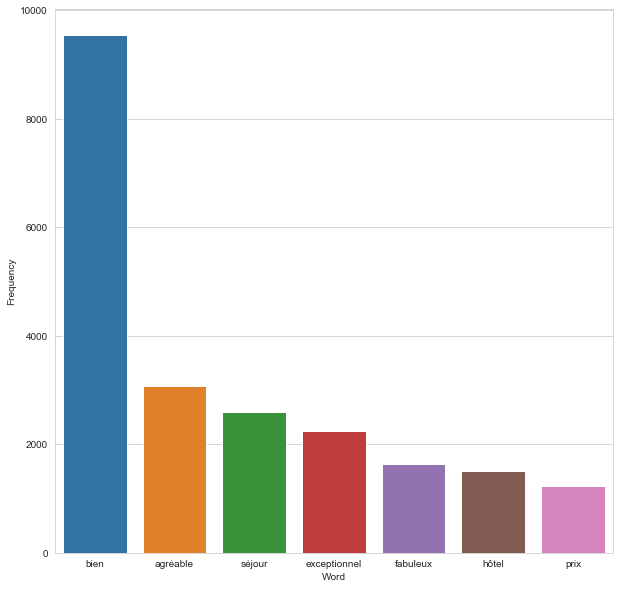

In [26]:
#histogramme des 7 mots les plus fréquents
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

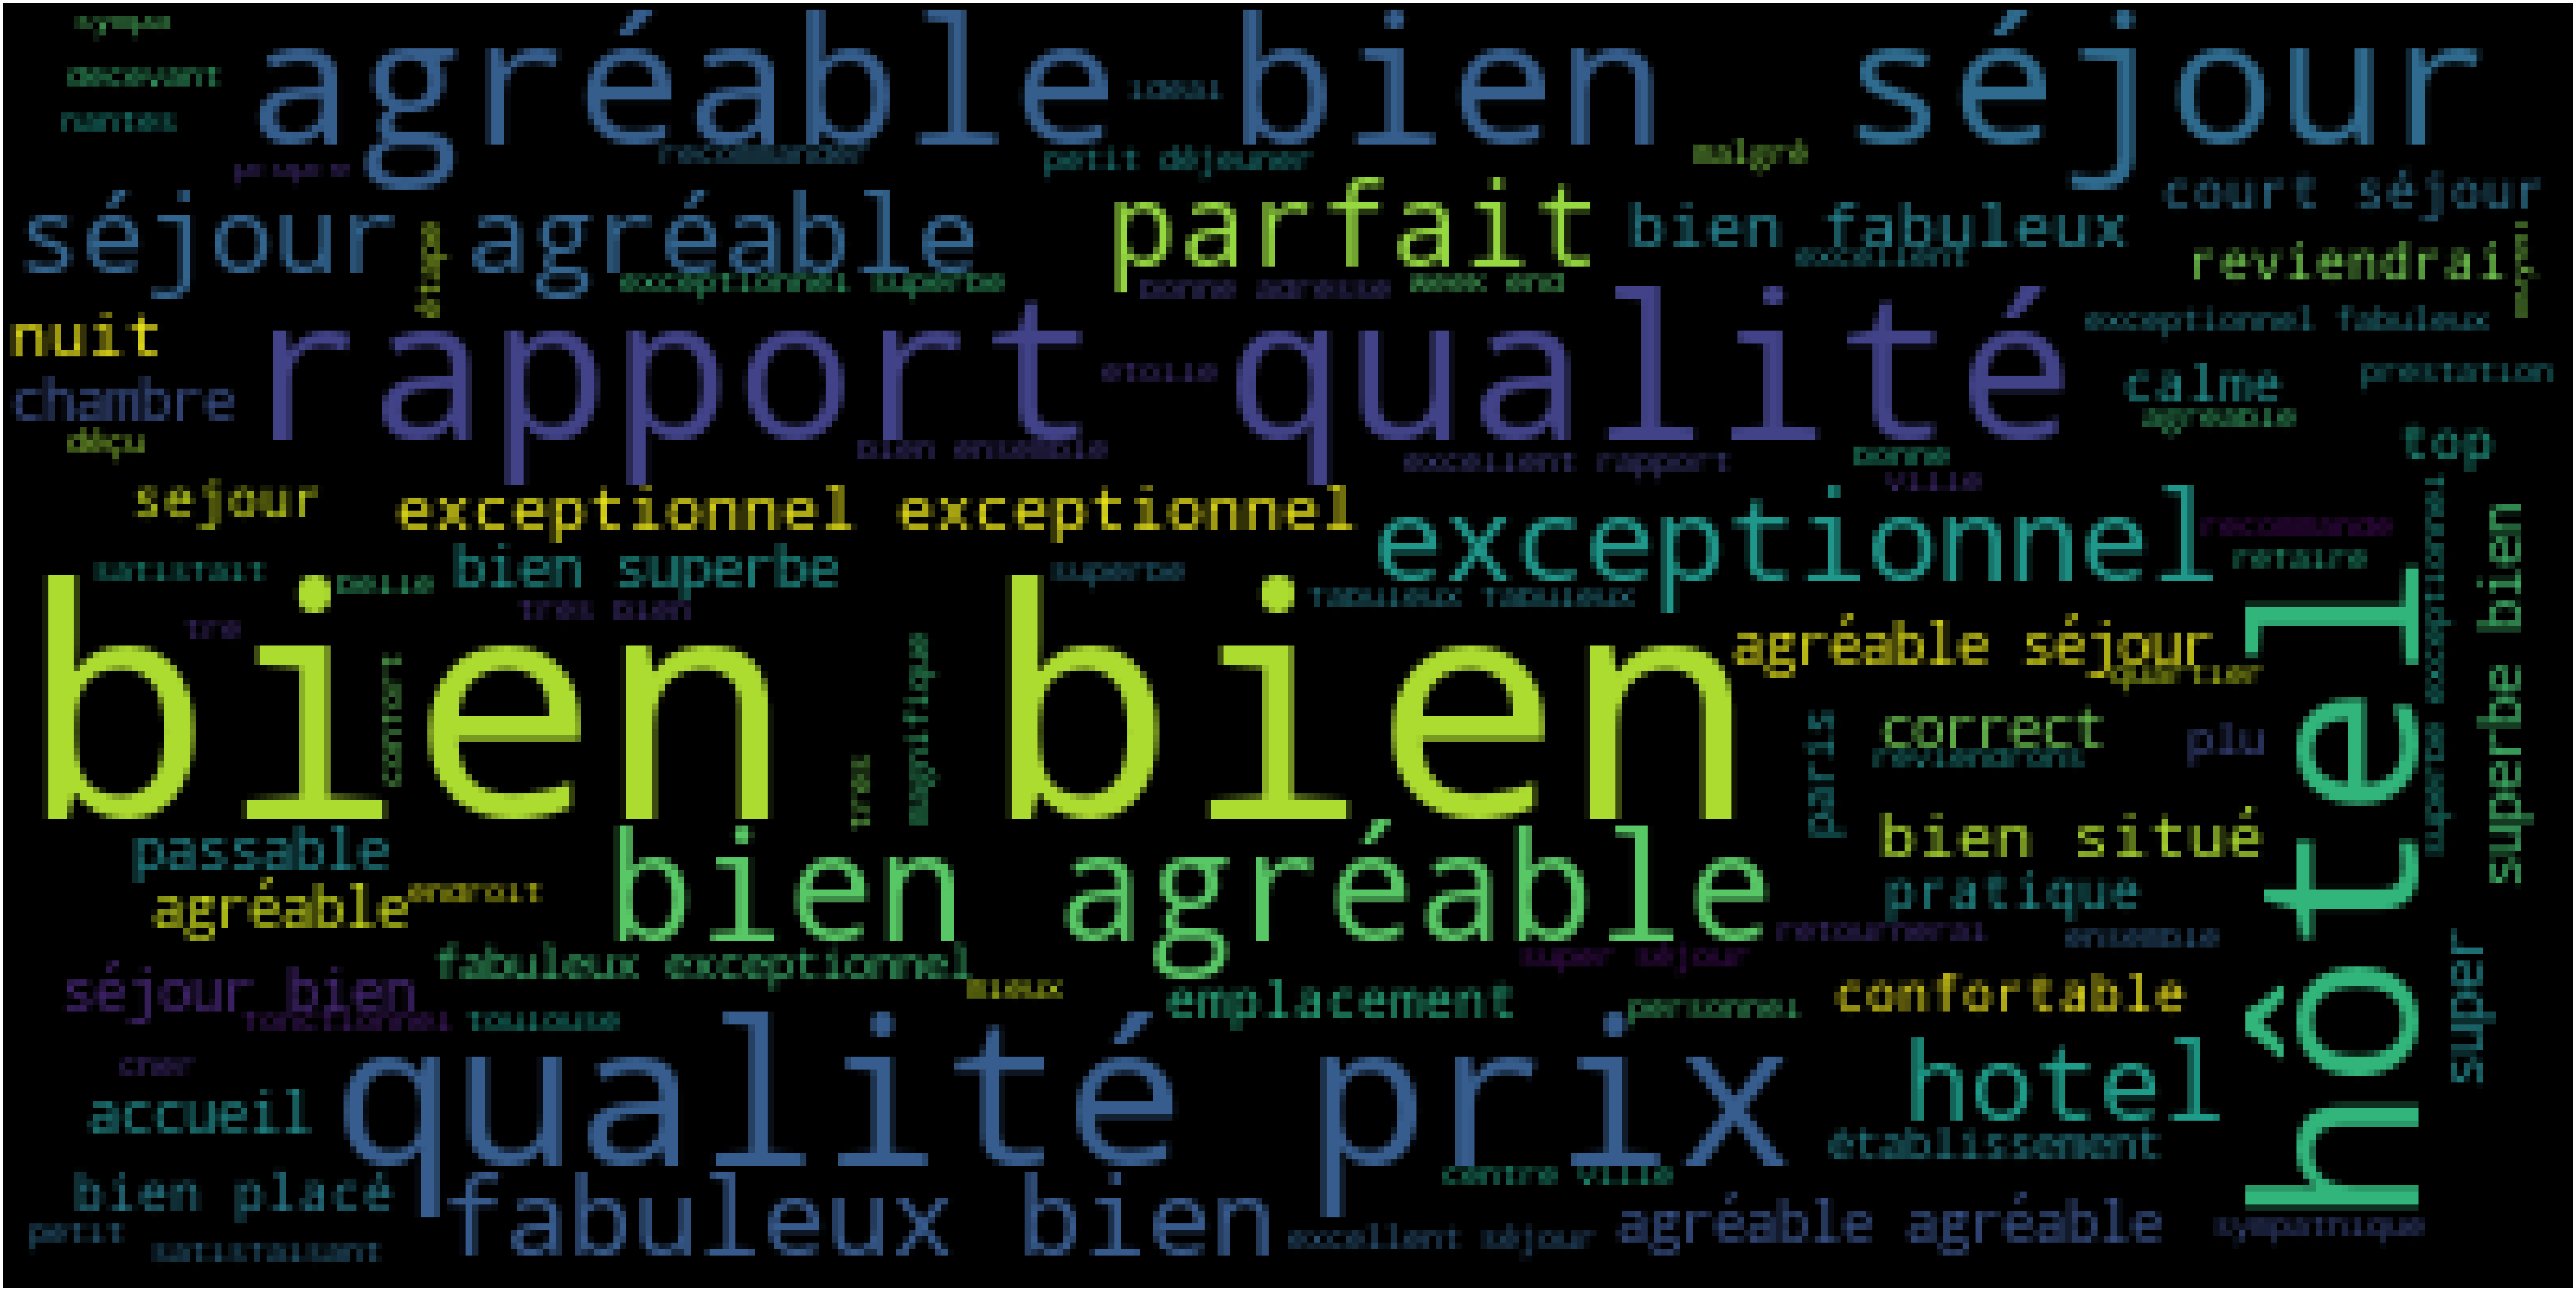

In [27]:
#nuage de mots
wcloud(cleaned_data,'black','Common Words')

In [28]:
#mettre tous les éléments en miniscule, séparés par un espace
a = df['bons_points'].str.lower().str.cat(sep=' ')

#supprimer ponctuation, nombres and retourner une liste de mots
b = re.sub('[^a-zàâéèêëïîôùûç]+', ' ', a)

#supprimer tous les mots "vides" du texte
stop_words = list(get_stop_words('french'))         
nltk_words = list(stopwords.words('french'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#supprimer les mots qui ont une longueur inférieure à 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

In [29]:
#supprimer les caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

#calculer les 100 mots les plus fréquents
top_N = 100
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [30]:
#affichage dans un dataframe des 7 mots les plus fréquents
rslt.head(7)

Word  Frequency
0    personnel       7096
1        petit       6657
2      chambre       6587
3     déjeuner       5299
4         bien       5126
5      accueil       4875
6  emplacement       4508

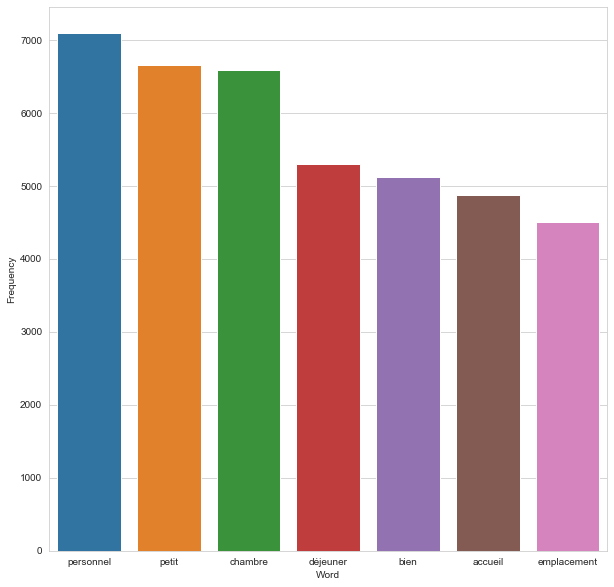

In [31]:
#histogramme des 7 mots les plus fréquents
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

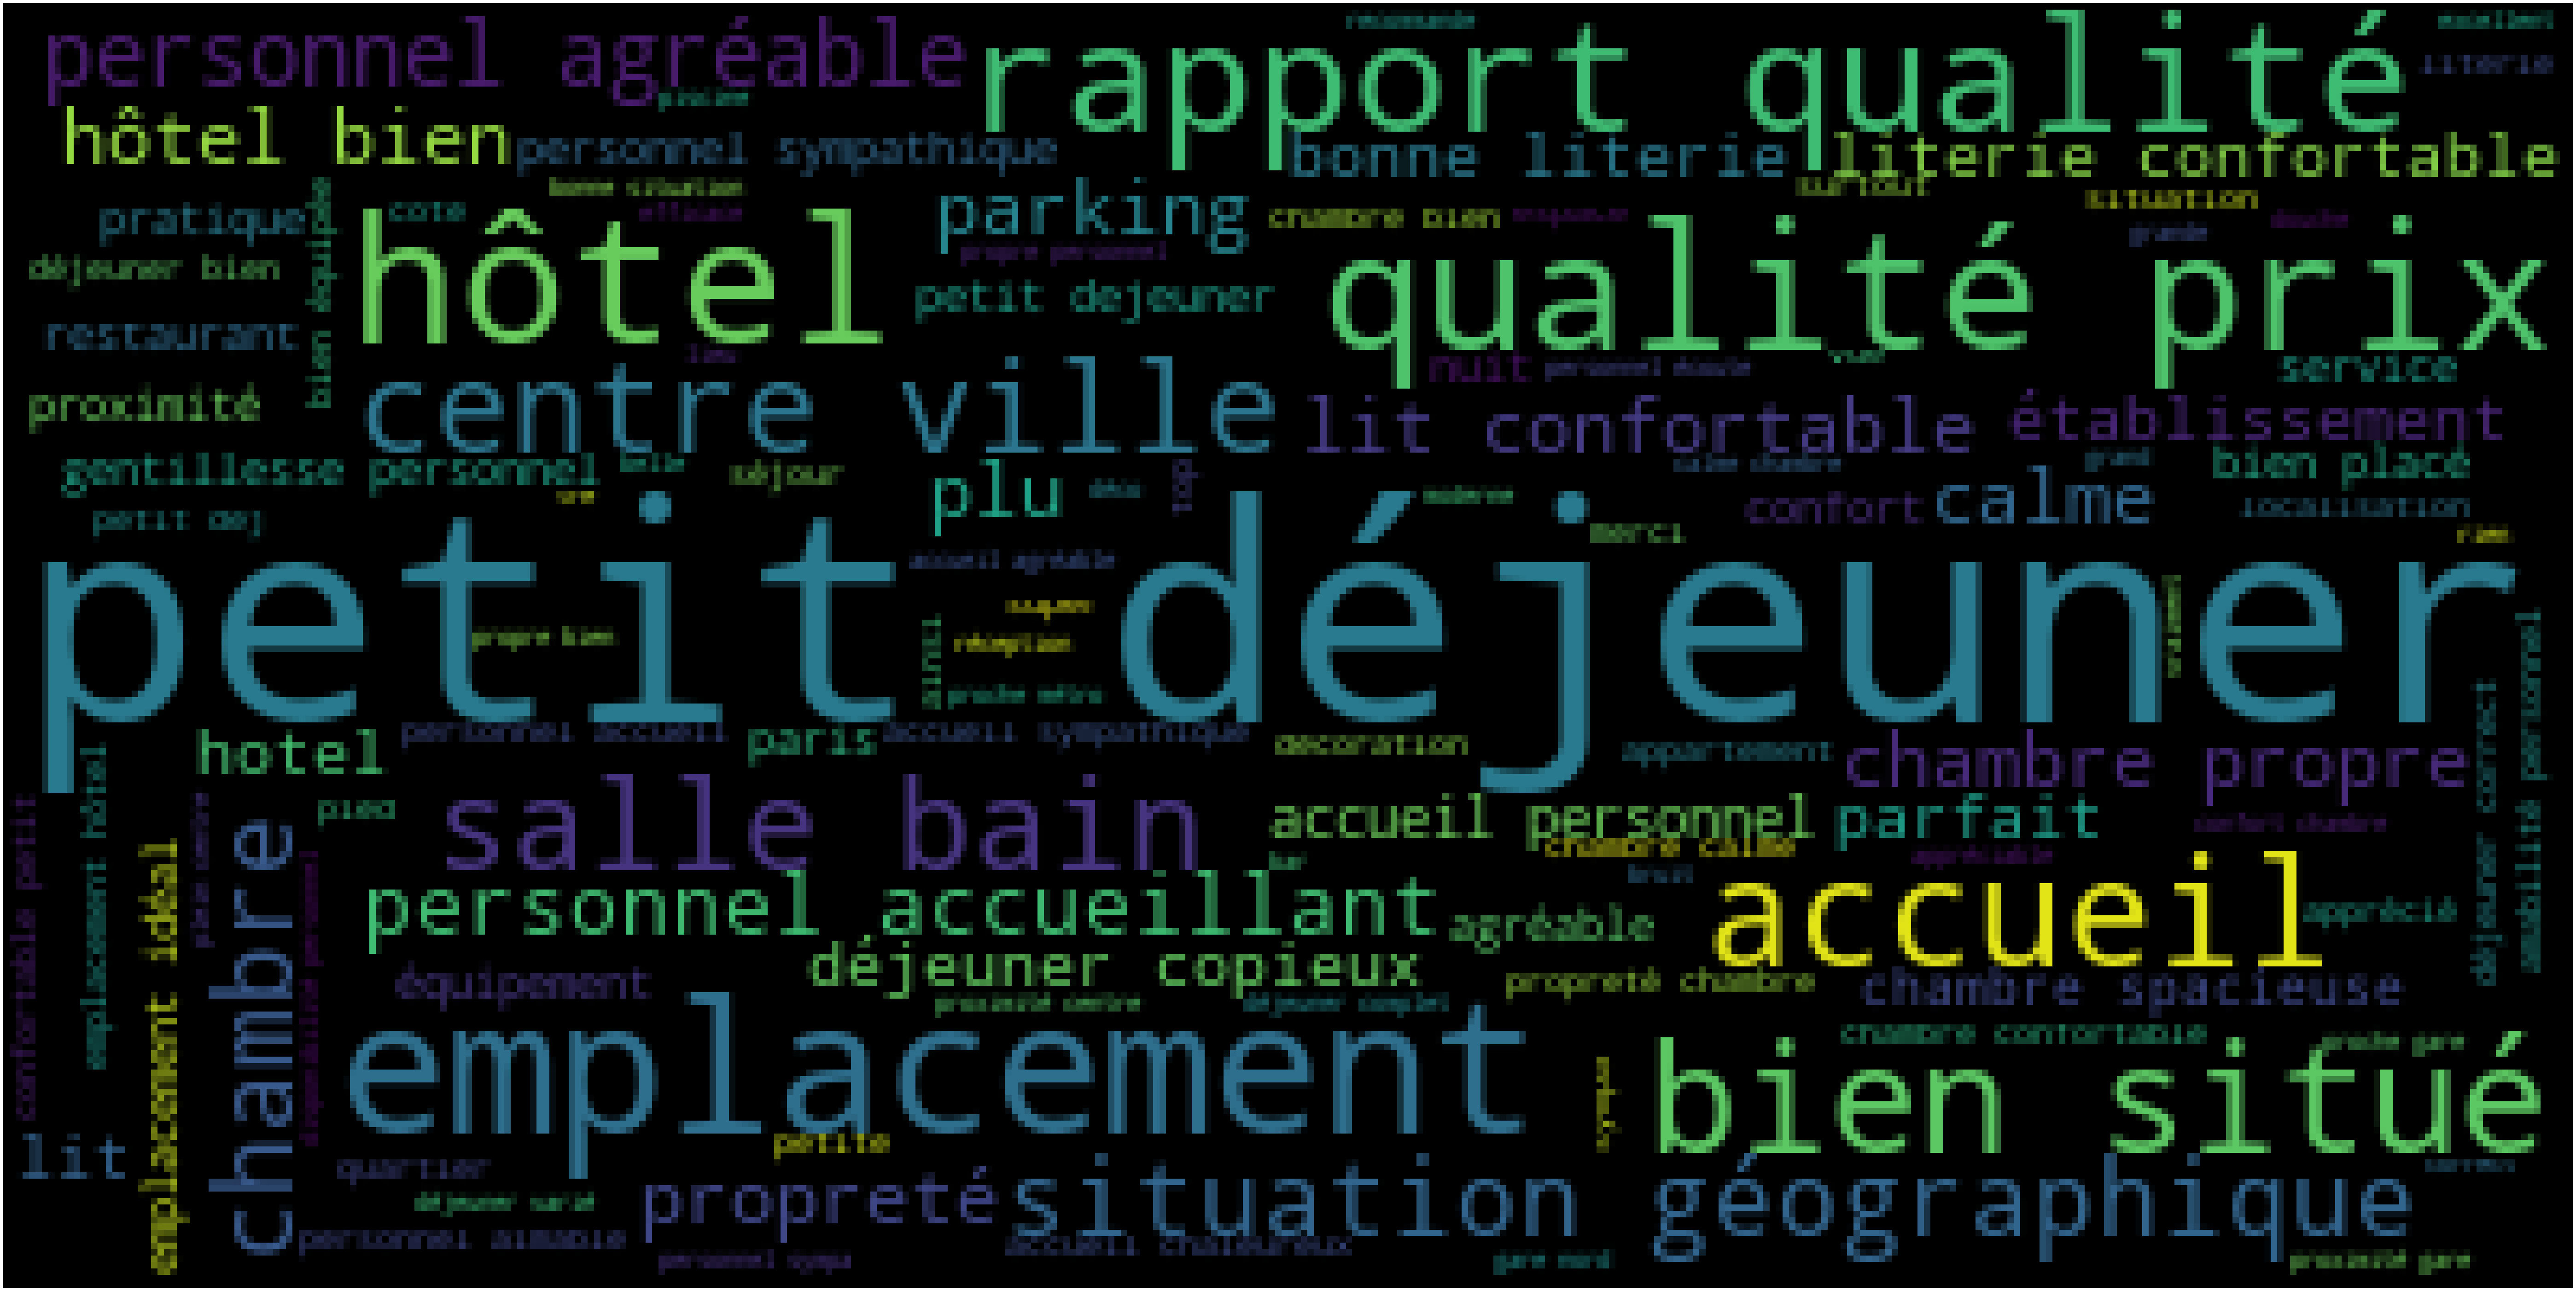

In [32]:
#nuage de mots
wcloud(cleaned_data,'black','Common Words')

In [33]:
#mettre tous les éléments en miniscule, séparés par un espace
a = df['mauvais_points'].str.lower().str.cat(sep=' ')

#supprimer ponctuation, nombres and retourner une liste de mots
b = re.sub('[^A-Za-zàâéèêëïîôùûç]+', ' ', a)

#supprimer tous les mots "vides" du texte
stop_words = list(get_stop_words('french'))         
nltk_words = list(stopwords.words('french'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#supprimer les mots qui ont une longueur inférieure à 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

#supprimer caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

In [34]:
#supprimer caractères numériques
cleaned_data = [word for word in without_single_chr if not word.isnumeric()]        

#calculer les 100 mots les plus fréquents
top_N = 100
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [35]:
#affichage dans un dataframe des 7 mots les plus fréquents
rslt.head(7)

Word  Frequency
0   chambre       6337
1     petit       3380
2     salle       3138
3  déjeuner       2309
4      bain       2243
5    douche       2047
6      rien       1998

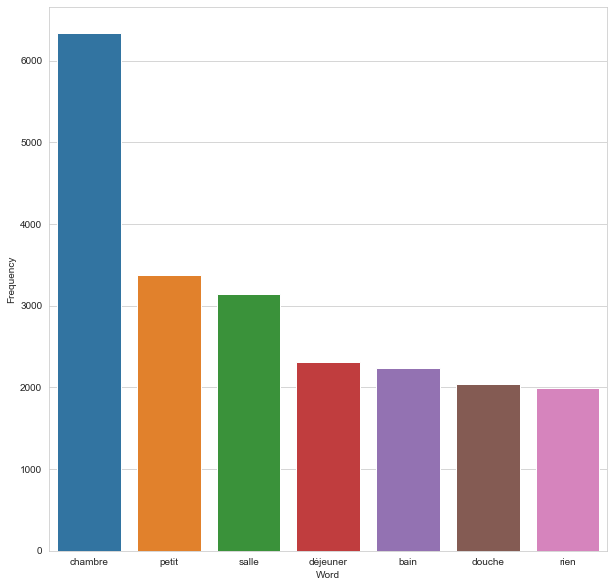

In [36]:
#histogramme des 7 mots les plus fréquents
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

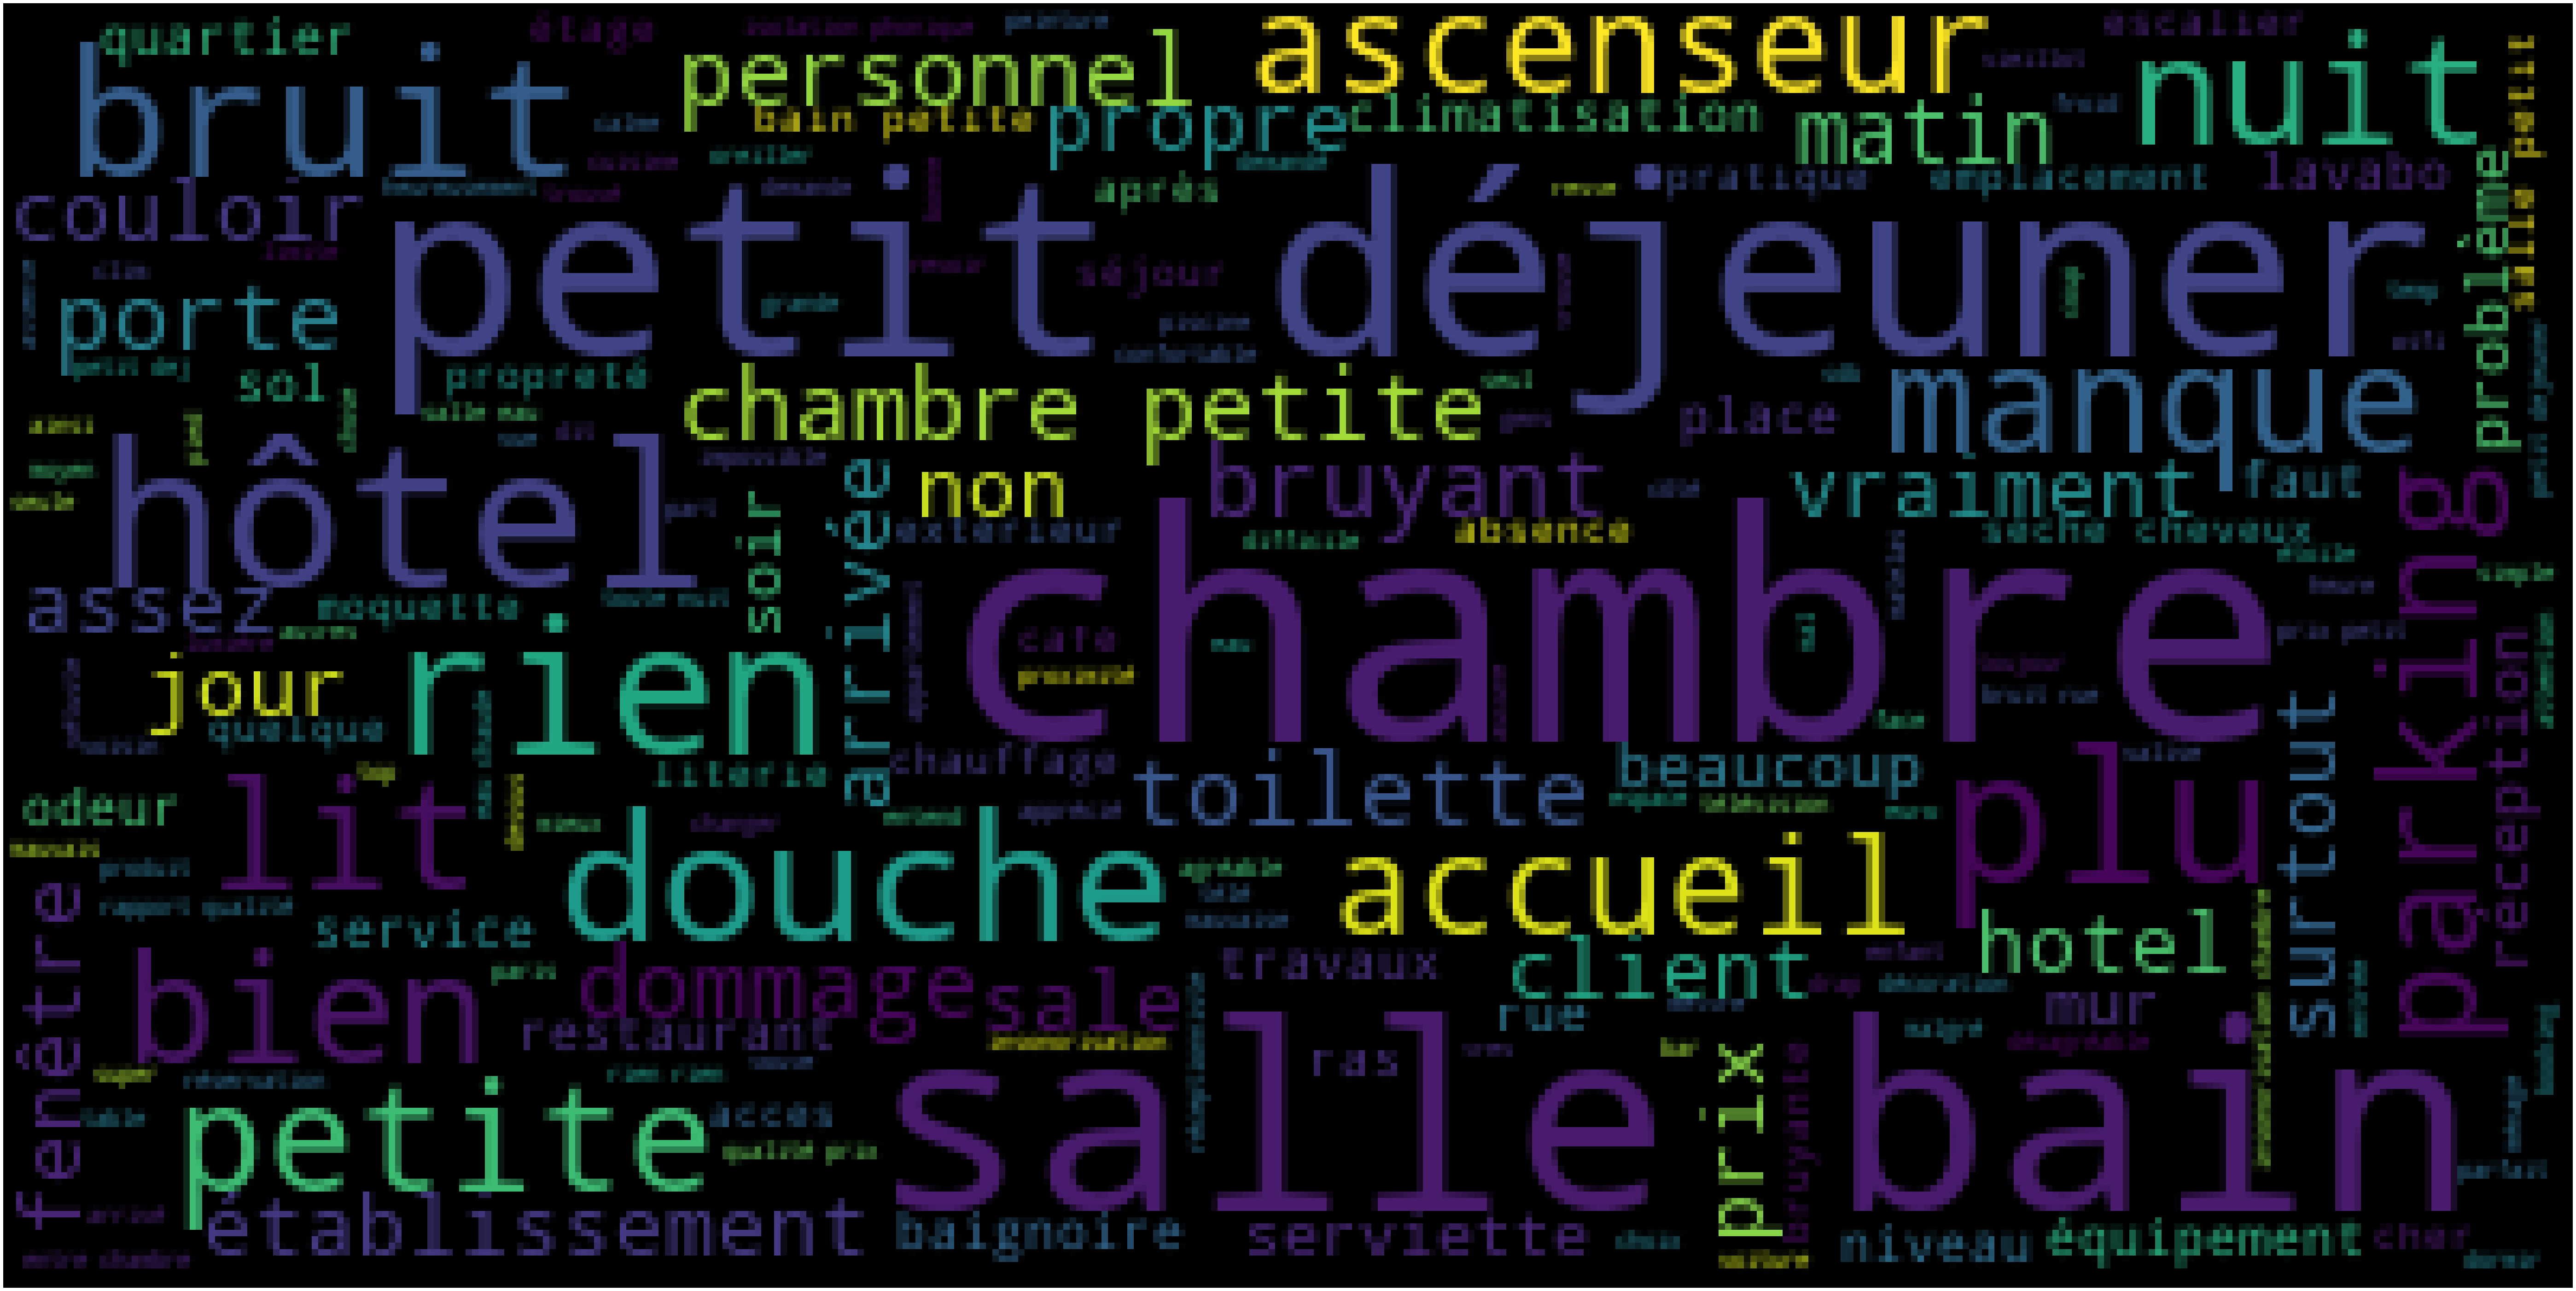

In [37]:
#nuage de mots
wcloud(cleaned_data,'black','Common Words')

In [38]:
#vérification que les NaN dans la colonne 'mauvais points' ont bien de façon certaine une polarité de zéro pour TextBlob, 
#sentiment[0]=polarite et sentiment[1]=subjectivité
#text = u"NaN"
#blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
#blob.sentiment
#print('NaN a une polarité de {} et une subjectivité de {}.'.format(blob.sentiment[0], blob.sentiment[1]))

In [39]:
#suppression des Nan
#df = df.fillna('')
#suppression de deux phrases récurrentes dans les données
#df = df[df.bons_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.bons_points != "Ce client n'a pas laissé de commentaire."]

#df = df[df.mauvais_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.mauvais_points != "Ce client n'a pas laissé de commentaire."]

In [40]:
#suppression de deux phrases récurrentes dans les données
#df = df[df.bons_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.bons_points != "Ce client n'a pas laissé de commentaire."]

#df = df[df.mauvais_points != "Ce commentaire n'apparaît pas car il ne respecte pas notre charte."]
#df = df[df.mauvais_points != "Ce client n'a pas laissé de commentaire."]

In [41]:
#concaténation 
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
df22 = pd.DataFrame(df, columns= ['bons_points', 'mauvais_points'])

df23=df22['bons_points']
df24=df22['mauvais_points']

In [42]:
df23=pd.DataFrame(data=df23)
#df23['polarite']=1
df23.head()

bons_points
0  Établissement recent, propre, soigne, chouette...
1  Accueil très chaleureux, chambre calme...tout ...
2  Tout bié sauf le wifi catastrophiquement lent!...
3                                                   
4  Excellent rapport qualité prix. Personnel très...

In [43]:
df24=pd.DataFrame(data=df24)
#df24['polarité']=0
df24.columns = ['bons_points']
df24.head()

bons_points
0                            Rien
1                                
2                                
3  Hôtel parfait. Quartier sympa.
4

In [44]:
frames = [df23, df24]
result = pd.concat(frames)
result

bons_points
0      Établissement recent, propre, soigne, chouette...
1      Accueil très chaleureux, chambre calme...tout ...
2      Tout bié sauf le wifi catastrophiquement lent!...
3                                                       
4      Excellent rapport qualité prix. Personnel très...
...                                                  ...
30941  C'est regrettable de ne pas avoir de plateau d...
30942                     Rien tout étais au top! Merci!
30943                                               Rien
30944                                                   
30945                                           Le bruit

[58844 rows x 1 columns]

In [45]:
df21 = result['bons_points']
df21 = pd.DataFrame(df21, columns=['bons_points'])

In [46]:
df21.head()

bons_points
0  Établissement recent, propre, soigne, chouette...
1  Accueil très chaleureux, chambre calme...tout ...
2  Tout bié sauf le wifi catastrophiquement lent!...
3                                                   
4  Excellent rapport qualité prix. Personnel très...

In [47]:
df21.columns=['sentences']

In [48]:
#mettre les commentaires du dataframe en miniscule
df21['sentences']=df21['sentences'].str.lower()
df21.head()

sentences
0  établissement recent, propre, soigne, chouette...
1  accueil très chaleureux, chambre calme...tout ...
2  tout bié sauf le wifi catastrophiquement lent!...
3                                                   
4  excellent rapport qualité prix. personnel très...

In [49]:
df21.shape

(58844, 1)

In [50]:
#remplacement de tout ce qui n'est pas dans le set[] par un espace
df21['sentences'] = df21['sentences'].apply(lambda x: re.sub('[^a-zàâéèêëïîôùûçæœ-]+',' ', str(x))) 
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [51]:
from nltk.corpus import stopwords
stop = stopwords.words('french')

In [52]:
#suppression des mots "vides" dans le dataframe
df21['sentences'] = df21['sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [53]:
#suppression des mots d'une longueur inférieure à 2 caractères
#\b=la fin et le début d'un mot
#`r' ou`R': préfixe pour les chaines de caractère 
df21['sentences']=df21.sentences.str.replace(r'\b(\w{1,2})\b', '')
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

def tokenization_s(sentences): # same can be achieved for words tokens
    s_new = []
    for sent in (sentences[:][0]): #For NumpY = sentences[:]
        s_token = sent_tokenize(sent)
        if s_token != '':
            s_new.append(s_token)
    return s_new

 

def tokenization_w(words):
    w_new = []
    for w in (words[:][0]):  # for NumPy = words[:]
        w_token = word_tokenize(w)
        if w_token != '':
            w_new.append(w_token)
    return w_new

 

checker = SpellChecker('fr', 'fr_FR')
def correct_w(words):
    w_new = []
    for w in (words[:][0]):
        checker.set_text(text)
        for s in checker:)[0]
            print(sug)
            s.replace(sug)
        hayo.append(checker.get_text())

In [54]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

def return_stem(sentence):
    doc = nlp(sentence)
    return [stemmer.stem(X.text) for X in doc]

In [55]:
df22=df21.copy()

In [56]:
type(df22)

pandas.core.frame.DataFrame

In [57]:
df22.head()

sentences
0  établissement recent propre soigne chouette de...
1  accueil très chaleureux chambre calme tout pas...
2  tout bié sauf wifi catastrophiquement lent meg...
3                                                   
4  excellent rapport qualité prix personnel très ...

In [58]:
#Existe-t-il des variables numériques?
df21['sentences'].apply(lambda x: not any(i.isnumeric() for i in x.split())).any()

False

In [59]:
df21['sentences'].str.contains(r'[0-9]').any()

False

In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
#récupération des commentaires dans le type series
df21 = df21['sentences']
type(df21)

pandas.core.series.Series

In [62]:
#calcul de la polarité des commentaires avec TextBlob
bloblist_desc = list()

df_str=df21.astype(str)
for row in df_str:
    blob = TextBlob(row)
    #print(blob)
    pos_tagger=PatternTagger()
    analyzer=PatternAnalyzer()
    blob = tb(str(blob)) #textblob
    #sentiment renvoie un tuple avec la polarité et la subjectivite
    #print(blob.sentiment[0])
    #type(blob.sentiment[0])
    bloblist_desc.append(blob.sentiment[0])
    #df_polarity_desc1 = pd.DataFrame(bloblist_desc, columns = ['sentiment'])

In [63]:
#récupération des résultats de la polarité dans un dataframe
df_polarity_desc1 = pd.DataFrame(data = bloblist_desc)
df_polarity_desc1.columns = ['sentiment']
df_polarity_desc1.head()

sentiment
0   0.261429
1   0.422500
2  -0.066667
3   0.000000
4   0.487500

In [64]:
#classification des commentaires selon trois modalités (neutres, positifs et négatifs) dans un dataframe
def f(df_polarity_desc1):
    if df_polarity_desc1['sentiment'] > 0:
        val = "positive"
    elif df_polarity_desc1['sentiment'] < 0:
        val = "negative"
    else :
        val = "neutre"
    return val

df_polarity_desc1.apply(f, axis=1)
df_polarity_desc1['polarite']=df_polarity_desc1.apply(f, axis=1)

In [65]:
df_polarity_desc1.head()

sentiment  polarite
0   0.261429  positive
1   0.422500  positive
2  -0.066667  negative
3   0.000000    neutre
4   0.487500  positive

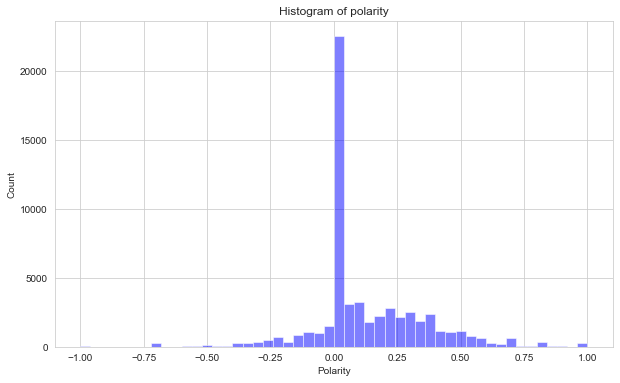

In [66]:
#fonction de masse de la polarité des commentaires
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_polarity_desc1.sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

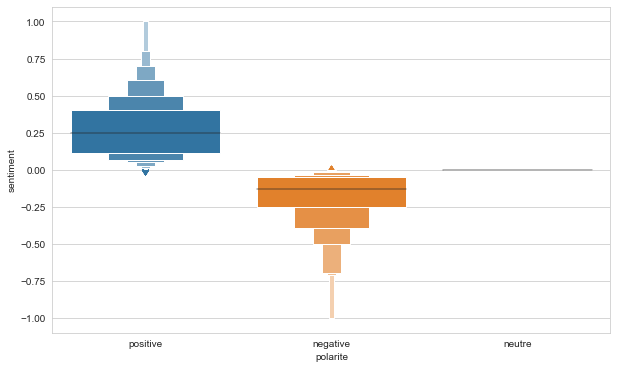

In [67]:
#boxenplot de la polarité des commenatires, boxplot avec plus de quartiles
plt.figure(figsize=(10,6))
sns.boxenplot(x='polarite', y='sentiment', data=df_polarity_desc1)
plt.show();

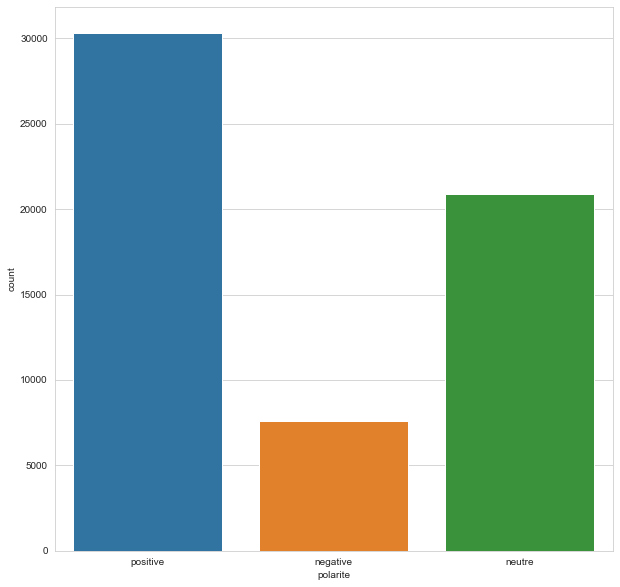

In [68]:
#countplot des modalités correspondant à la polarité des commentaires
df_polarity_desc1.head()
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="polarite", data=df_polarity_desc1)

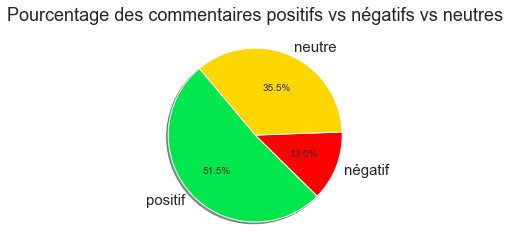

In [69]:
#diagramme circulaire des modalités de la polarité des commentaires
pourcentage_positive = round(len(df_polarity_desc1.loc[(df_polarity_desc1.polarite == "positive")])) / len(df_polarity_desc1)
pourcentage_negative = round(len(df_polarity_desc1.loc[(df_polarity_desc1.polarite == "negative")])) / len(df_polarity_desc1)
pourcentage_neutre = round(len(df_polarity_desc1.loc[(df_polarity_desc1.polarite == "neutre")])) / len(df_polarity_desc1)

fig1, ax1 = plt.subplots()

plt.title("Pourcentage des commentaires positifs vs négatifs vs neutres", fontsize=18)
labels = ['positif', 'négatif', 'neutre']
sizes = [pourcentage_positive, pourcentage_negative, pourcentage_neutre]
#explode = (0, 0.2)  # seulement détacher le second groupe

patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow = True, startangle=130, colors = ['#00e64d', 'r', '#FFD700'])
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)
texts[2].set_fontsize(15)

matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = [6, 6]

In [70]:
df = pd.read_csv(r"C:\Users\utilisateur\Documents\Projet\ProjetNLP\booking.csv", na_values=['None'], decimal=',')
df23=df['note']
df24=df['note']
frames = [df23, df24]
df_notes = pd.concat(frames)
df_notes.shape

(61892,)

In [71]:
type(df_notes)

pandas.core.series.Series

In [72]:
df_polarity_desc1_polarite = df_polarity_desc1.iloc[:,1]
#df_polarity_desc1_polarite = pd.DataFrame(df_polarity_desc1_polarite)
df_polarity_desc1_polarite.head()

0    positive
1    positive
2    negative
3      neutre
4    positive
Name: polarite, dtype: object

In [73]:
df_notes.reset_index(drop=True, inplace=True)
df_polarity_desc1_polarite.reset_index(drop=True, inplace=True)
df_corr = pd.concat([df_polarity_desc1_polarite, df_notes], axis = 1)

In [74]:
df_corr.head()

polarite  note
0  positive  10.0
1  positive   9.0
2  negative   9.6
3    neutre  10.0
4  positive   9.0

In [75]:
df_corr=df_corr.loc[(df_corr.polarite=='positive')|(df_corr.polarite=='negative')]

In [76]:
type(df_corr)

pandas.core.frame.DataFrame

In [77]:
df_corr.head()

polarite  note
0  positive  10.0
1  positive   9.0
2  negative   9.6
4  positive   9.0
5  positive   7.9

In [78]:
df_corr['polarite'] = np.where(df_corr['polarite'] == 'positive', 1, 0)
df_corr.head()

polarite  note
0         1  10.0
1         1   9.0
2         0   9.6
4         1   9.0
5         1   7.9

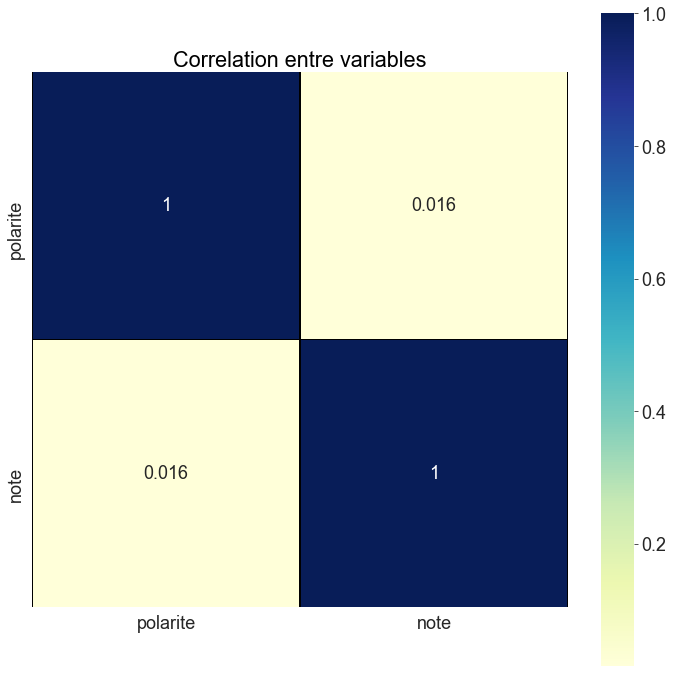

In [79]:
#affichage des corrélations entre variables
#parfaite si r = 1
#très forte si r > 0,8
#forte si r se situe entre 0,5 et 0,8
#d'intensité moyenne si r se situe entre 0,2 et 0,5
#faible si r se situe entre 0 et 0.2

f, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlation entre variables')
sns.heatmap(df_corr.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

In [80]:
#concaténation des trois colonnes correspondant aux commentaires sur les hôtels
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
df22 = pd.DataFrame(df, columns= ['titre', 'bons_points', 'mauvais_points'])

df21 = df22['titre'].map(str) + ' ' + df22['bons_points'].map(str) + ' ' + df22['mauvais_points'].map(str)

df21

0        Exceptionnel Établissement recent, propre, soi...
1        Fabuleux  Accueil très chaleureux, chambre cal...
2        Exceptionnel Tout bié sauf le wifi catastrophi...
3          Exceptionnel nan Hôtel parfait. Quartier sympa.
4        Fabuleux  Excellent rapport qualité prix. Pers...
                               ...                        
30941    Exceptionnel L'hôtel est agréable et confortab...
30942    Exceptionnel La chambre, le personnel au top e...
30943    Hôtel très confortable La chambre, ses équipem...
30944         Déjà utilisé plusieurs fois Salle claire nan
30945           Bien  La situation face à la gare Le bruit
Length: 30946, dtype: object

In [81]:
#convertir series en dataframe
df21 = df21.to_frame(name="sentences")

In [82]:
#mettre les commentaires du dataframe en miniscule
df21['sentences']=df21['sentences'].str.lower()
df21.head()

sentences
0  exceptionnel établissement recent, propre, soi...
1  fabuleux  accueil très chaleureux, chambre cal...
2  exceptionnel tout bié sauf le wifi catastrophi...
3    exceptionnel nan hôtel parfait. quartier sympa.
4  fabuleux  excellent rapport qualité prix. pers...

In [83]:
#remplacement de tout ce qui n'est pas dans le set[] par un espace
df21['sentences'] = df21['sentences'].apply(lambda x: re.sub('[^a-zàâéèêëïîôùûçæœ-]+',' ', str(x))) 
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [84]:
#suppression des mots "vides" dans le dataframe
stop = stopwords.words('french')
df21['sentences'] = df21['sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [85]:
#suppression des mots d'une longueur inférieure à 2 caractères
#\b=la fin et le début d'un mot
#`r' ou`R': préfixe pour les chaines de caractère 
df21['sentences']=df21.sentences.str.replace(r'\b(\w{1,2})\b', '')
#for index, row in df21.iterrows():
    #print('index: ', index, 'col sentences:', row['sentences'])

In [86]:
df22=df21.copy()

In [87]:
type(df22)

pandas.core.frame.DataFrame

In [88]:
df22.head()

sentences
0  exceptionnel établissement recent propre soign...
1  fabuleux accueil très chaleureux chambre calme...
2  exceptionnel tout bié sauf wifi catastrophique...
3      exceptionnel nan hôtel parfait quartier sympa
4  fabuleux excellent rapport qualité prix person...

In [89]:
#Existe-t-il des variables numériques?
df21['sentences'].apply(lambda x: not any(i.isnumeric() for i in x.split())).any()

False

In [90]:
#récupération des commentaires dans le type series
df21 = df21['sentences']
type(df21)

pandas.core.series.Series

In [91]:
#calcul de la polarité des commentaires avec TextBlob
bloblist_desc = list()

df_str=df21.astype(str)
for row in df_str:
    blob = TextBlob(row)
    #print(blob)
    pos_tagger=PatternTagger()
    analyzer=PatternAnalyzer()
    blob = tb(str(blob)) #textblob
    #sentiment renvoie un tuple avec la polarité et la subjectivite
    #print(blob.sentiment[0])
    #type(blob.sentiment[0])
    bloblist_desc.append(blob.sentiment[0])
    #df_polarity_desc1 = pd.DataFrame(bloblist_desc, columns = ['sentiment'])

In [92]:
#récupération des résultats de la polarité dans un dataframe
df_polarity_desc1 = pd.DataFrame(data = bloblist_desc)
df_polarity_desc1.columns = ['sentiment']
df_polarity_desc1.head()

sentiment
0  2.537500e-01
1  5.380000e-01
2  1.387779e-17
3  4.000000e-01
4  5.900000e-01

In [93]:
#classification des commentaires selon trois modalités (neutres, positifs et négatifs) dans un dataframe
def f(df_polarity_desc1):
    if df_polarity_desc1['sentiment'] > 0:
        val = "positive"
    elif df_polarity_desc1['sentiment'] < 0:
        val = "negative"
    else :
        val = "neutre"
    return val

df_polarity_desc1.apply(f, axis=1)
df_polarity_desc1['polarite']=df_polarity_desc1.apply(f, axis=1)

In [94]:
#sélection de la colonne notes 
df = pd.read_csv(r"C:\Users\utilisateur\Documents\Projet\ProjetNLP\booking.csv", na_values=['None'], decimal=',')
df_notes = df.iloc[:,7]
#df_notes = pd.DataFrame(data=df_notes)
df_notes.head()

0    10.0
1     9.0
2     9.6
3    10.0
4     9.0
Name: note, dtype: float64

In [95]:
#sélection de la colonne polarite
df_polarity_desc1_polarite = df_polarity_desc1.iloc[:,1]
#df_polarity_desc1_polarite = pd.DataFrame(df_polarity_desc1_polarite)
df_polarity_desc1_polarite.head()

0    positive
1    positive
2    positive
3    positive
4    positive
Name: polarite, dtype: object

In [96]:
#concaténation de la colonne notes et polarite
df_corr = pd.concat([df_polarity_desc1_polarite, df_notes], axis = 1)

In [97]:
#sélection des modalités postives ou négatives
df_corr=df_corr.loc[(df_corr.polarite=='positive')|(df_corr.polarite=='negative')]

In [98]:
#transformation des valeurs de la polarite en code binaire 0 et 1
df_corr['polarite'] = np.where(df_corr['polarite'] == 'positive', 1, 0)
df_corr.head()

polarite  note
0         1  10.0
1         1   9.0
2         1   9.6
3         1  10.0
4         1   9.0

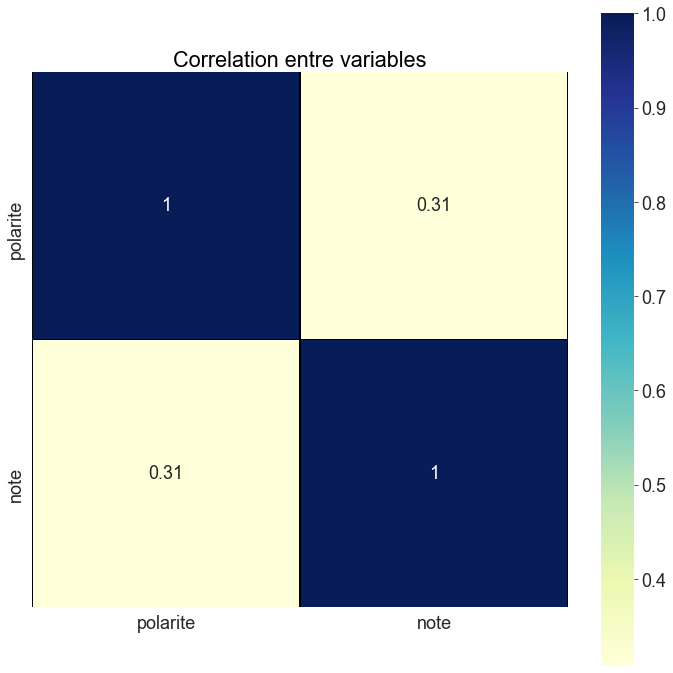

In [99]:
#affichage des corrélations entre variables
#parfaite si r = 1
#très forte si r > 0,8
#forte si r se situe entre 0,5 et 0,8
#d'intensité moyenne si r se situe entre 0,2 et 0,5
#faible si r se situe entre 0 et 0.2

f, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlation entre variables')
sns.heatmap(df_corr.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True);

In [100]:
#df_polarity_desc1.head()

In [101]:
#df_polarity_desc1.columns

In [102]:
#Transformation des valeurs de la variable polarite en 1 et 0
#pas besoin d'utiliser le module scikit-learn car on peut le faire directement 
df_polarity_desc1['polarite'] = np.where(df_polarity_desc1['polarite'] == 'positive', 1, 0)
df_polarity_desc1 = df_polarity_desc1.reset_index(drop=True)
df_polarity_desc1.head()

sentiment  polarite
0  2.537500e-01         1
1  5.380000e-01         1
2  1.387779e-17         1
3  4.000000e-01         1
4  5.900000e-01         1

In [103]:
#supression de la colonne sentiment
df_polarity_desc1.drop(['sentiment'],1,inplace=True)
df_polarity_desc1.head()

polarite
0         1
1         1
2         1
3         1
4         1

In [104]:
#création d'un dataframe comments avec la colonne sentences
df21.head()
comments = pd.DataFrame(data=df21)
comments.columns = ['sentences']
comments.head()
comments.shape
type(comments)

pandas.core.frame.DataFrame

In [105]:
#df_polarity_desc1.shape
#type(df_polarity_desc1)

In [106]:
#concaténation de la colonne sentences et la colonne polarite
dataset = pd.concat([comments, df_polarity_desc1])

In [107]:
comments.reset_index(drop=True, inplace=True)
df_polarity_desc1.reset_index(drop=True, inplace=True)
# fusion des deux datasets en un seul que l'on nommera df
df = pd.concat([df_polarity_desc1, comments], axis = 1)
#df.head(100)

In [108]:
#renommer les colonnes
df.columns=['sentiment', 'sentence']
df.head()

sentiment                                           sentence
0          1  exceptionnel établissement recent propre soign...
1          1  fabuleux accueil très chaleureux chambre calme...
2          1  exceptionnel tout bié sauf wifi catastrophique...
3          1      exceptionnel nan hôtel parfait quartier sympa
4          1  fabuleux excellent rapport qualité prix person...

In [109]:
#supression des données manquantes
df.isnull().values.any()
df.isnull().sum()
df=df.dropna()

In [110]:
#vérification des données manquantes
df.isnull().sum()

sentiment    0
sentence     0
dtype: int64

In [111]:
#création d'un csv contenant le dataframe df utilisé pour le machine learning
#df.to_csv('DatasetMarchineLearning.csv', index=True)

<h1>3. Machine learning</h1>

In [112]:
#création jeux train et test
X_train, X_test, y_train, y_test = train_test_split(df[['sentence']], df['sentiment'])

In [113]:
"""CountVectorizer de Scikit-learn est utilisé pour transformer un corpus de mots en 
vecteurs/occurence des mots """
#Tf signifie term-frequency tandis que tfidf signifie inverse document-frequency
#IDF(word) = Log((Total number of documents)/(Number of documents containing the word))
pipe = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe.fit(X_train['sentence'])
feat_train = pipe.transform(X_train['sentence'])
feat_train.shape

(23209, 15978)

In [114]:
#minimum et maximum pour feat_train
feat_train.min(), feat_train.max()

(0.0, 1.0)

In [115]:
#transformer sans entrainer sur notre jeu test
feat_test = pipe.transform(X_test['sentence'])
feat_test.shape

(7737, 15978)

In [116]:
#arbre de décision
#définir les paramètres
#le paramètre max_depth est un seuil sur la profondeur maximale de l’arbre
"""L'indice de diversité de gini : probabilité pour chaque élément d'être choisi multipliée 
par la probabilité qu'il soit mal classé"""
"""L'entropie au lieu d'utiliser les probabilités simples applique le log2 des probabilités"""
param_grid = {'max_depth' : [400, 500], 
              'criterion' : ['gini', 'entropy']}
             
dtc = DecisionTreeClassifier(random_state=42)

dtc_grid = GridSearchCV(dtc, param_grid, cv=3)
 
#entrainer le modèle à partir de Grid Search
%time DTC = dtc_grid.fit(feat_train, y_train)

print(dtc_grid.best_score_.round(5))
print(dtc_grid.best_params_)

final_model = dtc_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 29.1 s
0.90904
{'criterion': 'entropy', 'max_depth': 400}


In [117]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       1.00      1.00      1.00     19309

    accuracy                           1.00     23209
   macro avg       1.00      1.00      1.00     23209
weighted avg       1.00      1.00      1.00     23209



In [118]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1333
           1       0.95      0.95      0.95      6404

    accuracy                           0.92      7737
   macro avg       0.86      0.86      0.86      7737
weighted avg       0.92      0.92      0.92      7737



In [119]:
def MatriceConfusion(model):
    y_pred = model.predict(feat_test)
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, pred_test)
    plt.matshow(cm)
    plt.title('Matrice de confusion', y=1.12)
    plt.colorbar()
    print(cm)
    plt.show()

[[1031  302]
 [ 318 6086]]


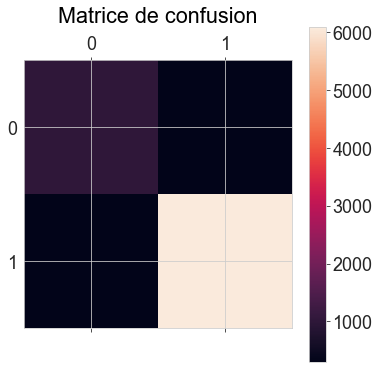

In [120]:
y_prediction = MatriceConfusion(DTC)

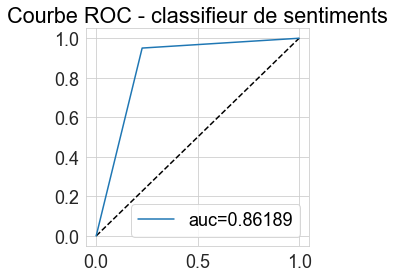

In [121]:
score = final_model.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [125]:
"""n_estimators = le nombre d'arbres dans la fôrét"""
"""Le Bootstrapping est un procédé qui permet d’augmenter artificiellement le nombre d’observation d’un 
échantillon de données sans pour autant modifier la distribution des variables présentes dans le jeu de 
données. Le principe est simple, on dispose d’un jeu de données contenant n observations, pour créer un 
échantillon de taille n  on tire avec remise n observations parmi le jeu de données original"""
param_grid = {'max_depth' : [30, 50],
             'n_estimators' : [150, 200]}
              #'bootstrap' : [True, False],
              #'criterion' : ['gini','entropy'] 

rfc = RandomForestClassifier(random_state=42)

rfc_grid = GridSearchCV(rfc, param_grid, cv = 3)

%time RFC = rfc_grid.fit(feat_train, y_train)

print(rfc_grid.best_score_.round(5))
print(rfc_grid.best_params_)

final_model = rfc_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 3min 39s
0.87462
{'max_depth': 50, 'n_estimators': 200}


In [126]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55      3900
           1       0.89      1.00      0.94     19309

    accuracy                           0.90     23209
   macro avg       0.94      0.69      0.74     23209
weighted avg       0.91      0.90      0.88     23209



In [127]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40      1333
           1       0.87      1.00      0.93      6404

    accuracy                           0.87      7737
   macro avg       0.93      0.63      0.66      7737
weighted avg       0.89      0.87      0.84      7737



[[ 334  999]
 [   0 6404]]


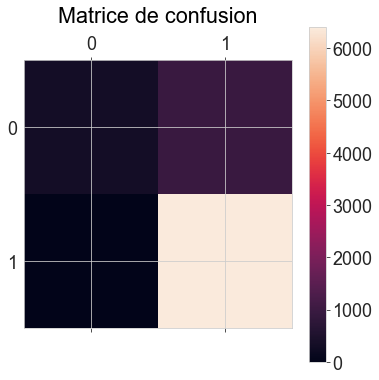

In [128]:
y_pred = MatriceConfusion(RFC)

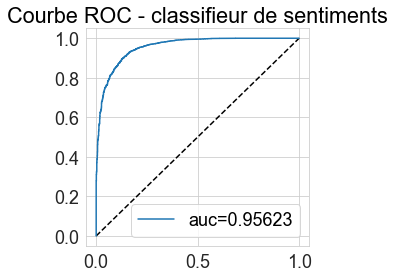

In [129]:
score = final_model.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [130]:
"""L1 : Lasso et L2 : Ridge, pénalité, c’est une modification qu’on apporte à la fonction de coût 
afin de maîtriser l’arbitrage entre biais vs variance"""
"""la fonction de coût est définie comme le carré de la différence entre la valeur prévue et la 
valeur réelle en fonction de l'intrant"""
"""quand le biais augmente, la variance baisse"""
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 1.58 s
0.92654
{'penalty': 'l2'}


In [131]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      3900
           1       0.95      1.00      0.97     19309

    accuracy                           0.95     23209
   macro avg       0.96      0.87      0.91     23209
weighted avg       0.95      0.95      0.95     23209



In [132]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1333
           1       0.94      0.99      0.96      6404

    accuracy                           0.94      7737
   macro avg       0.93      0.84      0.88      7737
weighted avg       0.94      0.94      0.93      7737



[[ 914  419]
 [  72 6332]]


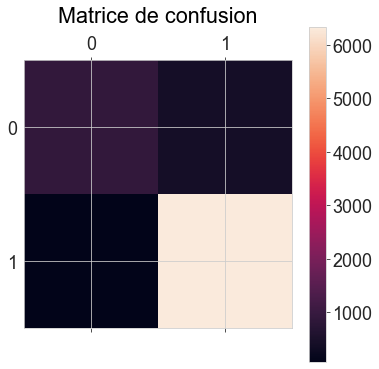

In [133]:
y_pred = MatriceConfusion(LR)

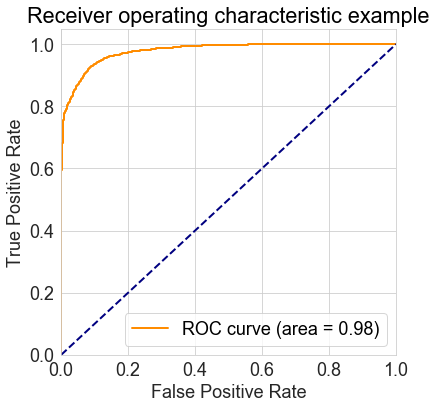

In [134]:
y_score = final_model.decision_function(feat_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [135]:
#bagging
"""Le mot Bagging est une contraction de Bootstrap Aggregation : sélection de sous-ensembles aléatoires de
l'ensemble des données d'origine, puis agrégation des prédictions individuelles pour former une prédiction
finale""" 

naivebayes = nb.BernoulliNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 1000, warm_start = True, bootstrap_features=True, max_samples=0.9)
modelB_fit = modelB.fit(feat_train, y_train)
modelB_fit.score(feat_test,y_test)
pred_train = modelB.predict(feat_train)
pred_test = modelB.predict(feat_test)

In [136]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      3900
           1       0.95      0.94      0.94     19309

    accuracy                           0.91     23209
   macro avg       0.83      0.84      0.84     23209
weighted avg       0.91      0.91      0.91     23209



In [137]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66      1333
           1       0.92      0.94      0.93      6404

    accuracy                           0.89      7737
   macro avg       0.81      0.79      0.80      7737
weighted avg       0.88      0.89      0.89      7737



[[ 841  492]
 [ 374 6030]]


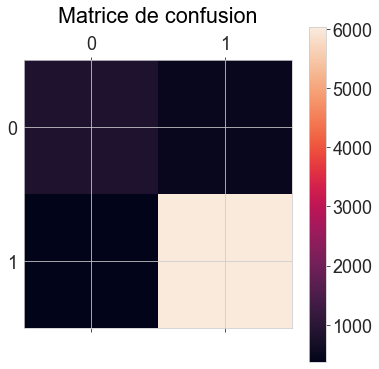

In [138]:
y_pred = MatriceConfusion(modelB_fit)

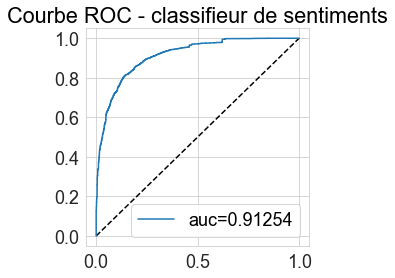

In [139]:
score = modelB_fit.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [142]:
param_grid = {#'C': [10, 50, 100,200],
              #'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}

svm = SVC(random_state=42)

svm_grid = GridSearchCV(svm, param_grid, cv=3)

%time SVM = svm_grid.fit(feat_train, y_train)

print(svm_grid.best_score_.round(5))
print(svm_grid.best_params_)

Wall time: 4min 21s
0.93339
{'kernel': 'rbf'}


In [143]:
final_model = svm_grid.best_estimator_

In [144]:
pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

In [145]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3900
           1       0.99      1.00      1.00     19309

    accuracy                           1.00     23209
   macro avg       1.00      0.99      0.99     23209
weighted avg       1.00      1.00      1.00     23209



In [146]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1333
           1       0.95      0.99      0.97      6404

    accuracy                           0.94      7737
   macro avg       0.94      0.86      0.89      7737
weighted avg       0.94      0.94      0.94      7737



[[ 973  360]
 [  69 6335]]


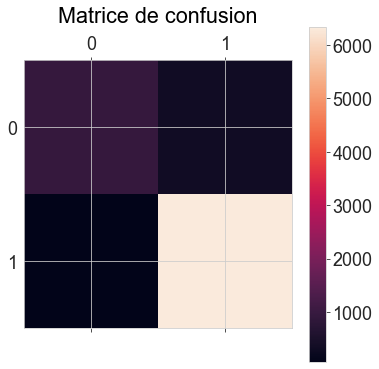

In [147]:
y_pred = MatriceConfusion(SVM)

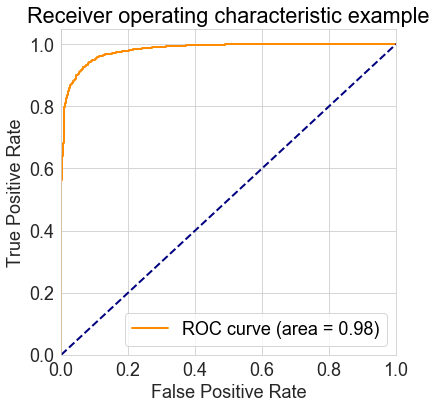

In [148]:
y_score = SVM.decision_function(feat_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [149]:
param_grid = {
    #"learning_rate": [0.05,0.01, 0.1],
    #"max_depth":[20, 30, 50],
    #"criterion": ["friedman_mse", "mae", "mse"],
    'n_estimators' : [30, 50, 70]}

gbc=GradientBoostingClassifier(random_state=42)

gbc_grid = GridSearchCV(gbc, param_grid, cv = 3)

%time GBC = gbc_grid.fit(feat_train, y_train)
print (gbc_grid.best_score_.round(5))
print(gbc_grid.best_params_)

final_model = gbc_grid.best_estimator_

pred_train = final_model.predict(feat_train) 
pred_test = final_model.predict(feat_test)

Wall time: 2min 25s
0.88591
{'n_estimators': 70}


In [150]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.96      0.36      0.52      3900
           1       0.88      1.00      0.94     19309

    accuracy                           0.89     23209
   macro avg       0.92      0.68      0.73     23209
weighted avg       0.90      0.89      0.87     23209



In [151]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.35      0.51      1333
           1       0.88      1.00      0.94      6404

    accuracy                           0.89      7737
   macro avg       0.92      0.67      0.72      7737
weighted avg       0.89      0.89      0.86      7737



[[ 469  864]
 [  23 6381]]


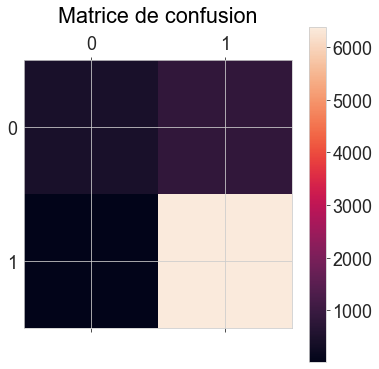

In [152]:
y_pred = MatriceConfusion(GBC)

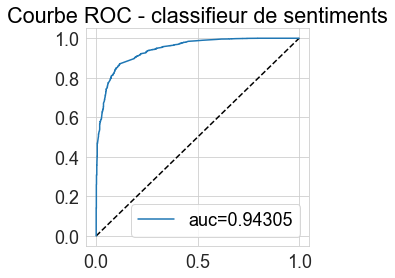

In [153]:
score = gbc_grid.predict_proba(feat_test)
fpr, tpr, th = roc_curve(y_test, score[:, 1])
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur de sentiments')
ax.legend();

In [154]:
#un n-gramme est “une sous-séquence de n éléments construite à partir d’une séquence donnée” 
#n-gramme permet de créer un modèle probabiliste pour anticiper le prochain élément d’une suite
#padding="remplissage"
generated_ngrams = ngrams(word_tokenize(X_train.iloc[0,0]), 3, pad_left=True, pad_right=True)
list(generated_ngrams)[:7]

[(None, None, 'rapport'),
 (None, 'rapport', 'qualite'),
 ('rapport', 'qualite', 'prix'),
 ('qualite', 'prix', 'très'),
 ('prix', 'très', 'bien'),
 ('très', 'bien', 'proprete'),
 ('bien', 'proprete', 'ras')]

In [155]:
#ngram_range of (1, 2) means unigrams and bigrams
#Un 2-gram (or bi-gram) est une séquance de 2 mots : “please turn”, “turn your” 
pipe2 = make_pipeline(CountVectorizer(ngram_range=(1, 2)),
                      TfidfTransformer())
pipe2.fit(X_train['sentence'])
feat_train2 = pipe2.transform(X_train['sentence'])
feat_train2.shape

(23209, 174572)

In [156]:
#get_feature_names() - retourne une liste de feature names, classés par leurs indices
cl = pipe2.steps[0]
cl[1].get_feature_names()[:10]

['aacueil',
 'aacueil réception',
 'abandon',
 'abandon commune',
 'abandon couloir',
 'abandon rideaux',
 'abandon robinets',
 'abandon tout',
 'abandonne',
 'abandonne jamain']

In [157]:
feat_test2 = pipe2.transform(X_test['sentence'])

In [158]:
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train2, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

Wall time: 8.68 s
0.90258
{'penalty': 'l2'}


In [159]:
feat_test2 = pipe2.transform(X_test['sentence'])

In [160]:
final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train2) 
pred_test = final_model.predict(feat_test2)

In [161]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78      3900
           1       0.93      1.00      0.96     19309

    accuracy                           0.94     23209
   macro avg       0.96      0.82      0.87     23209
weighted avg       0.94      0.94      0.93     23209



In [162]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78      3900
           1       0.93      1.00      0.96     19309

    accuracy                           0.94     23209
   macro avg       0.96      0.82      0.87     23209
weighted avg       0.94      0.94      0.93     23209



In [163]:
"""SVD est une technique de factorisation matricielle qui factorise une matrice M dans les trois matrices U,
Σ  et V. Très similaire à l'ACP, sauf que la factorisation pour SVD est effectuée sur la matrice de données, tandis que pour PCA, est une technique de factorisation matricielle qui factorise une matrice M dans les trois matrices U, Σ et V.Ceci est très similaire à l'ACP, sauf que la factorisation pour SVD est effectuée sur la matrice de données, 
pas sur la matrice de covariance."""
#n_components, dimensions qui doivent être inférieures aux colonnes
pipe_svd = make_pipeline(CountVectorizer(), TruncatedSVD(n_components=300))
pipe_svd.fit(X_train['sentence'])
feat_train_svd = pipe_svd.transform(X_train['sentence'])
feat_train_svd.shape

(23209, 300)

In [164]:
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train_svd, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

Wall time: 3.03 s
0.93356
{'penalty': 'l2'}


In [165]:
feat_test_svd = pipe_svd.transform(X_test['sentence'])

In [166]:
final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train_svd) 
pred_test = final_model.predict(feat_test_svd)

In [167]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      3900
           1       0.96      0.97      0.97     19309

    accuracy                           0.94     23209
   macro avg       0.90      0.89      0.90     23209
weighted avg       0.94      0.94      0.94     23209



In [168]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1333
           1       0.96      0.96      0.96      6404

    accuracy                           0.93      7737
   macro avg       0.89      0.87      0.88      7737
weighted avg       0.93      0.93      0.93      7737



In [169]:
pipe_svd_tfidf = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     TruncatedSVD(n_components=300))
pipe_svd_tfidf.fit(X_train['sentence'])
feat_train_svd_tfidf = pipe_svd_tfidf.transform(X_train['sentence'])
feat_test_svd_tfidf = pipe_svd_tfidf.transform(X_test['sentence'])

In [170]:
param_grid = {'penalty' : ['l1', 'l2']}

lr = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(lr, param_grid, cv = 3)

%time LR = lr_grid.fit(feat_train_svd_tfidf, y_train)

print(lr_grid.best_score_.round(5))
print(lr_grid.best_params_)

Wall time: 2.28 s
0.92283
{'penalty': 'l2'}


In [171]:
final_model = lr_grid.best_estimator_

pred_train = final_model.predict(feat_train_svd_tfidf) 
pred_test = final_model.predict(feat_test_svd_tfidf)

In [172]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      3900
           1       0.93      0.99      0.96     19309

    accuracy                           0.93     23209
   macro avg       0.93      0.82      0.86     23209
weighted avg       0.93      0.93      0.93     23209



In [173]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1333
           1       0.93      0.99      0.96      6404

    accuracy                           0.93      7737
   macro avg       0.92      0.82      0.86      7737
weighted avg       0.93      0.93      0.92      7737



In [174]:
pipe_svd_tfidf = make_pipeline(CountVectorizer(),
                     TfidfTransformer(),
                     TruncatedSVD(n_components=300))
pipe_svd_tfidf.fit(X_train['sentence'])
feat_train_svd_tfidf = pipe_svd_tfidf.transform(X_train['sentence'])

clf_svd_tfidf = LogisticRegression()
clf_svd_tfidf.fit(feat_train_svd_tfidf, y_train)

feat_test_svd_tfidf = pipe_svd_tfidf.transform(X_test['sentence'])
clf_svd_tfidf.score(feat_test_svd_tfidf, y_test)

0.926974279436474

In [175]:
#deacc=True, enlève les ponctuations
from gensim.utils import tokenize
sentance = [list(tokenize(s, deacc=True, lower=True)) for s in X_train['sentence']]
sentance[0]

['rapport', 'qualite', 'prix', 'tres', 'bien', 'proprete', 'ras']

In [176]:
#word2vec, réductions des dimensions
#paramètre : https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
#size : the size of the dense vector to represent each token or word 
#window : the maximum distance between the target word and its neighboring word
#min_count : minimium frequency count of words, the model would ignore words that do not satisfy the min_count
#iter : number of iterations (epochs) over the corpus
from gensim.models import word2vec
model = word2vec.Word2Vec(sentance, size=300, window=20,
                          min_count=2, workers=1, iter=100)
model.corpus_count

23209

In [177]:
"""The vocabulary is in the vocab field of the Word2Vec model's wv property, as a dictionary, 
with the keys being each token (word)"""
vocab = model.wv.vocab
list(vocab)[:5]

['rapport', 'qualite', 'prix', 'tres', 'bien']

In [178]:
model.wv.vectors.shape

(8405, 300)

In [179]:
model.save('trained_word2vec.bin')

In [180]:
#Les dix premières coordonnées du vecteur associé au mot fabuleux
model.wv['fabuleux'].shape, model.wv['fabuleux'][:10]

((300,),
 array([-0.19934346, -0.8058552 , -0.36783478,  1.3389517 , -2.0045161 ,
        -0.9922699 ,  0.3922465 ,  1.849261  , -0.3542438 ,  1.2443379 ],
       dtype=float32))

In [181]:
try:
    model.wv['rrrrrrrr']
except KeyError as e:
    print(e)

"word 'rrrrrrrr' not in vocabulary"


In [183]:
import numpy as np
#somme des vecteurs associés aux mots
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(X_train["sentence"], model)
wv_train_feat.shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 300 and the array at index 3897 has size 1

In [ ]:
clfwv = LogisticRegression(solver='lbfgs', max_iter=1000)
clfwv.fit(wv_train_feat, y_train)

In [ ]:
wv_test_feat = word2vec_features(X_test["sentence"], model)

In [ ]:
clfwv.score(wv_test_feat, y_test)

In [ ]:
words = list(sorted(model.wv.vocab))
words[:10]

In [ ]:
subset = ['exceptionnel', 'personnel', words[3], words[4], words[5]]
rows = []
for w in subset:
    for ww in subset:
        rows.append(dict(w1=w, w2=ww, d=model.wv.similarity(w, ww)))
import pandas
pandas.DataFrame(rows).pivot("w1", "w2", "d")

In [ ]:
words_wp = []
embeddings_wp = []
for word in list(model.wv.vocab):
    embeddings_wp.append(model.wv[word])
    words_wp.append(word)
    
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_wp)

from mpl_toolkits.mplot3d import Axes3D

def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()